# 가설

모든 가설의 비교 대상은 과거 전력량 데이터로만 실시간 예측을 했을 때 이다

1. 기상청 데이터 중 지상에서 관측된 데이터를 활용해 예측한다면 유의미한 결과가 나올 것이다
    - 전력 사용량만 예측하는 단변량과 수집한 데이터를 통합해 모델링
2. 지상관측데이터 중 일상 생활에 영향을 주는 기상 데이터는 전력 사용량 예측에 도움이 될 것이다
    - 기온, 강수량, 적설 등

# 솔루션

(해결책)

# 실험

(실제 숫자를 만들어내는 것)

# 꼭 해야 할 것

1. 정규화
2. 가설설정 및 검증

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['agg.path.chunksize'] = 10000

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import coint

In [168]:
# 결측치 확인
def missing_per(df):
    missing_percentages = df.isnull().mean() * 100
    missing_percentages_df = pd.DataFrame({'결측치 비율(%)': missing_percentages})
    
    return missing_percentages_df

# 80% 이상 결측치 컬럼 삭제
def delete_nan_over_80(df):
    threshold = 0.8
    missing_percentages = df.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages >= threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

# 스타일링 함수
def highlight_cells(value):
    if value >= 80 :  # 특정 값 이상인 경우
        return 'background-color: yellow'
    else:
        return ''
    
# , 제거 함수
def remove_comma(value):
    if isinstance(value, str):
        return value.replace(',', '')
    else:
        return value

# 기준일시 기준 데이터 분포도 확인
def value_confirm(df):
    for column in tqdm(df.columns):
        df[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot')
        plt.show()
        
        missing_percentages = round(df[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
#         print()
#         print(df[column].value_counts())
#         print()
#         print(df[column].describe())
#         print('='*30)

# nan값 처리 후 4사분위 값 비교
def compare_describe(df1, df2):
    for column in tqdm(df1.columns):
        d1 = df1[[column]].describe()
        d2 = df2[[column]].describe()

        res = pd.concat([d1, d2], axis=1)
        display(res)
        
        df1[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot_before')
        plt.show()
        missing_percentages = round(df1[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
        print()
        
        df2[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot_after')
        plt.show()
        missing_percentages = round(df2[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
        print()
        print('='*30)

# 특정 값 이상인 데이터를 평균 값으로 대체하는 함수
def replace_above_threshold(df, column_name, threshold):
    condition = df[column_name] <= threshold
    selected_data = df.loc[condition, column_name]
    mean_value = selected_data.mean()
    df.loc[condition, column_name] = mean_value
    return df

def cointt(x, y):
    for i in x.columns:
        score, p_value, _ = coint(i, y)
        print('Mean: ' , (i / y).mean())
        print('Correlation: ', i.corr(y))
        print('Cointegration test p-value: ' ,p_value)

In [167]:
c.columns

Index(['기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그',
       '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)',
       '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)',
       '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', '현재수요(MW)'],
      dtype='object')

# Time

In [161]:
b

기온(°C)  기온 QC플래그   강수량(mm)  강수량 QC플래그   풍속(m/s)  풍속 QC플래그  \
0        0.318288 -0.172923  0.121935   0.166481 -0.844366 -0.195341   
1        0.314019 -0.172923  0.094324  -0.037508 -0.852077 -0.195341   
2        0.309749 -0.172923  0.066713  -0.241496 -0.859789 -0.195341   
3        0.305479 -0.172923  0.039102  -0.445484 -0.867500 -0.195341   
4        0.301210 -0.172923  0.011491  -0.649473 -0.875212 -0.195341   
...           ...       ...       ...        ...       ...       ...   
1132406 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132407 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132408 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132409 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132410 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   

         풍향(16방위)  풍향 QC플래그     습도(%)  습도 QC플래그  ...  최저운고(100m )   시정(10m)  \
0       -0.388510 -0.205686  0.883714 -0.212316  ...    -0.615375 -1.139143   
1       -0.397213 -0.205686  0.892229 -0.212316  ...    -0.618358 -1.085834   
2       -0.405917 -0.205686  0.900743 -0.212316  ...    -0.621341 -1.032525   
3       -0.414620 -0.205686  0.909258 -0.212316  ...    -0.624324 -0.979216   
4       -0.423324 -0.205686  0.917773 -0.212316  ...    -0.627308 -0.925907   
...           ...       ...       ...       ...  ...          ...       ...   
1132406  2.104013 -0.205686 -1.255407 -0.212316  ...     0.175926  3.710757   
1132407  2.104013 -0.205686 -1.255407 -0.212316  ...     0.175926  3.710757   
1132408  2.104013 -0.205686 -1.255407 -0.212316  ...     0.175926  3.710757   
1132409  2.104013 -0.205686 -1.255407 -0.212316  ...     0.175926  3.710757   
1132410  2.104013 -0.205686 -1.255407 -0.212316  ...     0.175926  3.710757   

         지면상태(지면상태코드)  현상번호(국내식)  지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  \
0            0.010977  -0.008807  0.105774   -0.318416      0.516099   
1            0.010977  -0.008817  0.102065   -0.318416      0.511306   
2            0.010977  -0.008828  0.098356   -0.318416      0.506513   
3            0.010977  -0.008839  0.094647   -0.318416      0.501720   
4            0.010977  -0.008849  0.090939   -0.318416      0.496927   
...               ...        ...       ...         ...           ...   
1132406      0.010977  -0.008934 -1.148298   -0.011841     -0.883971   
1132407      0.010977  -0.008934 -1.148298   -0.011841     -0.883971   
1132408      0.010977  -0.008934 -1.148298   -0.011841     -0.883971   
1132409      0.010977  -0.008934 -1.148298   -0.011841     -0.883971   
1132410      0.010977  -0.008934 -1.148298   -0.011841     -0.883971   

         10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
0             0.636771       0.726953       0.705727  
1             0.632682       0.724178       0.704714  
2             0.628593       0.721403       0.703701  
3             0.624503       0.718628       0.702688  
4             0.620414       0.715853       0.701675  
...                ...            ...            ...  
1132406      -0.753144      -0.650320      -0.641405  
1132407      -0.753144      -0.650320      -0.641405  
1132408      -0.753144      -0.650320      -0.641405  
1132409      -0.753144      -0.650320      -0.641405  
1132410      -0.753144      -0.650320      -0.641405  

[1132411 rows x 34 columns]

In [ ]:
coint()

In [23]:
# 문자열 데이터 drop

time.drop(columns = ['운형(운형약어)'], inplace=True)

In [24]:
# 여러 지역의 데이터를 평균으로 환산

time = time.reset_index().groupby('기준일시').mean()

In [33]:
time#.reset_index()['기준일시'].value_counts()

기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그   풍속(m/s)  풍속 QC플래그  \
기준일시                                                                           
2012-01-01 00:00  0.389247       0.0      NaN        9.0  1.607527       0.0   
2012-01-01 01:00  0.332258       0.0      NaN        9.0  1.674194       0.0   
2012-01-01 02:00  0.278495       0.0      NaN        9.0  1.584946       0.0   
2012-01-01 03:00  0.235484       0.0   0.0000        0.0  1.616129       0.0   
2012-01-01 04:00  0.158065       0.0      NaN        9.0  1.586022       0.0   
...                    ...       ...      ...        ...       ...       ...   
2023-03-12 20:00  4.382105       NaN      NaN        9.0  5.033684       NaN   
2023-03-12 21:00  3.596842       NaN   0.1900        9.0  5.066316       NaN   
2023-03-12 22:00  2.877895       NaN      NaN        9.0  5.234737       NaN   
2023-03-12 23:00  2.080000       NaN      NaN        9.0  5.155789       NaN   
2023-03-13 00:00  1.540000       NaN   0.4875        9.0  4.997895       NaN   

                    풍향(16방위)  풍향 QC플래그      습도(%)  습도 QC플래그  ...  최저운고(100m )  \
기준일시                                                         ...                
2012-01-01 00:00  173.225806       0.0  64.236559       0.0  ...     9.633333   
2012-01-01 01:00  179.354839       0.0  65.645161       0.0  ...    10.000000   
2012-01-01 02:00  181.290323       0.0  66.666667       0.0  ...    10.000000   
2012-01-01 03:00  174.193548       0.0  67.881720       0.0  ...     9.676471   
2012-01-01 04:00  200.860215       0.0  68.774194       0.0  ...     9.617647   
...                      ...       ...        ...       ...  ...          ...   
2023-03-12 20:00  280.842105       NaN  55.200000       NaN  ...    17.833333   
2023-03-12 21:00  281.894737       NaN  51.852632       NaN  ...    15.361111   
2023-03-12 22:00  285.263158       NaN  49.642105       NaN  ...    18.573529   
2023-03-12 23:00  283.684211       NaN  47.126316       NaN  ...    16.971429   
2023-03-13 00:00  288.842105       NaN  45.505263       NaN  ...    13.625000   

                      시정(10m)  지면상태(지면상태코드)   현상번호(국내식)  지면온도(°C)  지면온도 QC플래그  \
기준일시                                                                            
2012-01-01 00:00  1055.000000           NaN   31.923077 -0.776344         0.0   
2012-01-01 01:00   400.000000           NaN  424.066667 -0.787097         0.0   
2012-01-01 02:00   300.000000           NaN  422.666667 -0.900000         0.0   
2012-01-01 03:00   880.000000         3.075  382.818182 -0.904301         0.0   
2012-01-01 04:00   827.500000           NaN  499.680000 -1.102151         0.0   
...                       ...           ...         ...       ...         ...   
2023-03-12 20:00  3288.452632           NaN    1.000000  3.787368         NaN   
2023-03-12 21:00  3468.157895           NaN         NaN  2.909474         NaN   
2023-03-12 22:00  3621.021277           NaN    5.000000  2.131579         NaN   
2023-03-12 23:00  3777.542553           NaN    3.666667  1.409474         NaN   
2023-03-13 00:00  3808.073684           NaN    3.666667  0.937895         NaN   

                  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
기준일시                                                                         
2012-01-01 00:00      0.278125       0.493750       1.459375       2.200000  
2012-01-01 01:00      0.200000       0.446875       1.437500       2.200000  
2012-01-01 02:00      0.168750       0.400000       1.406250       2.184375  
2012-01-01 03:00      0.511765       0.788235       1.823529       2.602941  
2012-01-01 04:00      0.121875       0.381250       1.393750       2.193750  
...                        ...            ...            ...            ...  
2023-03-12 20:00      8.293103       9.396552      10.151724      10.155172  
2023-03-12 21:00      7.703448       8.962069       9.958621      10.093103  
2023-03-12 22:00      7.141379       8.524138       9.727586      10.010345  
2023-03-12 23

In [ ]:
# 결측치 비율 확인, 80% 이상 노란색

display(missing_per(time).style.applymap(highlight_cells))

  0%|                                                                         | 0/35 [00:00<?, ?it/s]

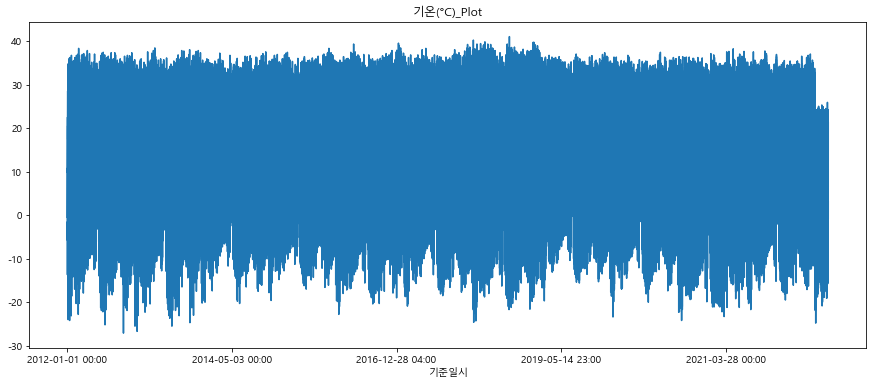

  3%|█▊                                                               | 1/35 [00:01<01:02,  1.84s/it]

결측치 비율(%) :  0.05


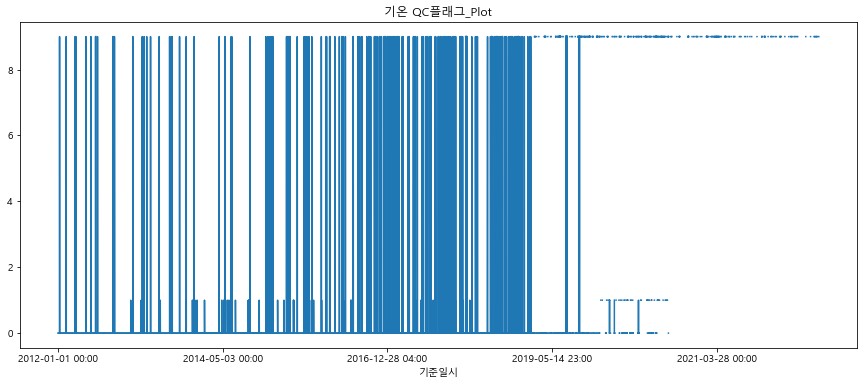

  6%|███▋                                                             | 2/35 [00:03<00:56,  1.71s/it]

결측치 비율(%) :  38.95


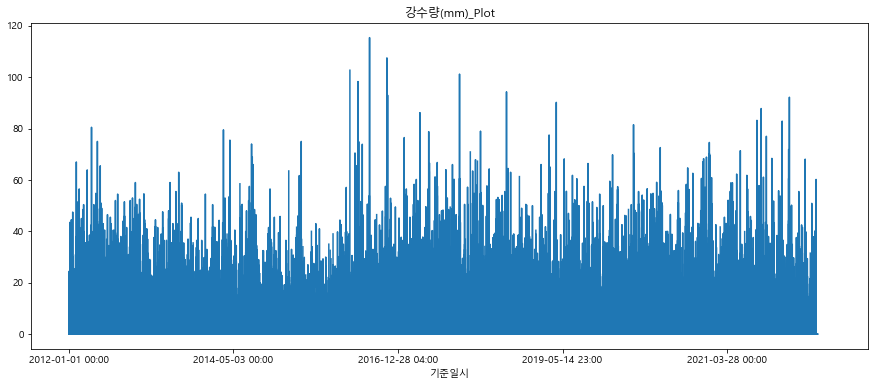

  9%|█████▌                                                           | 3/35 [00:05<00:54,  1.71s/it]

결측치 비율(%) :  90.99


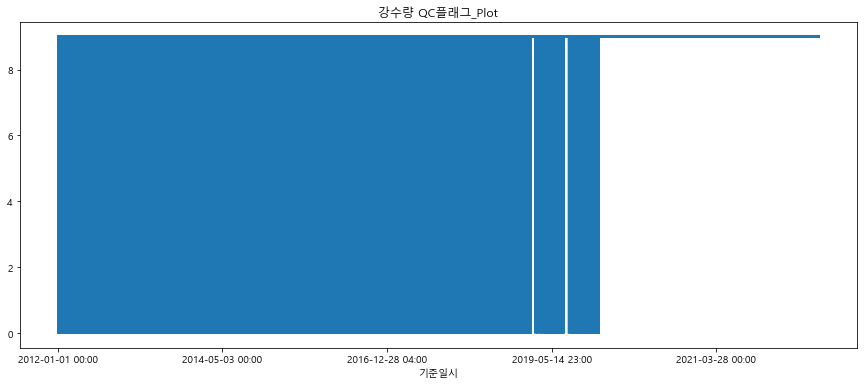

 11%|███████▍                                                         | 4/35 [00:07<01:00,  1.95s/it]

결측치 비율(%) :  77.4


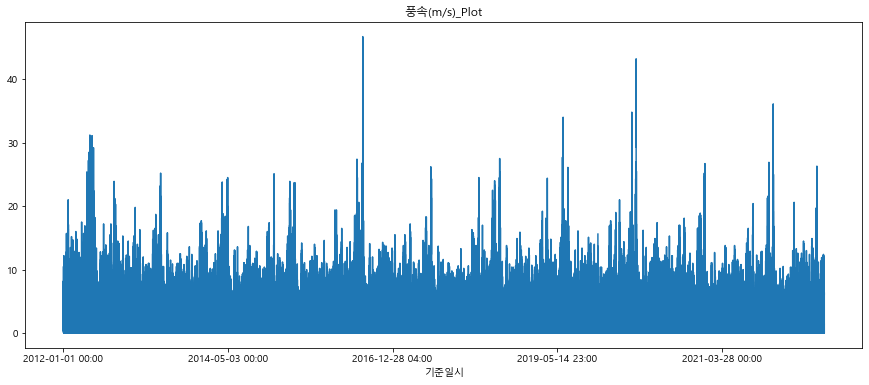

 14%|█████████▎                                                       | 5/35 [00:09<00:59,  1.98s/it]

결측치 비율(%) :  0.1


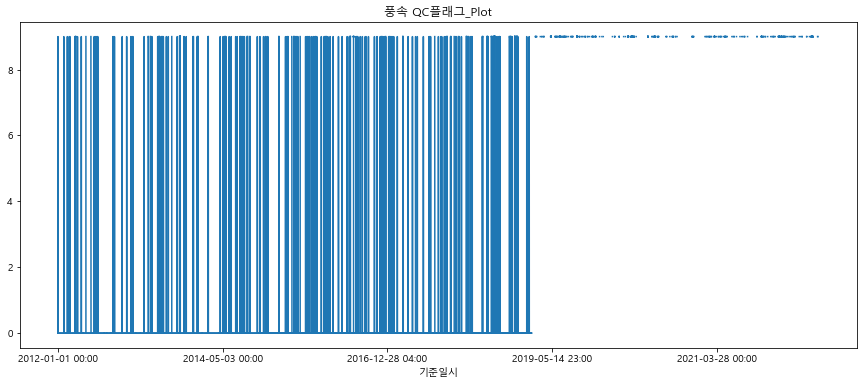

 17%|███████████▏                                                     | 6/35 [00:11<00:54,  1.87s/it]

결측치 비율(%) :  40.31


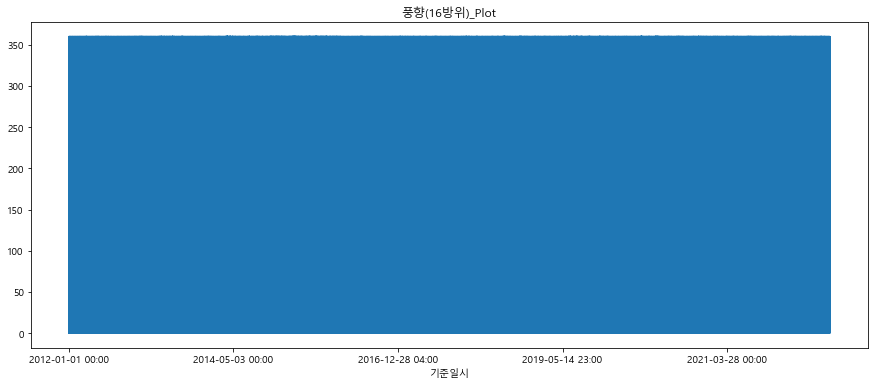

 20%|█████████████                                                    | 7/35 [00:13<00:53,  1.93s/it]

결측치 비율(%) :  0.23


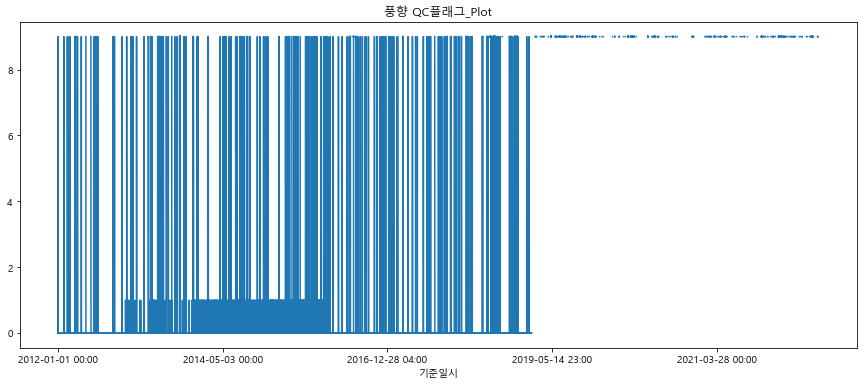

 23%|██████████████▊                                                  | 8/35 [00:14<00:50,  1.88s/it]

결측치 비율(%) :  40.31


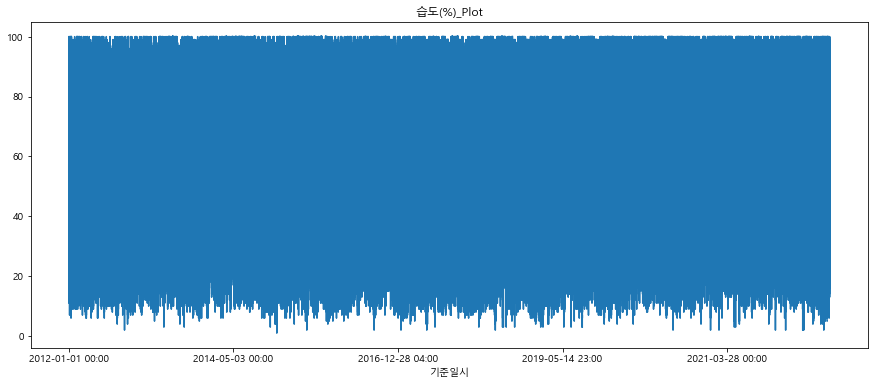

 26%|████████████████▋                                                | 9/35 [00:17<00:50,  1.92s/it]

결측치 비율(%) :  0.12


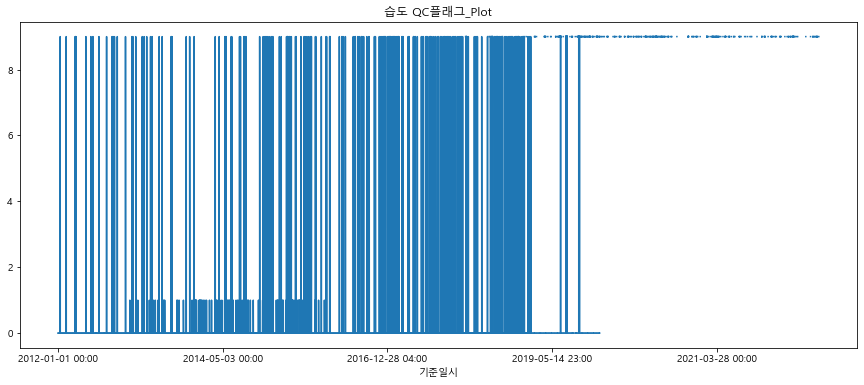

 29%|██████████████████▎                                             | 10/35 [00:18<00:46,  1.88s/it]

결측치 비율(%) :  38.97


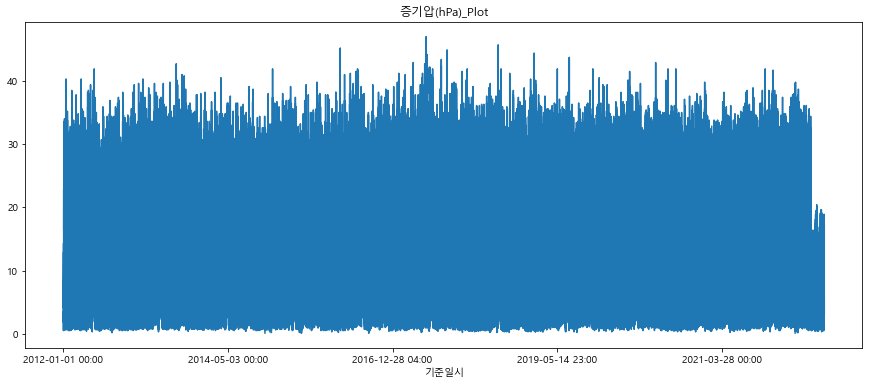

 31%|████████████████████                                            | 11/35 [00:20<00:46,  1.92s/it]

결측치 비율(%) :  0.09


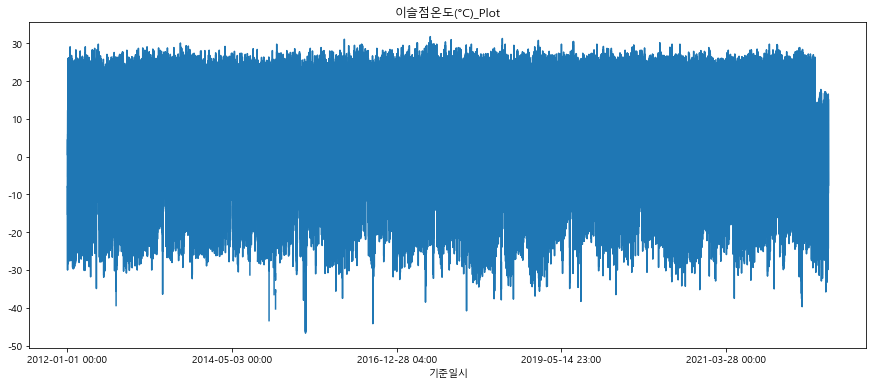

 34%|█████████████████████▉                                          | 12/35 [00:22<00:44,  1.95s/it]

결측치 비율(%) :  0.11


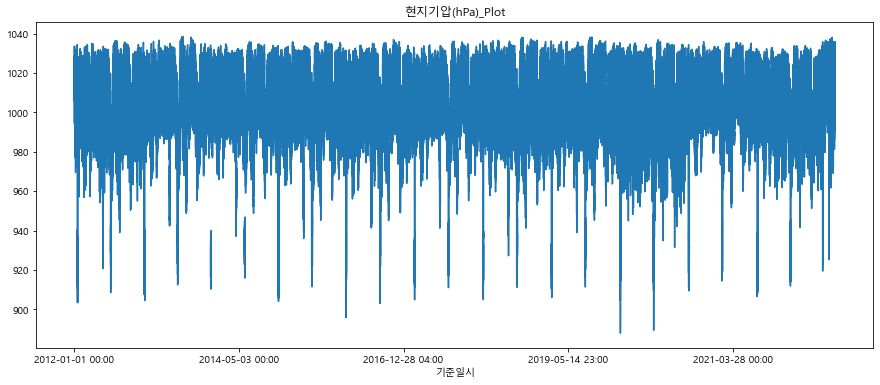

 37%|███████████████████████▊                                        | 13/35 [00:24<00:42,  1.94s/it]

결측치 비율(%) :  0.1


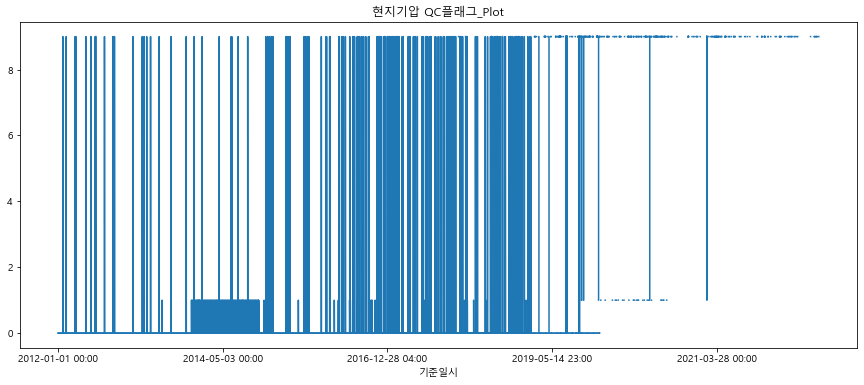

 40%|█████████████████████████▌                                      | 14/35 [00:26<00:42,  2.02s/it]

결측치 비율(%) :  38.98


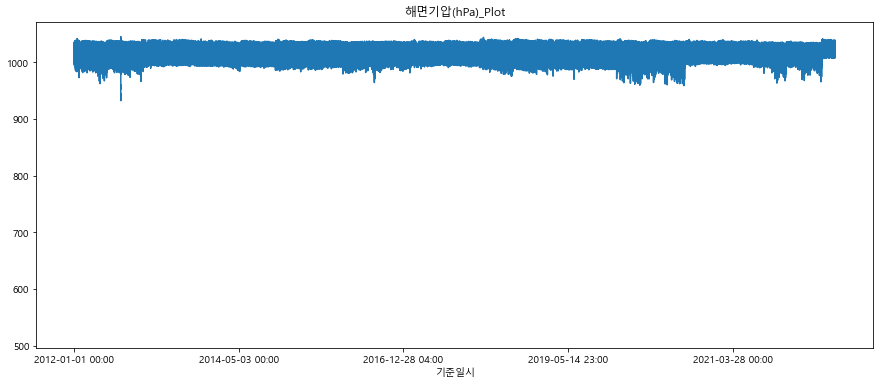

 43%|███████████████████████████▍                                    | 15/35 [00:29<00:40,  2.03s/it]

결측치 비율(%) :  0.06


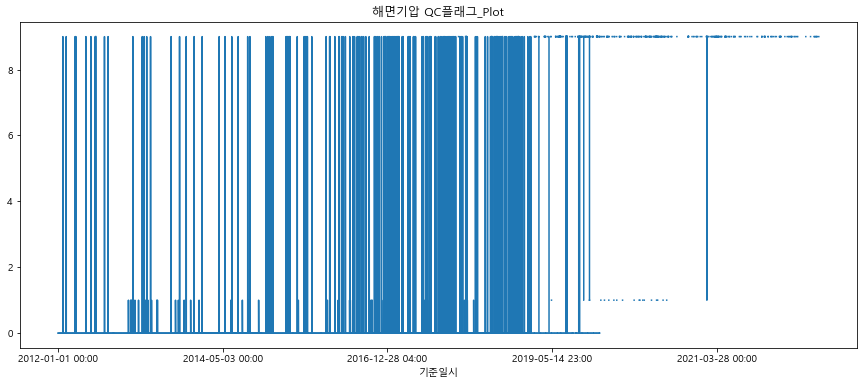

 46%|█████████████████████████████▎                                  | 16/35 [00:30<00:37,  1.99s/it]

결측치 비율(%) :  38.98


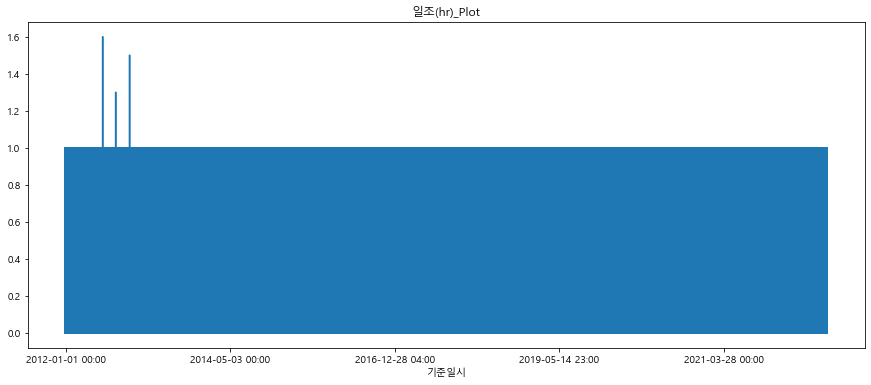

 49%|███████████████████████████████                                 | 17/35 [00:39<01:10,  3.91s/it]

결측치 비율(%) :  45.78


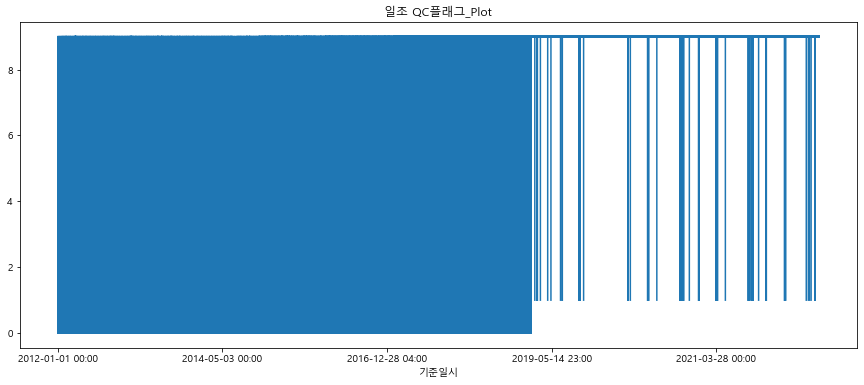

 51%|████████████████████████████████▉                               | 18/35 [00:41<00:58,  3.43s/it]

결측치 비율(%) :  22.08


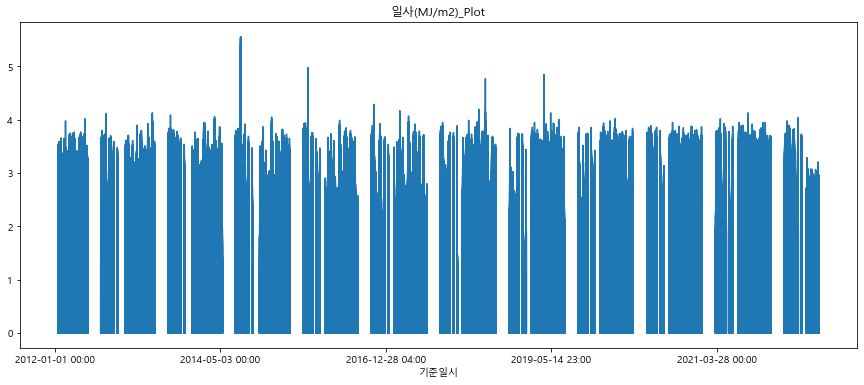

 54%|██████████████████████████████████▋                             | 19/35 [00:46<00:59,  3.74s/it]

결측치 비율(%) :  76.03


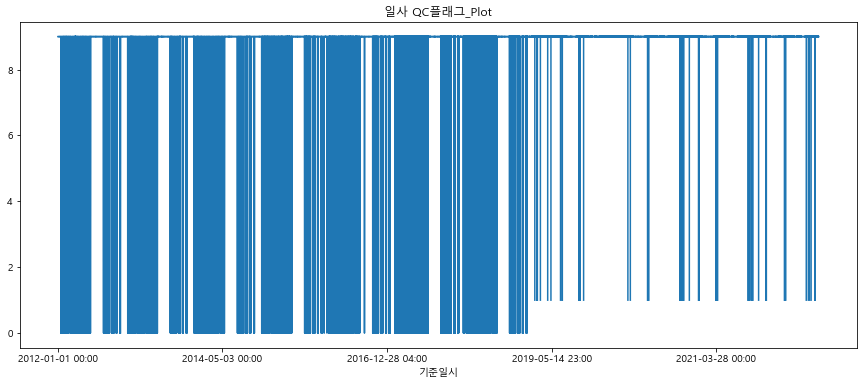

 57%|████████████████████████████████████▌                           | 20/35 [00:48<00:49,  3.29s/it]

결측치 비율(%) :  10.53


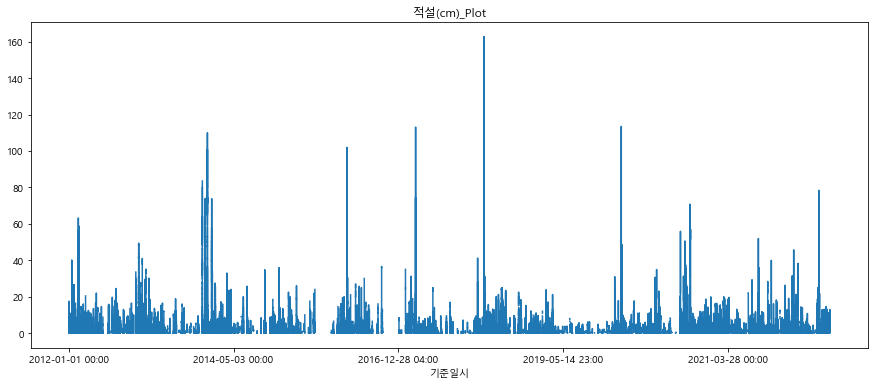

 60%|██████████████████████████████████████▍                         | 21/35 [00:50<00:39,  2.82s/it]

결측치 비율(%) :  98.02


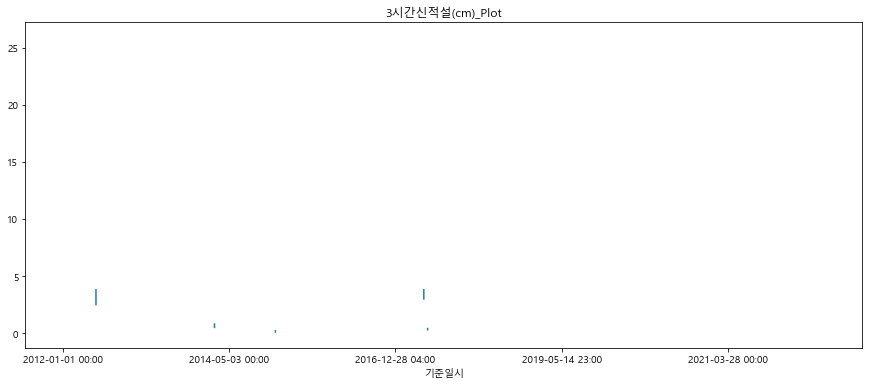

 63%|████████████████████████████████████████▏                       | 22/35 [00:51<00:32,  2.48s/it]

결측치 비율(%) :  99.87


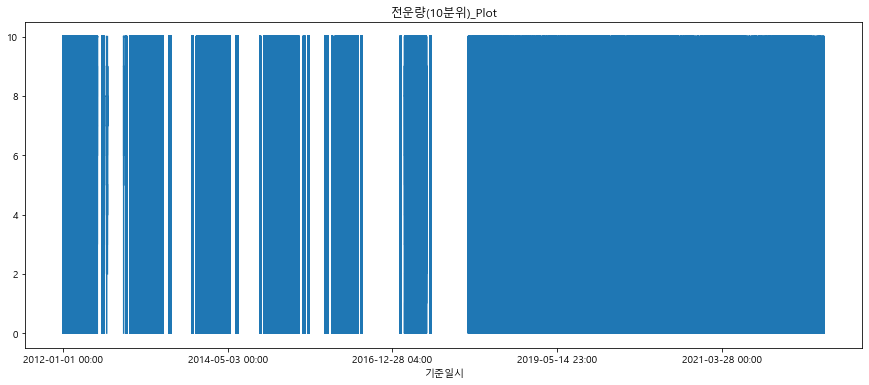

 66%|██████████████████████████████████████████                      | 23/35 [00:54<00:31,  2.62s/it]

결측치 비율(%) :  44.18


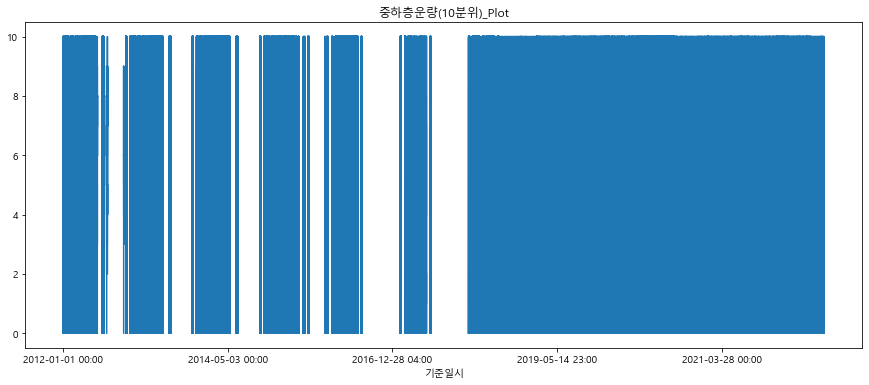

 69%|███████████████████████████████████████████▉                    | 24/35 [00:57<00:26,  2.39s/it]

결측치 비율(%) :  43.76


TypeError: no numeric data to plot

In [13]:
value_confirm(time)

In [ ]:
time

In [ ]:
'''
=====
Time Data

전처리 방향(v1) : 의미상 유의미해 보이고, 결측치가 적은 컬럼은 최대한 살려보기

* QC플래그 : 품질검사 정보 0(정상), 1(오류), 9(결측)
=====

'기온(°C)' : 
    - 결측값이 0.05비율로 있고 기온은 이전 값과 크게 다르지 않다고 판단하여 결측치는 이전 값으로 채움
'기온 QC플래그' : 기온측정의 품질검사 데이터
    - 9(Nan)로 측정된 4000개의 데이터와 약 40% 결측치가 있지만, 
    - 시계열 데이터 특성상 일자를 40%나 제거하면 유의미한 추세나 예측이 어렵다고 판단
    - 전부 0으로 (정상 데이터로) 판단하고 진행
    
'강수량(mm)' : 
    - 결측치가 약 91%이지만, 비가 안온 날 것이라 판단하고 0으로 채우고 진행
'강수량 QC플래그' : 강수량 품질검사 데이터
    - 9(Nan)으로 측정된 데이터개 약 150만개에 결측치가 77% 이지만, 
    - 강수량 데이터와 마찬가지로 비가 안온 날 이라 가정하고 진행
    
'풍속(m/s)' : 
    - 결측치가 적어서 사용 가능해 보임
    - 특정 시기에 튀는 부분이 보이기 때문에, 단순히 근처 값을 활용하기 보다
    - 해당 시기 3일전의 평균값으로 채워서 진행
'풍속 QC플래그' : 풍속 품질검사 데이터
    - 결측치가 약 40%이고, 9(Nan)값이 약 5000개 이지만,
    - 50% 이상 정상 데이터라 풍속 데이터도 활용하는 것으로 진행
    - 2019년 부터 0(정상)값이 없는데, 
    - 앞 7년간 패턴으로 봤을 때 결측치들이 0의 값일 수 있다는 판단
    
'풍향(16방위)' : 풍향은 국제적으로 동서남북 4방위를 2번 더 나눈 16방위로 측정
    - 결측치 비율이 0.23% 로 적기 때문에 가장 값이 많은 0으로 채우고 진행
'풍향 QC플래그' : 풍향 품질검사 데이터
    - 풍속 QC플래그와 마찬가지로 19년도 데이터부터 0(정상)값이 측정이 안됐지만,
    - 이전 7년의 패턴과 비슷한 비율로 생각하고 정상데이터라 판단하여 진행
    
'습도(%)' : 
    - 결측치가 적고, 특정 패턴이 없는 것으로 판단되어 평균값으로 채우고 진행
'습도 QC플래그' : 습도 품질검사 데이터
    - 19년 하반기부터 0(정상)값이 측정되지 않았지만, 앞과 비슷한 패턴이라 판단하고 
    - 습도 값도 활용하는 것으로 진행

    '증기압(hPa)' : 대기의 전체 압력 중에서 그 대기에 함유되어 있는 수증기가 갖고 있는 분압
        - 특정한 패턴이 보이지 않고, 결측치가 0.09%로 적기 때문에
        - 평균값으로 결측치를 채우고 진행
        
    '이슬점온도(°C)' : 이슬이 형성되는 온도
        - 특정한 패턴이 보이지 않고, 결측치가 0.11%로 적기 때문에
        - 평균값으로 결측치를 채우고 진행
        
'현지기압(hPa)' : 해당 지역의 기압
    - 결측치가 적고, 패턴이 보이는 듯 하지만 정확하지 않기 때문에
    - 평균 값으로 채우고 진행
'현지기압 QC플래그' : 현지기압 품질검사 데이터
    - 앞선 QC플래그 처럼 결측치 비율이 약 40%대 이지만, 
    - 19년도 말 부터 1(비정상), 9(Nan)값은 측정됐지만 0(정상)값이 측정되지 않았으므로
    - 결측치를 정상 값으로 판단하고 현지기압 데이터도 활용
    
'해면기압(hPa)' : 정해진 장소의 평균 해수면 높이에서의 기압
    - 결측치가 적기 때문에, 평균값으로 채워서 진행
'해면기압 QC플래그' : 해면기압 품질검사 데이터
    - 앞선 현지기압 QC플래그와 마찬가지의 비율을 갖고 있기 때문에
    - 해면기압도 활용

'일조(hr)' : 태양의 직사광이 지표면에 비친 시간
    - 0과 1의 데이터가 가장 많고 이상치 처럼 보이는 데이터가 있음
    - 결측치가 45%로 꽤 많은 편이지만 
    - 0과 1 사이 평균값에서 크게 벗어나지 않을 것이라 가정하고 진행
    - 12년도 중순 ~ 13년도 초에만 관측되는 1 이상의 데이터는 이상치로 가정하고
    - 1로 변형하여 진행
'일조 QC플래그' : 일조 품질검사 데이터
    - 결측치가 22%이지만 9(Nan) 값이 0(정상) 값 보다 많은 것으로 보아
    - 데이터의 정보를 확신할 수 없음
    - 일조 데이터는 제거하는 것이 좋아보임

'일사(MJ/m2)' : 태양으로부터 지구를 향해 방사되는 에너지, 태양 복사 에너지
    - 결측치가 76%로 많은 편이고 14년 하반기 및 가끔 결측치로 판단되는 값이 보임
    - 결측치가 많아 어떤 값으로 채울지 고민됨
'일사 QC플래그' : 일사 품질검사 데이터
    - QC플래그 값 역시 9(Nan)으로 측정된 데이터가 70%이상이며, 19년 하반기 이후
    - 0(정상)값이 측정되지는 않았지만 일사 데이터를 적극적으로 활용하기는 어려워 보임

    '적설(cm)' : 
        - 절설 데이터는 활용해보면 좋을 것 같아, 결측치는 눈이 오지 않은 것으로 판단하고
        - 0으로 처리하여 사용
    '3시간신적설(cm)' : 3시간 동안 새로 쌓인 눈
        - 결측치가 너무 많아 활용하기 어려움
    '전운량(10분위)' : 전층에 있는 구름의 분포량
        - 운량의 경우 목측으로 진행하기 때문에, 사람마다 판단하는 기준이 다를 것이라 생각되므로
        - 활용하지 않는 것이 좋아 보임
    '중하층운량(10분위)' : 중층과 하층에 있는 구름의 분포량
        - 중하층운량도 마찬가지로 목측으로 진행하기 때문에
        - 객관적인 판단이 어려울 듯 하여 활용하지 않는 것이 좋아보임
    '운형(운형약어)' : 구름의 모양
        - 154가지의 카테고리 데이터로써 활용하기 어려워 보임
    '최저운고(100m )' : 구름의 최저 고도
        - 결측치가 70%로 많은 편이며, 16년도 중순 시점을 전후로 값의 전반적인 차이가 보임
        - 16년도 전후로 평균치가 달라졌는지는 아직 확인할 수 없으며
        - 운고에 대한 지식이 없어 바로 활용하기는 어려워 보임
    '시정(10m)' : 가시 거리
        - 가시거리 10m로 측정된 데이터 인데, 데이터들의 의미를 정확히 파악할 수 없어
        - 현재는 사용하지 않는 것이 좋아 보임
    '지면상태(지면상태코드)' : 
        - 결측치가 97%이고, 지면 상태에 대한 코드는 활용하지 않는것이 좋아 보임
    '현상번호(국내식)' : 
        - 결측치가 91%이고, 국내 현상 번호는 463개의 카테고리 데이터로 판단되어
        - 활용하지 않는것이 좋아 보임
    
'지면온도(°C)' : 
    - 결측치가 0.11%로 적은 편
    - 평균치로 결측치 처리 후 활용
'지면온도 QC플래그' : 지면온도 품질검사 데이터
    - 결측치가 39% 이지만, 측정된 값 중 0(정상) 데이터가 많은 비율을 차지하므로
    - 지면온도 데이터는 활용 해볼 수 있다고 판단됨

    '5cm 지중온도(°C)' : 땅 속 5cm 온도
        - 결측치가 약 70%로 많은 편이지만, 
        - 온도 데이터 이기 때문에 급변하지는 않을 것이라 판단됨
        - 이전 값들의 평균으로 결측치 처리 후 활용해 볼만 함
    '10cm 지중온도(°C)' : 땅 속 10cm 온도
        - 5cm 지중온도 처럼 결측치가 꽤 있지만
        - 그래프 상 이상치로 보이는 값들은 따로 처리한 다음,
        - 특정 시점 이전 값들의 평균으로 결측치 처리 후 활용
    '20cm 지중온도(°C)' : 땅 속 20cm 온도
        - 마찬가지로 결측치가 꽤 있지만
        - 그래프 상 이상치로 보이는 이상치들을 처리한 다음,
        - 특정 시점 이전 값들의 평균으로 결측치 처리 후 활용
    '30cm 지중온도(°C)' : 땅 속 30cm 온도
        - 30cm 지중온도 데이터 또한 마찬가지로 결측치가 꽤 있지만
        - 그래프 상 이상치로 보이는 이상치들을 10,20cm 데이터보다는 적어 보임,
        - 특정 시점 이전 값들의 평균으로 결측치 처리 후 활용

'''

In [ ]:
# EDA 후 drop 할 컬럼 정리

time_drop = ['기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
            '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그',
            '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '3시간신적설(cm)',
            '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)',
            '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도 QC플래그']

time.drop(columns = time_drop, axis=1, inplace=True)

In [ ]:
time_drop2 = ['기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
            '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그',
            '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그',
              '3시간신적설(cm)','지면상태(지면상태코드)', '현상번호(국내식)']

In [ ]:
lgbm_test.drop(columns=time_drop, axis=1, inplace=True)

In [ ]:
lgbm_test

In [ ]:
lgbm_test.to_csv('lgbm_test.csv')

In [ ]:
time

## 결측치 채우기

### 0, 통계값

In [76]:
# 이전 값, Nan 값이 포함된 데이터의 평균으로 결측치를 처리한 결과 확인

time_fill = time.copy()

time_fill['기온(°C)'].fillna(method='ffill', inplace=True)
time_fill['강수량(mm)'].fillna(0, inplace=True)
time_fill['풍속(m/s)'].fillna(time_fill['풍속(m/s)'].mean(), inplace=True)
time_fill['풍향(16방위)'].fillna(0, inplace=True)
time_fill['습도(%)'].fillna(time_fill['습도(%)'].mean(), inplace=True)
time_fill['증기압(hPa)'].fillna(time_fill['증기압(hPa)'].mean(), inplace=True)
time_fill['이슬점온도(°C)'].fillna(time_fill['이슬점온도(°C)'].mean(), inplace=True)
time_fill['현지기압(hPa)'].fillna(time_fill['현지기압(hPa)'].mean(), inplace=True)
time_fill['해면기압(hPa)'].fillna(time_fill['해면기압(hPa)'].mean(), inplace=True)
time_fill['적설(cm)'].fillna(0, inplace=True)
time_fill['지면온도(°C)'].fillna(time_fill['지면온도(°C)'].mean(), inplace=True)


# compare_describe(time, time_fill)

In [81]:
time_fill['기온 QC플래그'].fillna(time_fill['기온 QC플래그'].mode()[0], inplace=True)
time_fill['강수량 QC플래그'].fillna(time_fill['강수량 QC플래그'].mode()[0], inplace=True)
time_fill['풍속 QC플래그'].fillna(time_fill['풍속 QC플래그'].mode()[0], inplace=True)
time_fill['풍향 QC플래그'].fillna(time_fill['풍향 QC플래그'].mode()[0], inplace=True)
time_fill['습도 QC플래그'].fillna(time_fill['습도 QC플래그'].mode()[0], inplace=True)
time_fill['현지기압 QC플래그'].fillna(time_fill['현지기압 QC플래그'].mode()[0], inplace=True)
time_fill['해면기압 QC플래그'].fillna(time_fill['해면기압 QC플래그'].mode()[0], inplace=True)
time_fill['일조(hr)'].fillna(time_fill['일조(hr)'].mode()[0], inplace=True)
time_fill['일조 QC플래그'].fillna(time_fill['일조 QC플래그'].mode()[0], inplace=True)
time_fill['일사(MJ/m2)'].fillna(time_fill['일사(MJ/m2)'].mode()[0], inplace=True)
time_fill['일사 QC플래그'].fillna(time_fill['일사 QC플래그'].mean(), inplace=True)
time_fill['3시간신적설(cm)'].fillna(0, inplace=True)
time_fill['전운량(10분위)'].fillna(time_fill['전운량(10분위)'].mean(), inplace=True)
time_fill['중하층운량(10분위)'].fillna(time_fill['중하층운량(10분위)'].mean(), inplace=True)
time_fill['최저운고(100m )'].fillna(time_fill['최저운고(100m )'].mean(), inplace=True)
time_fill['시정(10m)'].fillna(time_fill['시정(10m)'].mean(), inplace=True)
time_fill['지면상태(지면상태코드)'].fillna(time_fill['지면상태(지면상태코드)'].mean(), inplace=True)
time_fill['현상번호(국내식)'].fillna(time_fill['현상번호(국내식)'].mean(), inplace=True)
time_fill['지면온도 QC플래그'].fillna(time_fill['지면온도 QC플래그'].mean(), inplace=True)

In [85]:
df = pd.merge(time_fill, elec, left_index=True, right_index=True, how='right')
df = df.interpolate()
df

기온(°C)  기온 QC플래그   강수량(mm)  강수량 QC플래그   풍속(m/s)  \
기준일시                                                                   
2012-06-01 00:00  16.387097       0.0  0.550000   8.181818  1.196774   
2012-06-01 00:05  16.344534       0.0  0.519167   7.714286  1.189247   
2012-06-01 00:10  16.301971       0.0  0.488333   7.246753  1.181720   
2012-06-01 00:15  16.259409       0.0  0.457500   6.779221  1.174194   
2012-06-01 00:20  16.216846       0.0  0.426667   6.311688  1.166667   
...                     ...       ...       ...        ...       ...   
2023-03-12 23:35   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:40   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:45   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:50   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:55   2.080000       0.0  0.000000   9.000000  5.155789   

                  풍속 QC플래그    풍향(16방위)  풍향 QC플래그      습도(%)  습도 QC플래그  ...  \
기준일시                                                                   ...   
2012-06-01 00:00       0.0  155.376344       0.0  84.494624       0.0  ...   
2012-06-01 00:05       0.0  154.928315       0.0  84.643369       0.0  ...   
2012-06-01 00:10       0.0  154.480287       0.0  84.792115       0.0  ...   
2012-06-01 00:15       0.0  154.032258       0.0  84.940860       0.0  ...   
2012-06-01 00:20       0.0  153.584229       0.0  85.089606       0.0  ...   
...                    ...         ...       ...        ...       ...  ...   
2023-03-12 23:35       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:40       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:45       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:50       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:55       0.0  283.684211       0.0  47.126316       0.0  ...   

                      시정(10m)  지면상태(지면상태코드)     현상번호(국내식)   지면온도(°C)  \
기준일시                                                                   
2012-06-01 00:00  1038.750000      1.415061  65019.818182  16.559140   
2012-06-01 00:05  1068.854167      1.415061  59634.059524  16.514337   
2012-06-01 00:10  1098.958333      1.415061  54248.300866  16.469534   
2012-06-01 00:15  1129.062500      1.415061  48862.542208  16.424731   
2012-06-01 00:20  1159.166667      1.415061  43476.783550  16.379928   
...                       ...           ...           ...        ...   
2023-03-12 23:35  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:40  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:45  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:50  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:55  3777.542553      1.415061      3.666667   1.409474   

                  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
기준일시                                                                       
2012-06-01 00:00    0.000000     20.403125      21.359375      22.046875   
2012-06-01 00:05    0.000000     20.355729      21.320312      22.021615   
2012-06-01 00:10    0.000000     20.308333      21.281250      21.996354   
2012-06-01 00:15    0.000000     20.260938      21.242188      21.971094   
2012-06-01 00:20    0.000000     20.213542      21.203125      21.945833   
...                      ...           ...            ...            ...   
2023-03-12 23:35    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:40    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:45    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:50    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:55    0.534663      6.558621       8.082759       9.510345   

                  30cm 지중온도(°C)  현재수요(MW)  
기준일시                                       
2012-06-01 00:00      21.656250  51726.33  
2012-06-01 

In [96]:
df = df.reset_index().groupby('기준일시').mean()
print(df.index.value_counts())
df

2012-06-01 00:00    1
2019-08-07 14:30    1
2019-08-07 15:00    1
2019-08-07 14:55    1
2019-08-07 14:50    1
                   ..
2016-01-03 12:55    1
2016-01-03 13:00    1
2016-01-03 13:05    1
2016-01-03 13:10    1
2023-03-12 23:55    1
Name: 기준일시, Length: 1132411, dtype: int64


기온(°C)  기온 QC플래그   강수량(mm)  강수량 QC플래그   풍속(m/s)  \
기준일시                                                                   
2012-06-01 00:00  16.387097       0.0  0.550000   8.181818  1.196774   
2012-06-01 00:05  16.344534       0.0  0.519167   7.714286  1.189247   
2012-06-01 00:10  16.301971       0.0  0.488333   7.246753  1.181720   
2012-06-01 00:15  16.259409       0.0  0.457500   6.779221  1.174194   
2012-06-01 00:20  16.216846       0.0  0.426667   6.311688  1.166667   
...                     ...       ...       ...        ...       ...   
2023-03-12 23:35   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:40   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:45   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:50   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:55   2.080000       0.0  0.000000   9.000000  5.155789   

                  풍속 QC플래그    풍향(16방위)  풍향 QC플래그      습도(%)  습도 QC플래그  ...  \
기준일시                                                                   ...   
2012-06-01 00:00       0.0  155.376344       0.0  84.494624       0.0  ...   
2012-06-01 00:05       0.0  154.928315       0.0  84.643369       0.0  ...   
2012-06-01 00:10       0.0  154.480287       0.0  84.792115       0.0  ...   
2012-06-01 00:15       0.0  154.032258       0.0  84.940860       0.0  ...   
2012-06-01 00:20       0.0  153.584229       0.0  85.089606       0.0  ...   
...                    ...         ...       ...        ...       ...  ...   
2023-03-12 23:35       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:40       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:45       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:50       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:55       0.0  283.684211       0.0  47.126316       0.0  ...   

                      시정(10m)  지면상태(지면상태코드)     현상번호(국내식)   지면온도(°C)  \
기준일시                                                                   
2012-06-01 00:00  1038.750000      1.415061  65019.818182  16.559140   
2012-06-01 00:05  1068.854167      1.415061  59634.059524  16.514337   
2012-06-01 00:10  1098.958333      1.415061  54248.300866  16.469534   
2012-06-01 00:15  1129.062500      1.415061  48862.542208  16.424731   
2012-06-01 00:20  1159.166667      1.415061  43476.783550  16.379928   
...                       ...           ...           ...        ...   
2023-03-12 23:35  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:40  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:45  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:50  3777.542553      1.415061      3.666667   1.409474   
2023-03-12 23:55  3777.542553      1.415061      3.666667   1.409474   

                  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
기준일시                                                                       
2012-06-01 00:00    0.000000     20.403125      21.359375      22.046875   
2012-06-01 00:05    0.000000     20.355729      21.320312      22.021615   
2012-06-01 00:10    0.000000     20.308333      21.281250      21.996354   
2012-06-01 00:15    0.000000     20.260938      21.242188      21.971094   
2012-06-01 00:20    0.000000     20.213542      21.203125      21.945833   
...                      ...           ...            ...            ...   
2023-03-12 23:35    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:40    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:45    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:50    0.534663      6.558621       8.082759       9.510345   
2023-03-12 23:55    0.534663      6.558621       8.082759       9.510345   

                  30cm 지중온도(°C)  현재수요(MW)  
기준일시                                       
2012-06-01 00:00      21.656250  51726.33  
2012-06-01 

In [88]:
df[df.index == '2022-04-27 00:20']

기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그   풍속(m/s)  풍속 QC플래그  \
기준일시                                                                            
2022-04-27 00:20  16.316165       0.0      0.0        9.0  2.239023       0.0   
2022-04-27 00:20  16.280451       0.0      0.0        9.0  2.240301       0.0   

                    풍향(16방위)  풍향 QC플래그      습도(%)  습도 QC플래그  ...      시정(10m)  \
기준일시                                                         ...                
2022-04-27 00:20  238.390977       0.0  78.047368       0.0  ...  1517.914885   
2022-04-27 00:20  240.300752       0.0  77.905263       0.0  ...  1518.857437   

                  지면상태(지면상태코드)   현상번호(국내식)   지면온도(°C)  지면온도 QC플래그  \
기준일시                                                                
2022-04-27 00:20      1.415061  349.958929  14.483383    0.534663   
2022-04-27 00:20      1.415061  339.810714  14.443008    0.534663   

                  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  \
기준일시                                                                          
2022-04-27 00:20     17.220408      17.853827      18.305102      17.924745   
2022-04-27 00:20     17.192347      17.829592      18.291837      17.920408   

                  현재수요(MW)  
기준일시                        
2022-04-27 00:20   58508.0  
2022-04-27 00:20   58508.0  

[2 rows x 35 columns]

  0%|                                                                         | 0/34 [00:00<?, ?it/s]

기온(°C)        기온(°C)
count  98137.000000  1.132411e+06
mean      12.983374  1.321422e+01
std        9.997515  9.968574e+00
min      -15.128421 -1.512842e+01
25%        4.585870  4.848772e+00
50%       13.651579  1.399193e+01
75%       21.583158  2.179149e+01
max       35.211579  3.521158e+01

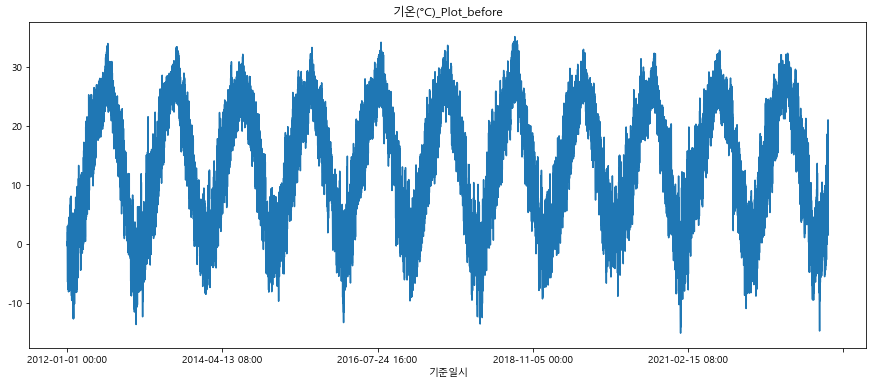

결측치 비율(%) :  0.0



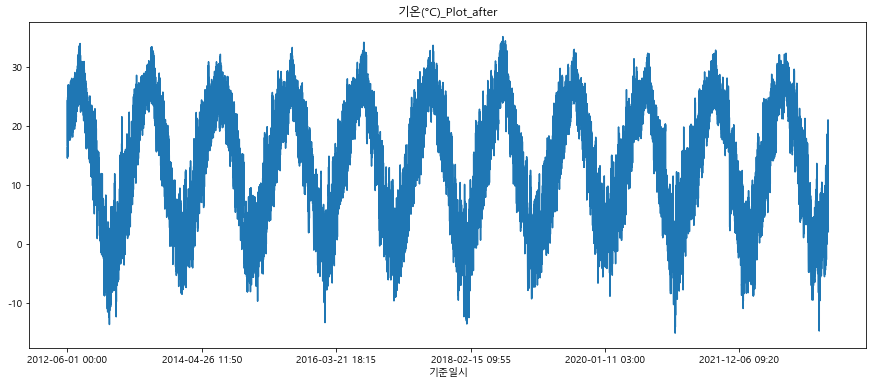

  3%|█▉                                                               | 1/34 [00:00<00:20,  1.65it/s]

결측치 비율(%) :  0.0



기온 QC플래그      기온 QC플래그
count  98137.000000  1.132411e+06
mean       0.231018  2.401394e-01
std        1.403736  1.388707e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max        9.000000  9.000000e+00

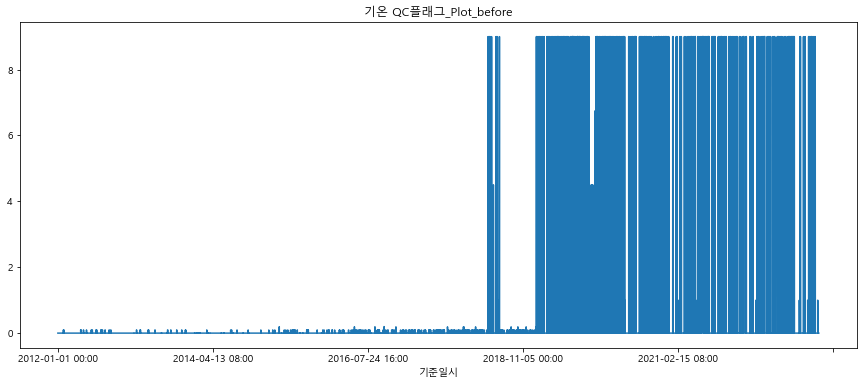

결측치 비율(%) :  0.0



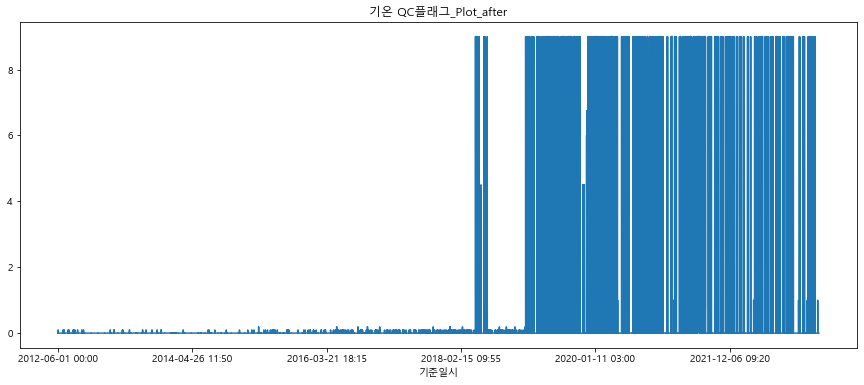

  6%|███▊                                                             | 2/34 [00:01<00:20,  1.57it/s]

결측치 비율(%) :  0.0



강수량(mm)       강수량(mm)
count  98137.000000  1.132411e+06
mean       0.406066  4.138347e-01
std        1.198356  1.116704e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.244186  3.000000e-01
max       74.600000  7.460000e+01

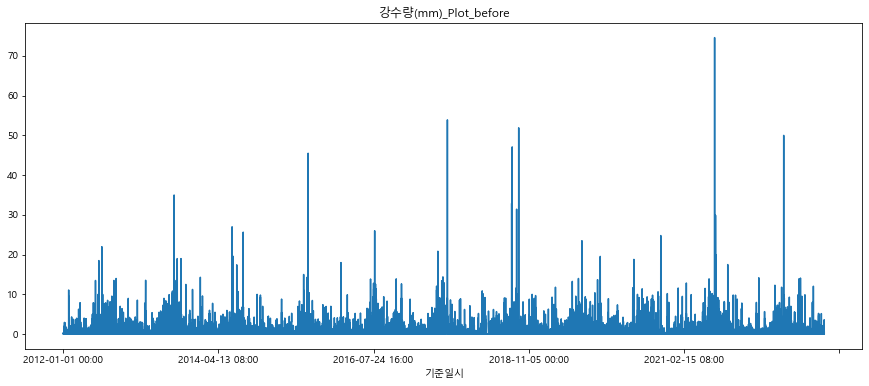

결측치 비율(%) :  0.0



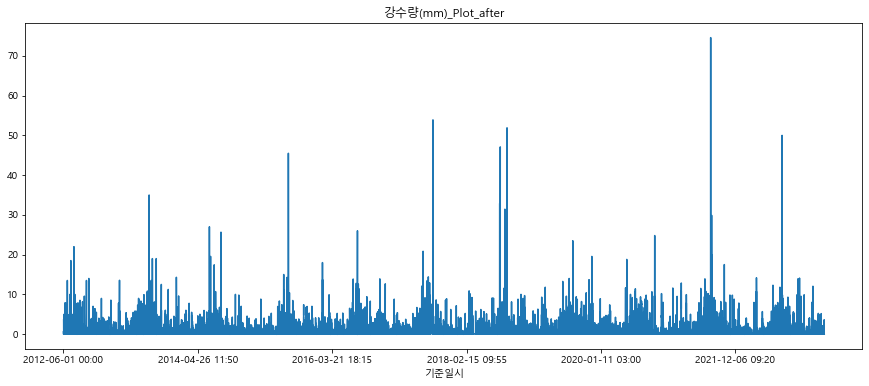

  9%|█████▋                                                           | 3/34 [00:01<00:18,  1.64it/s]

결측치 비율(%) :  0.0



강수량 QC플래그     강수량 QC플래그
count  98137.000000  1.132411e+06
mean       7.778506  7.800252e+00
std        2.511723  2.291958e+00
min        0.000000  0.000000e+00
25%        8.538462  7.750000e+00
50%        9.000000  9.000000e+00
75%        9.000000  9.000000e+00
max        9.000000  9.000000e+00

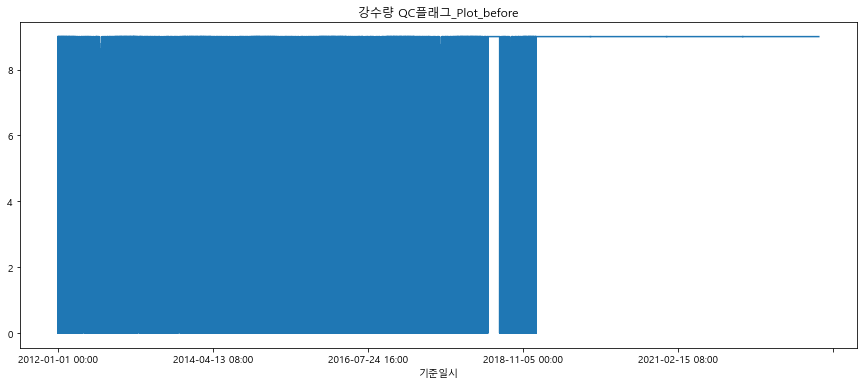

결측치 비율(%) :  0.0



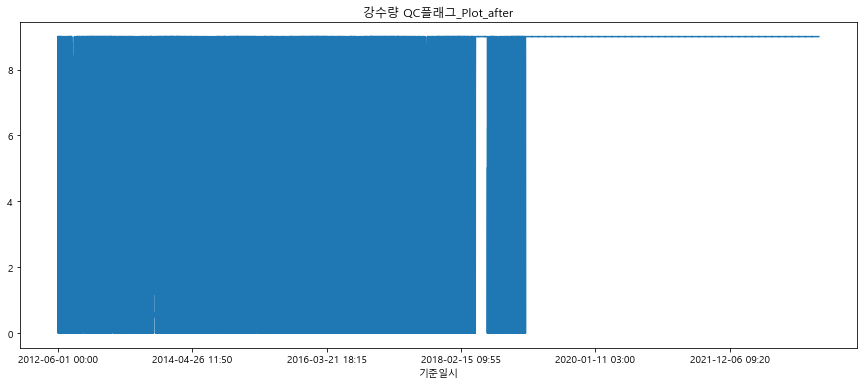

 12%|███████▋                                                         | 4/34 [00:02<00:18,  1.61it/s]

결측치 비율(%) :  0.0



풍속(m/s)       풍속(m/s)
count  98137.000000  1.132411e+06
mean       2.036400  2.020937e+00
std        0.989062  9.760729e-01
min        0.462766  4.627660e-01
25%        1.254737  1.247895e+00
50%        1.828421  1.817199e+00
75%        2.577660  2.551418e+00
max        9.378261  9.378261e+00

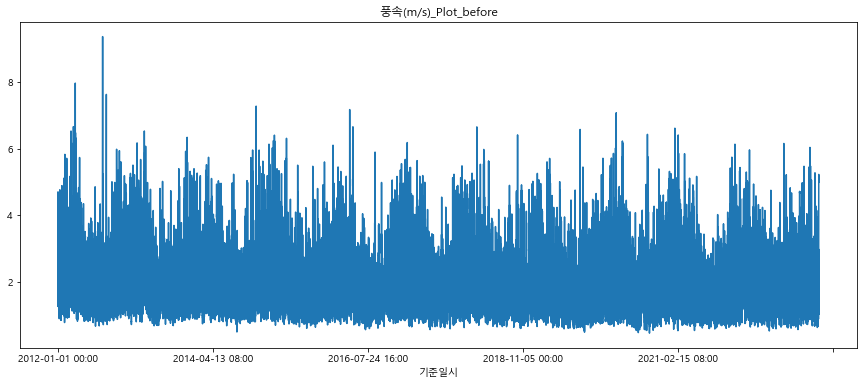

결측치 비율(%) :  0.0



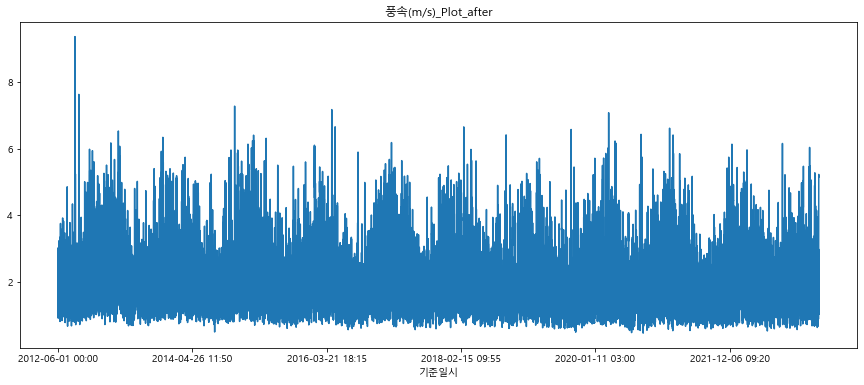

 15%|█████████▌                                                       | 5/34 [00:03<00:17,  1.64it/s]

결측치 비율(%) :  0.0



풍속 QC플래그      풍속 QC플래그
count  98137.000000  1.132411e+06
mean       0.301459  3.132684e-01
std        1.615531  1.603705e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max        9.000000  9.000000e+00

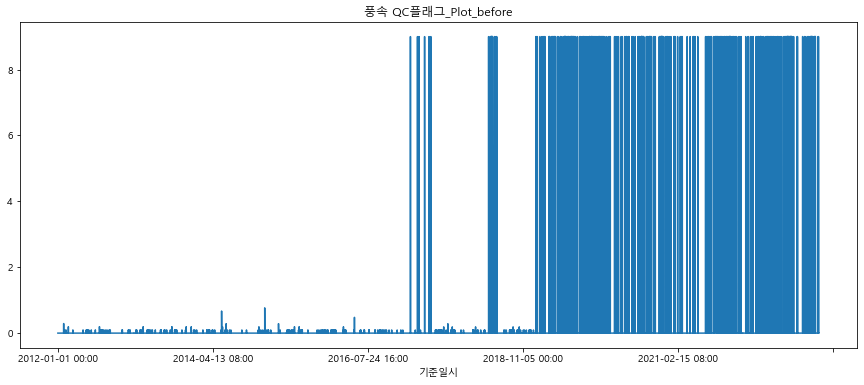

결측치 비율(%) :  0.0



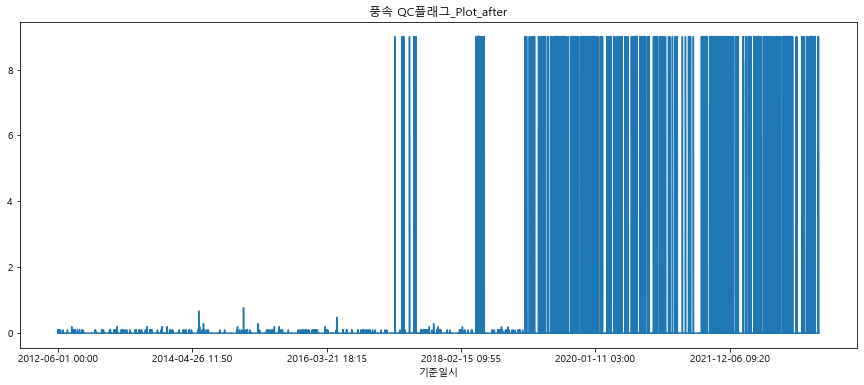

 18%|███████████▍                                                     | 6/34 [00:03<00:16,  1.70it/s]

결측치 비율(%) :  0.0



풍향(16방위)      풍향(16방위)
count  98137.000000  1.132411e+06
mean     175.966462  1.753757e+02
std       52.004118  5.147713e+01
min       54.842105  5.484211e+01
25%      133.723404  1.334409e+02
50%      167.608696  1.668750e+02
75%      214.105263  2.128763e+02
max      306.105263  3.061053e+02

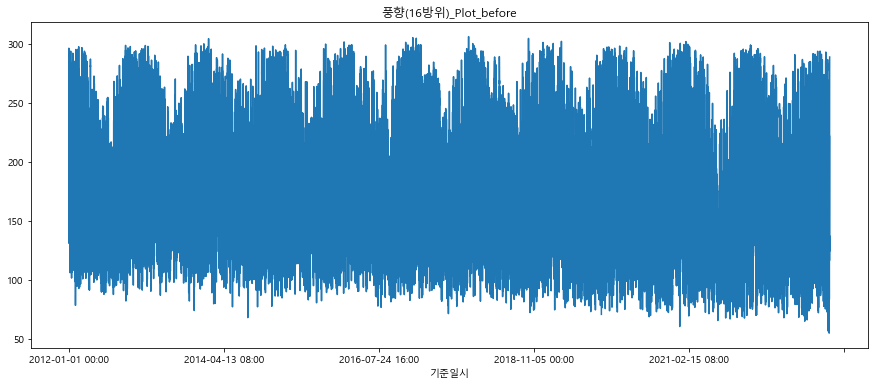

결측치 비율(%) :  0.0



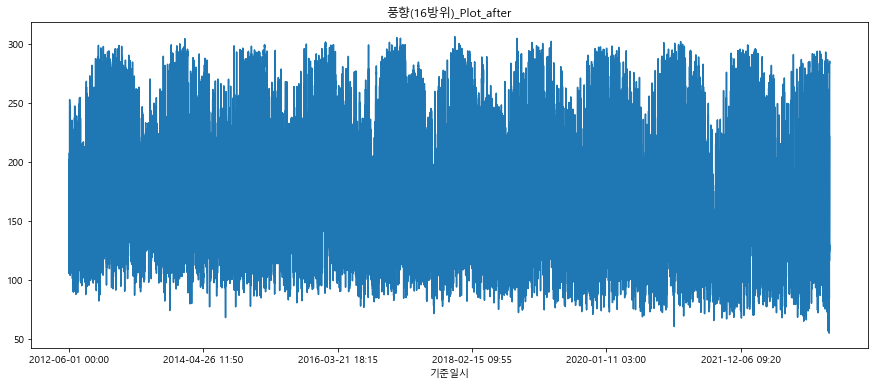

 21%|█████████████▍                                                   | 7/34 [00:04<00:16,  1.61it/s]

결측치 비율(%) :  0.0



풍향 QC플래그      풍향 QC플래그
count  98137.000000  1.132411e+06
mean       0.331581  3.445522e-01
std        1.687998  1.675135e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max        9.000000  9.000000e+00

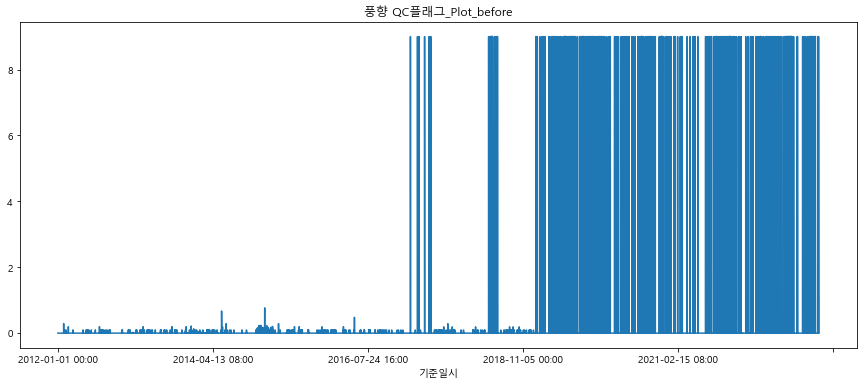

결측치 비율(%) :  0.0



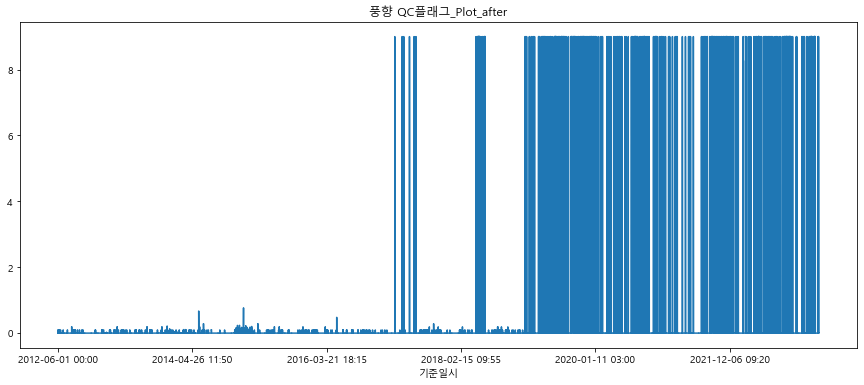

 24%|███████████████▎                                                 | 8/34 [00:04<00:16,  1.61it/s]

결측치 비율(%) :  0.0



습도(%)         습도(%)
count  98137.000000  1.132411e+06
mean      68.705023  6.905703e+01
std       17.612089  1.746901e+01
min       17.365591  1.897895e+01
25%       56.200000  5.665957e+01
50%       70.863158  7.126344e+01
75%       83.694737  8.398936e+01
max       97.968421  9.796842e+01

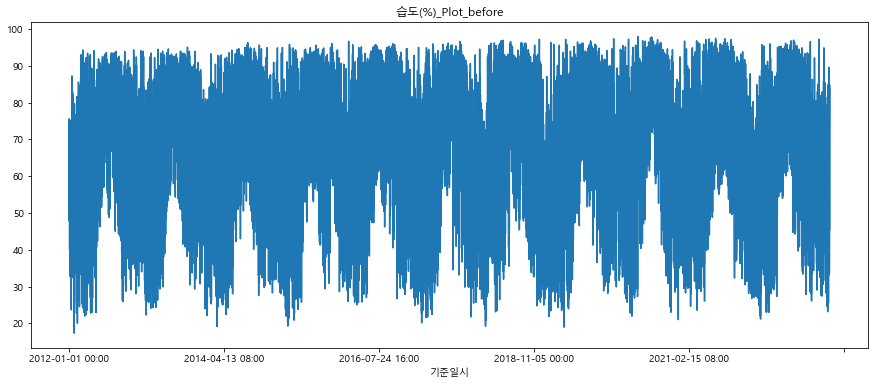

결측치 비율(%) :  0.0



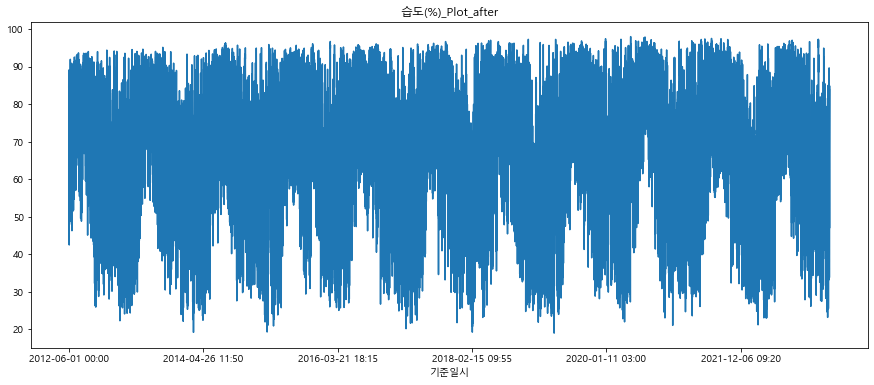

 26%|█████████████████▏                                               | 9/34 [00:05<00:16,  1.55it/s]

결측치 비율(%) :  0.0



습도 QC플래그      습도 QC플래그
count  98137.000000  1.132411e+06
mean       0.356942  3.700193e-01
std        1.746865  1.742780e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max        9.000000  9.000000e+00

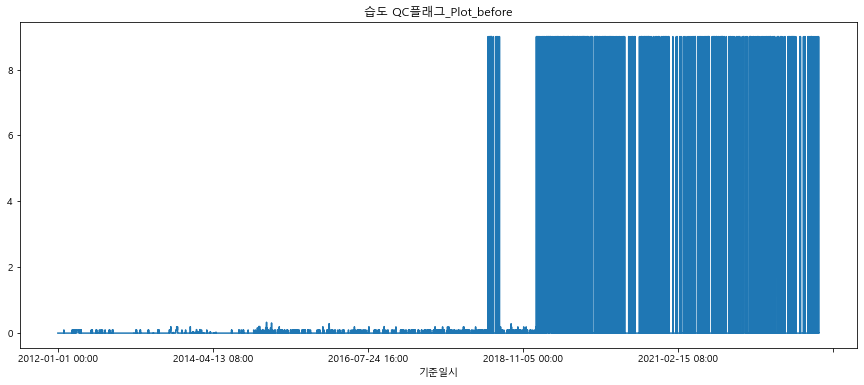

결측치 비율(%) :  0.0



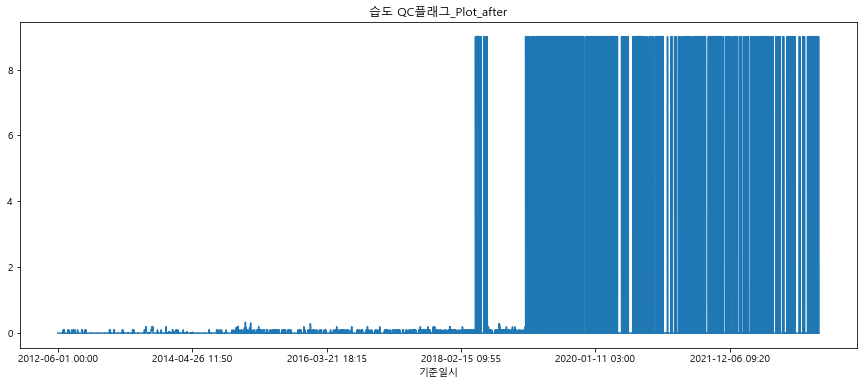

 29%|██████████████████▊                                             | 10/34 [00:06<00:14,  1.62it/s]

결측치 비율(%) :  0.0



증기압(hPa)      증기압(hPa)
count  98137.000000  1.132411e+06
mean      12.470213  1.269137e+01
std        8.363435  8.408013e+00
min        1.055789  1.055789e+00
25%        5.195789  5.316842e+00
50%       10.100000  1.035333e+01
75%       18.998947  1.935289e+01
max       32.728421  3.272842e+01

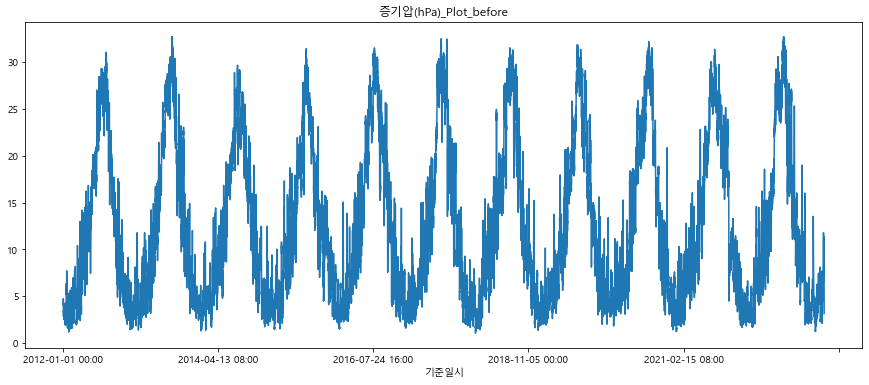

결측치 비율(%) :  0.0



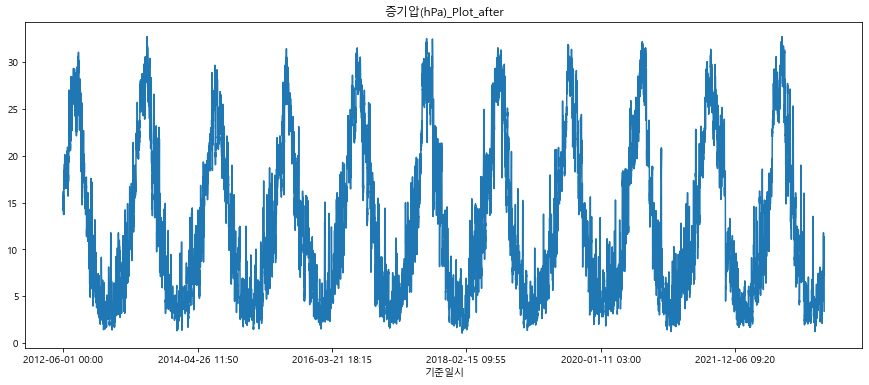

 32%|████████████████████▋                                           | 11/34 [00:06<00:13,  1.65it/s]

결측치 비율(%) :  0.0



이슬점온도(°C)     이슬점온도(°C)
count  98137.000000  1.132411e+06
mean       6.537621  6.846694e+00
std       11.264222  1.122726e+01
min      -24.132632 -2.413263e+01
25%       -2.627368 -2.308872e+00
50%        6.836957  7.191579e+00
75%       16.568817  1.686064e+01
max       25.510526  2.551053e+01

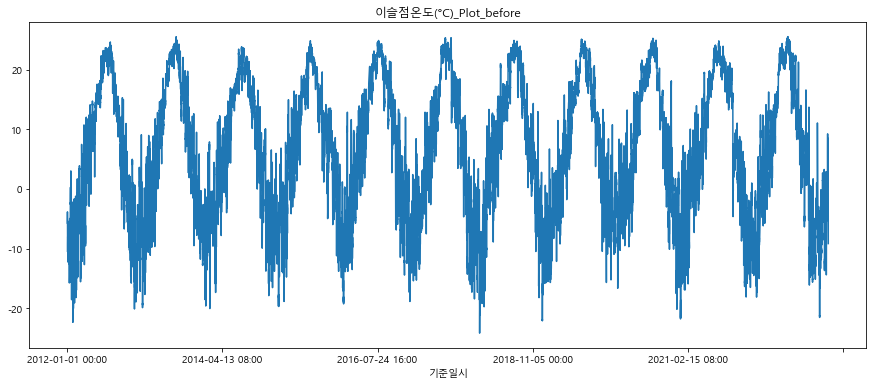

결측치 비율(%) :  0.0



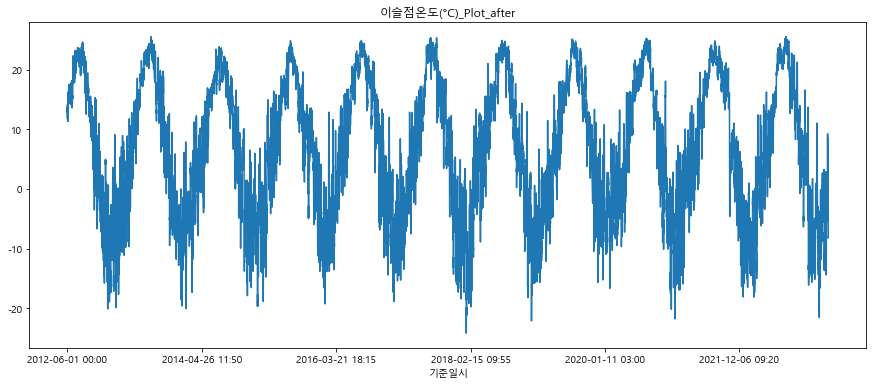

 35%|██████████████████████▌                                         | 12/34 [00:07<00:13,  1.68it/s]

결측치 비율(%) :  0.0



현지기압(hPa)     현지기압(hPa)
count  98137.000000  1.132411e+06
mean    1003.835490  1.003776e+03
std        7.671266  7.694745e+00
min      970.706316  9.707063e+02
25%      997.842105  9.977409e+02
50%     1004.075789  1.003986e+03
75%     1009.749462  1.009712e+03
max     1025.016842  1.025017e+03

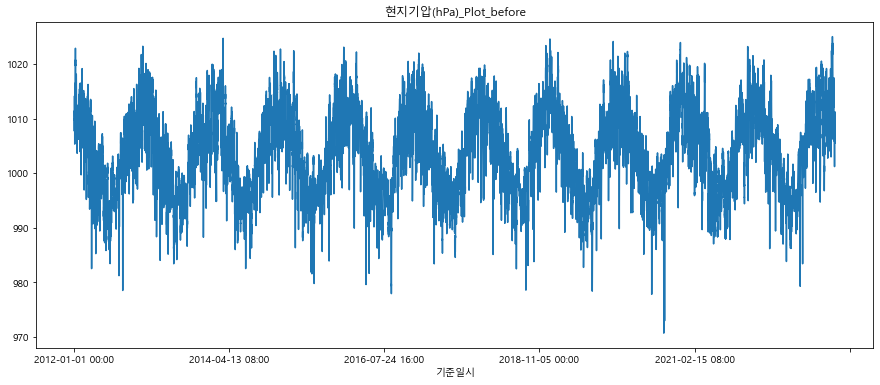

결측치 비율(%) :  0.0



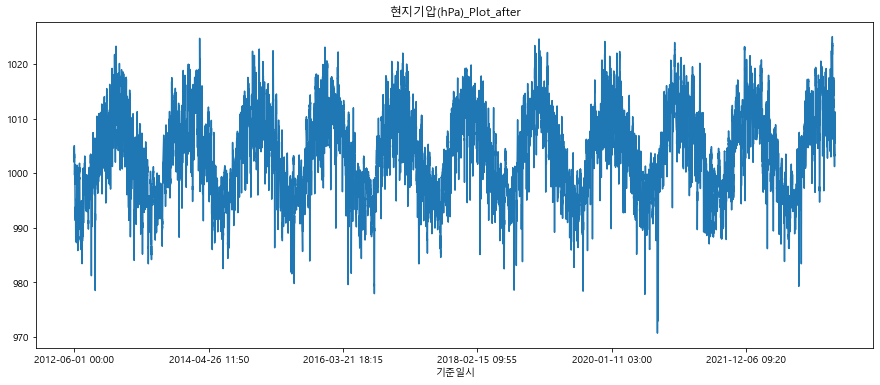

 38%|████████████████████████▍                                       | 13/34 [00:07<00:12,  1.62it/s]

결측치 비율(%) :  0.0



현지기압 QC플래그    현지기압 QC플래그
count  98137.000000  1.132411e+06
mean       0.254382  2.642005e-01
std        1.482906  1.470483e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max        9.000000  9.000000e+00

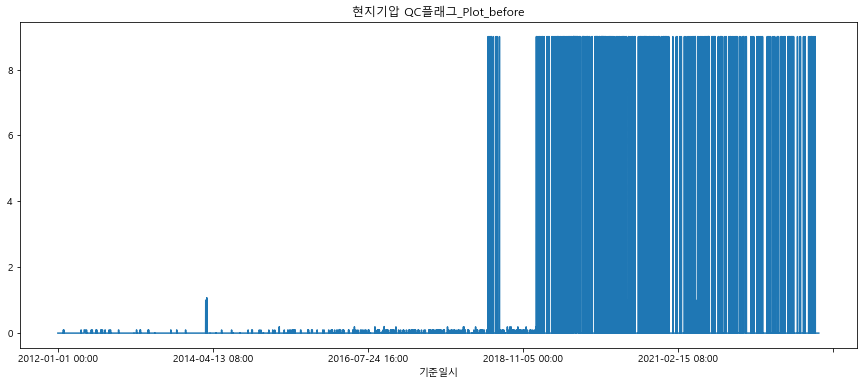

결측치 비율(%) :  0.0



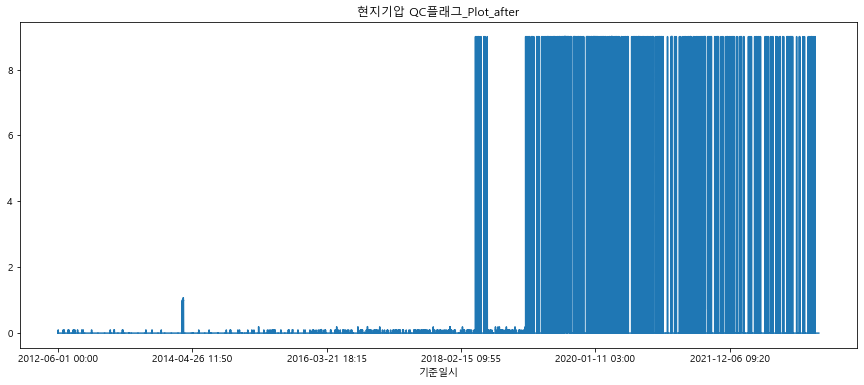

 41%|██████████████████████████▎                                     | 14/34 [00:08<00:11,  1.69it/s]

결측치 비율(%) :  0.0



해면기압(hPa)     해면기압(hPa)
count  98137.000000  1.132411e+06
mean    1016.468815  1.016389e+03
std        8.139470  8.160735e+00
min      982.045263  9.820453e+02
25%     1010.027368  1.009910e+03
50%     1016.716842  1.016604e+03
75%     1022.789474  1.022735e+03
max     1038.693684  1.038694e+03

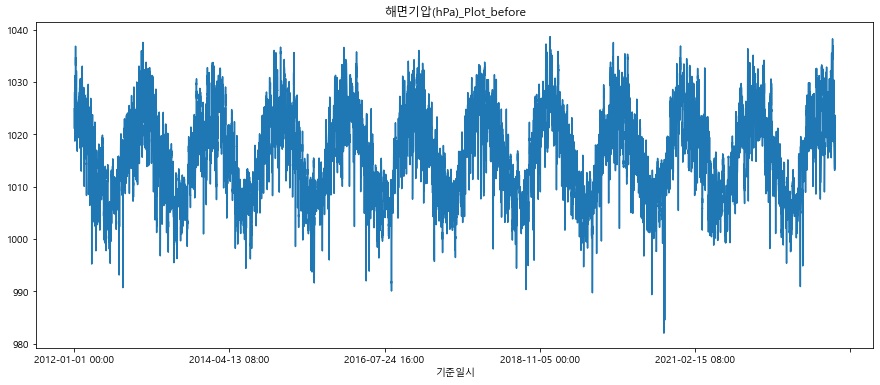

결측치 비율(%) :  0.0



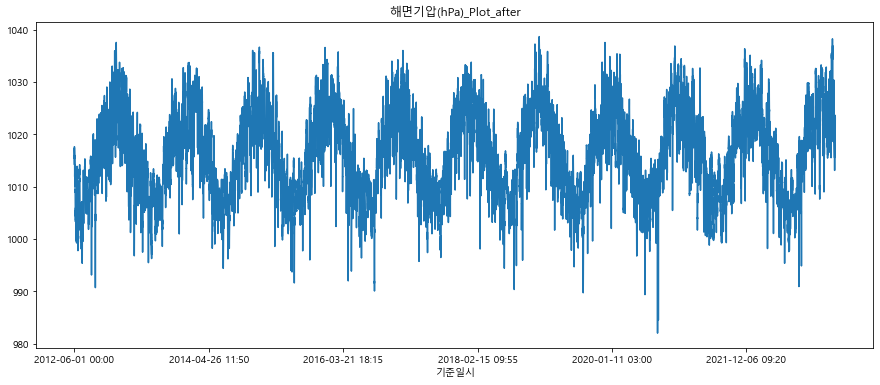

 44%|████████████████████████████▏                                   | 15/34 [00:09<00:11,  1.68it/s]

결측치 비율(%) :  0.0



해면기압 QC플래그    해면기압 QC플래그
count  98137.000000  1.132411e+06
mean       0.284773  2.959766e-01
std        1.568807  1.557284e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max        9.000000  9.000000e+00

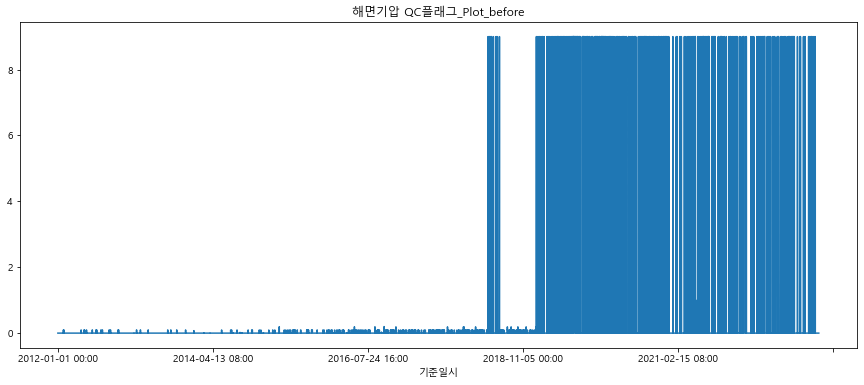

결측치 비율(%) :  0.0



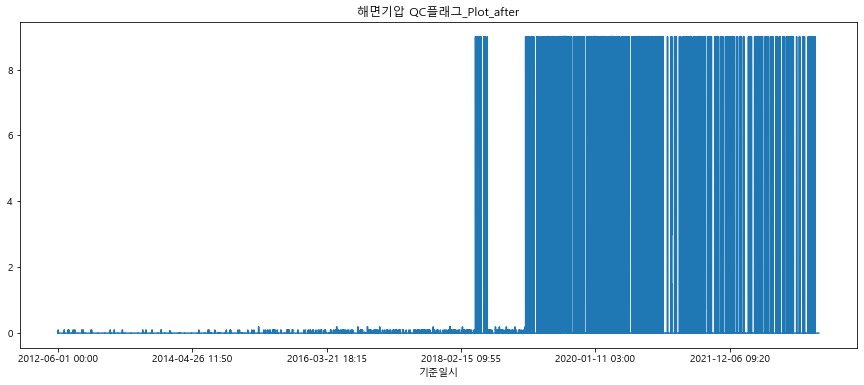

 47%|██████████████████████████████                                  | 16/34 [00:09<00:10,  1.72it/s]

결측치 비율(%) :  0.0



일조(hr)        일조(hr)
count  98137.000000  1.132411e+06
mean       0.260539  2.602872e-01
std        0.356363  3.512605e-01
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.003158  1.112186e-02
75%        0.556383  5.422807e-01
max        1.000000  1.000000e+00

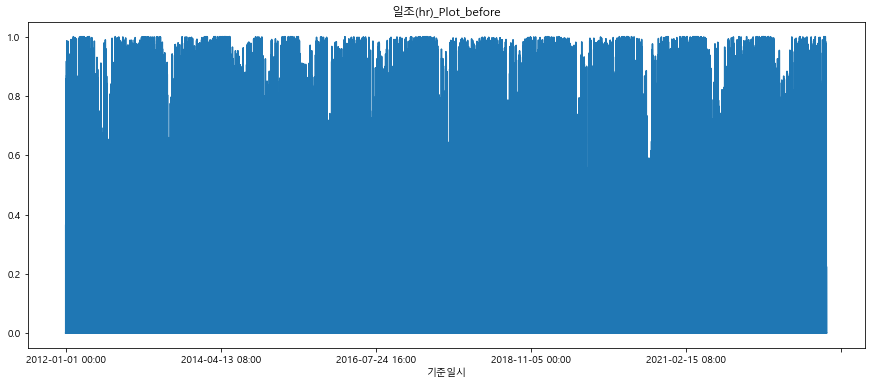

결측치 비율(%) :  0.0



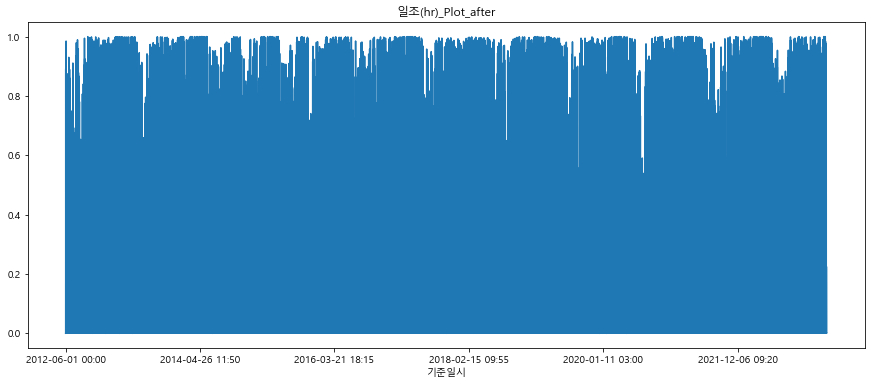

 50%|████████████████████████████████                                | 17/34 [00:10<00:10,  1.60it/s]

결측치 비율(%) :  0.0



일조 QC플래그      일조 QC플래그
count  98137.000000  1.132411e+06
mean       6.053939  6.126824e+00
std        4.199364  4.096035e+00
min        0.000000  0.000000e+00
25%        0.000000  9.473684e-02
50%        9.000000  9.000000e+00
75%        9.000000  9.000000e+00
max        9.000000  9.000000e+00

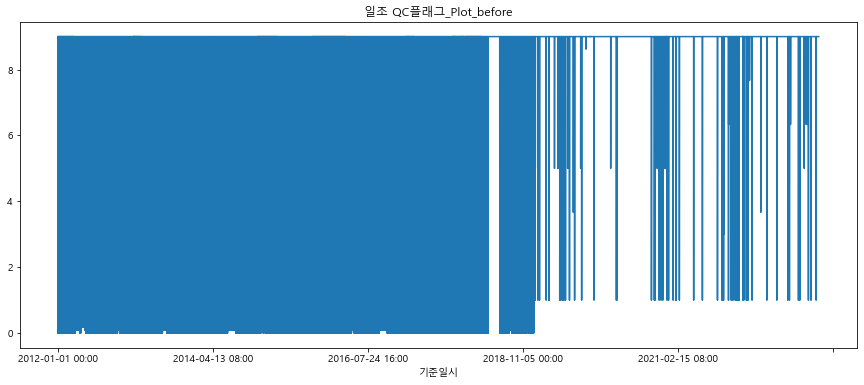

결측치 비율(%) :  0.0



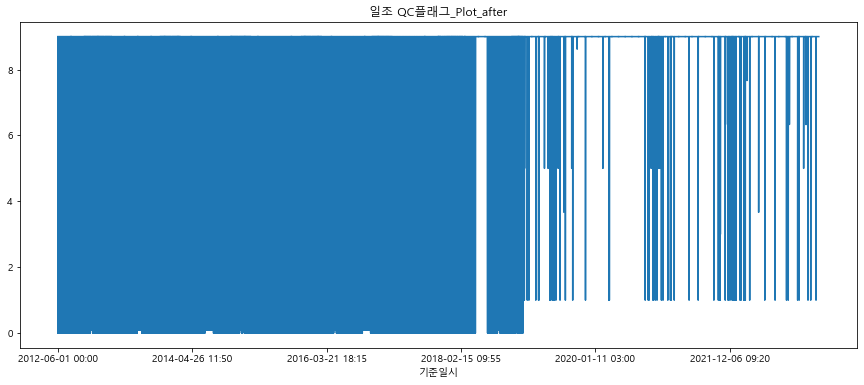

 53%|█████████████████████████████████▉                              | 18/34 [00:11<00:10,  1.51it/s]

결측치 비율(%) :  0.0



일사(MJ/m2)     일사(MJ/m2)
count  98137.000000  1.132411e+06
mean       0.580567  5.794526e-01
std        0.835051  8.254897e-01
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.025909  4.209302e-02
75%        1.033421  1.033920e+00
max        3.610263  3.610263e+00

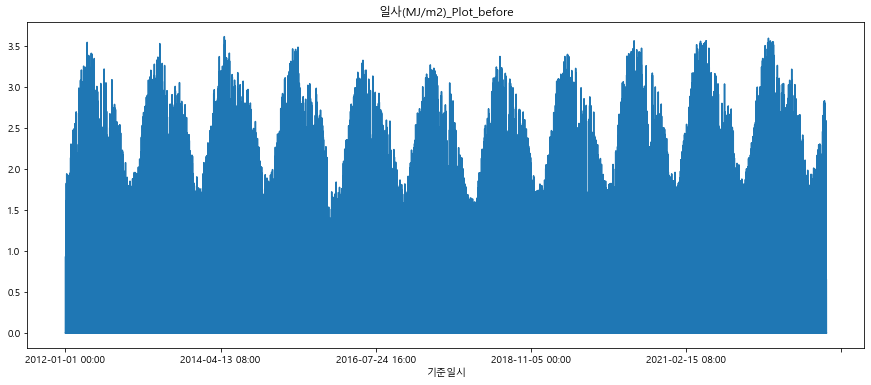

결측치 비율(%) :  0.0



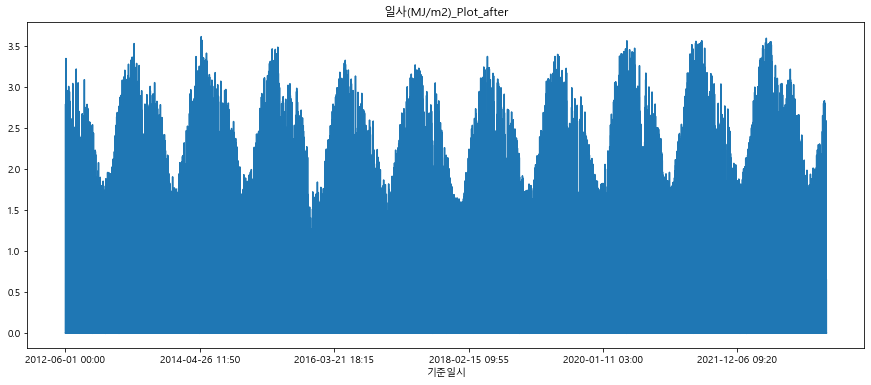

 56%|███████████████████████████████████▊                            | 19/34 [00:11<00:10,  1.45it/s]

결측치 비율(%) :  0.0



일사 QC플래그      일사 QC플래그
count  98137.000000  1.132411e+06
mean       7.778547  7.804869e+00
std        1.747695  1.711210e+00
min        4.838710  4.838710e+00
25%        5.380435  5.380435e+00
50%        9.000000  9.000000e+00
75%        9.000000  9.000000e+00
max        9.000000  9.000000e+00

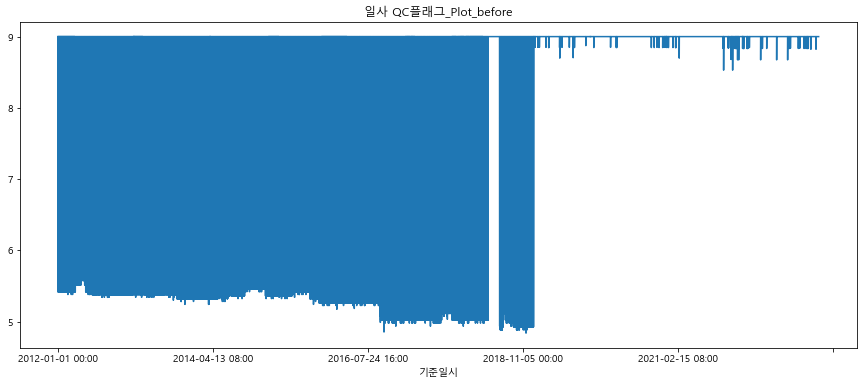

결측치 비율(%) :  0.0



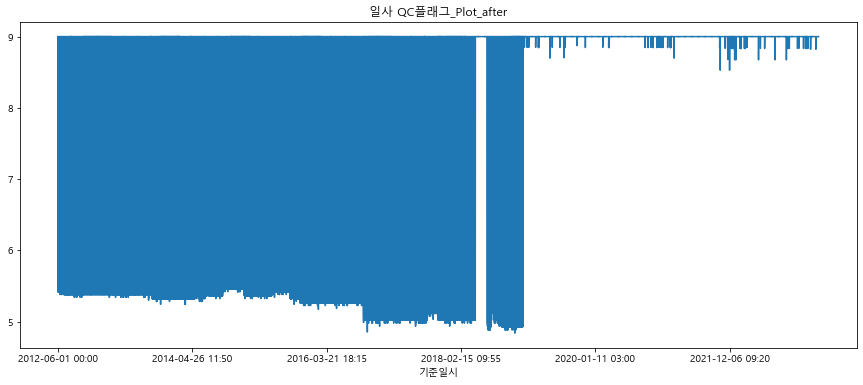

 59%|█████████████████████████████████████▋                          | 20/34 [00:12<00:09,  1.48it/s]

결측치 비율(%) :  0.0



적설(cm)        적설(cm)
count  98137.00000  1.132411e+06
mean       1.76549  1.550613e+00
std        5.33718  4.927312e+00
min        0.00000  0.000000e+00
25%        0.00000  0.000000e+00
50%        0.00000  0.000000e+00
75%        0.00000  0.000000e+00
max       88.10000  8.810000e+01

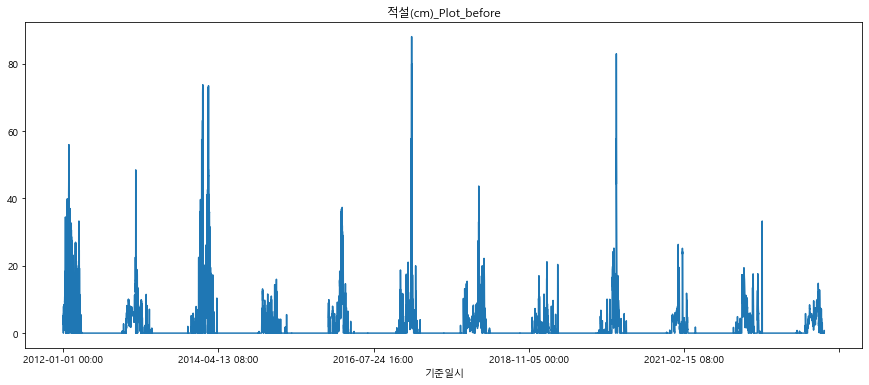

결측치 비율(%) :  0.0



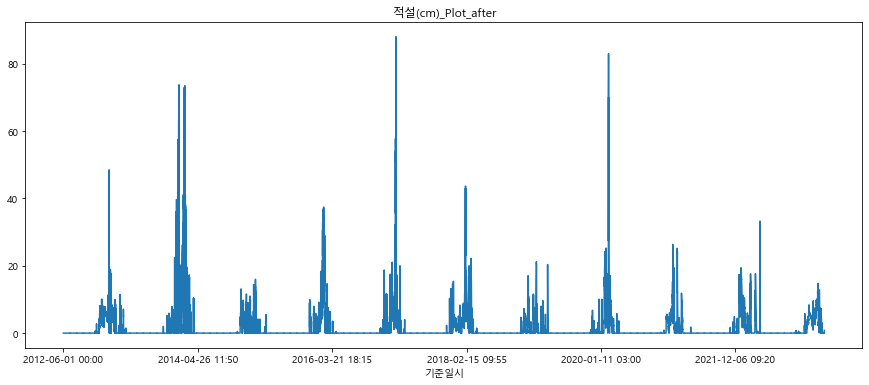

 62%|███████████████████████████████████████▌                        | 21/34 [00:13<00:08,  1.56it/s]

결측치 비율(%) :  0.0



3시간신적설(cm)    3시간신적설(cm)
count  98137.000000  1.132411e+06
mean       0.035207  3.265200e-02
std        0.324831  2.531670e-01
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max       13.800000  1.380000e+01

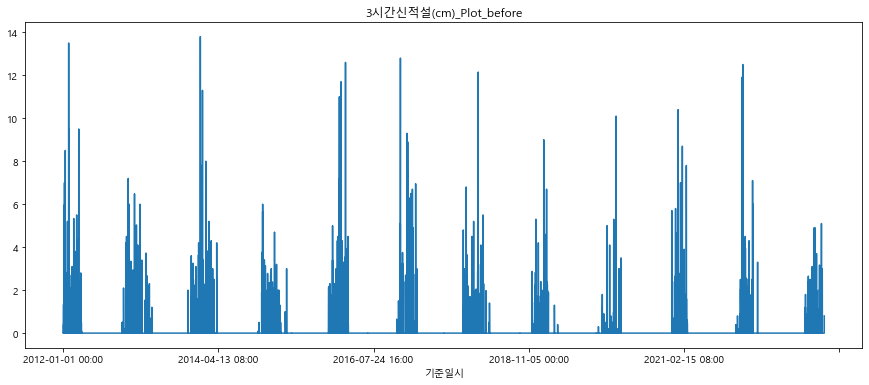

결측치 비율(%) :  0.0



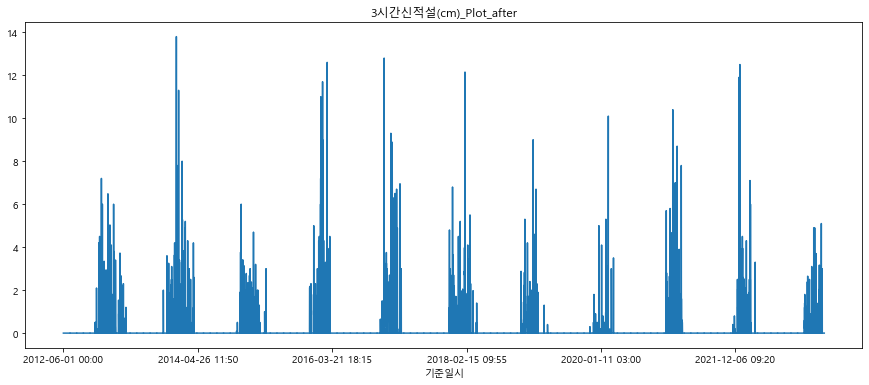

 65%|█████████████████████████████████████████▍                      | 22/34 [00:13<00:07,  1.62it/s]

결측치 비율(%) :  0.0



전운량(10분위)     전운량(10분위)
count  98137.000000  1.132411e+06
mean       5.553166  5.552563e+00
std        3.018883  2.950655e+00
min        0.000000  0.000000e+00
25%        3.031915  3.136364e+00
50%        5.553166  5.553166e+00
75%        8.225000  8.152330e+00
max       10.000000  1.000000e+01

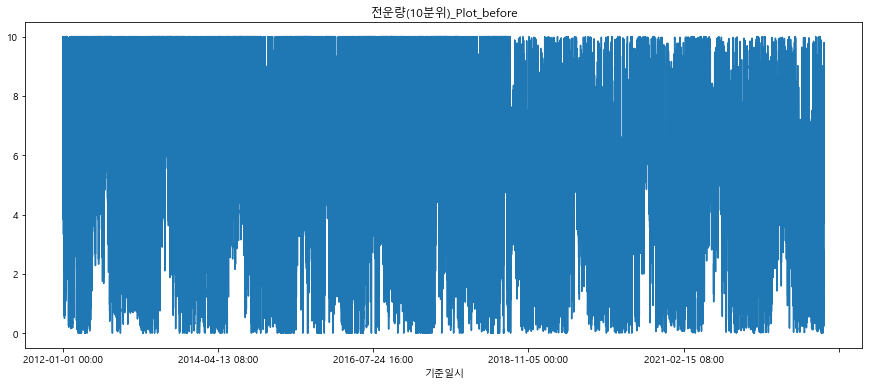

결측치 비율(%) :  0.0



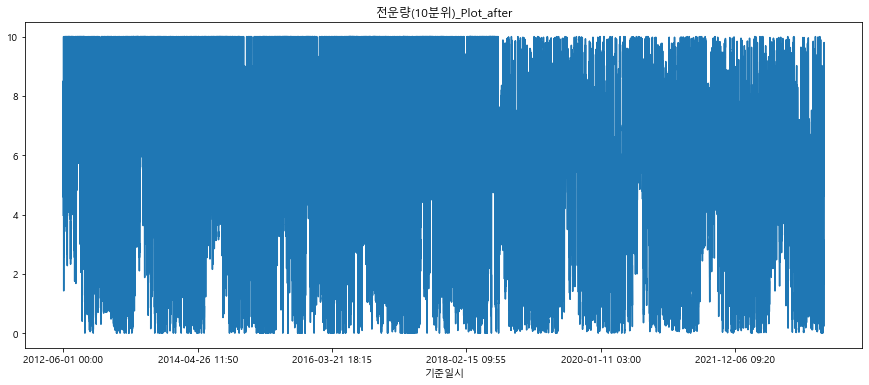

 68%|███████████████████████████████████████████▎                    | 23/34 [00:14<00:07,  1.54it/s]

결측치 비율(%) :  0.0



중하층운량(10분위)   중하층운량(10분위)
count  98137.000000  1.132411e+06
mean       3.408492  3.403085e+00
std        2.307564  2.249271e+00
min        0.000000  0.000000e+00
25%        1.395604  1.443548e+00
50%        3.350000  3.256250e+00
75%        5.227273  5.228261e+00
max       10.000000  1.000000e+01

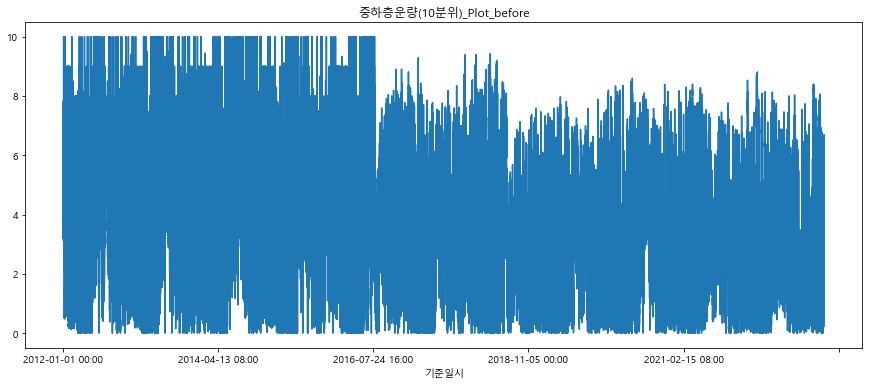

결측치 비율(%) :  0.0



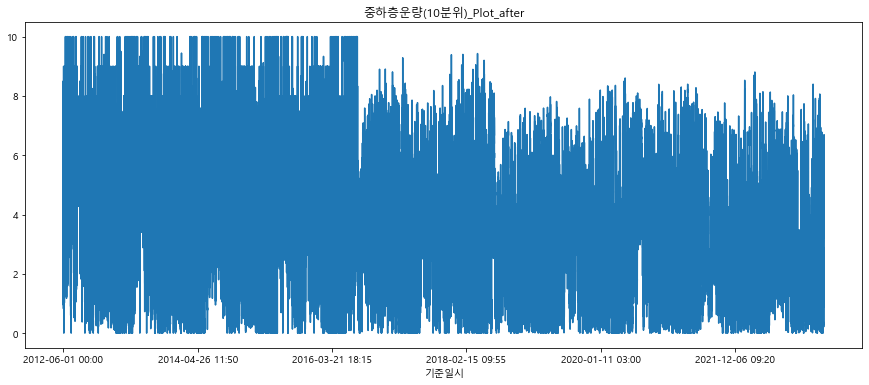

 71%|█████████████████████████████████████████████▏                  | 24/34 [00:15<00:06,  1.46it/s]

결측치 비율(%) :  0.0



최저운고(100m )   최저운고(100m )
count  98137.000000  1.132411e+06
mean      15.014502  1.516954e+01
std       10.406926  1.024234e+01
min      -26.818182 -2.681818e+01
25%        9.075758  9.164344e+00
50%       11.047619  1.140000e+01
75%       16.061224  1.666667e+01
max       76.000000  7.600000e+01

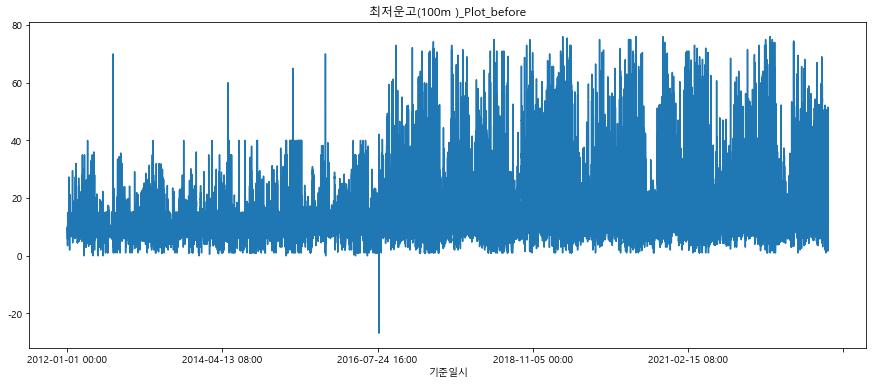

결측치 비율(%) :  0.0



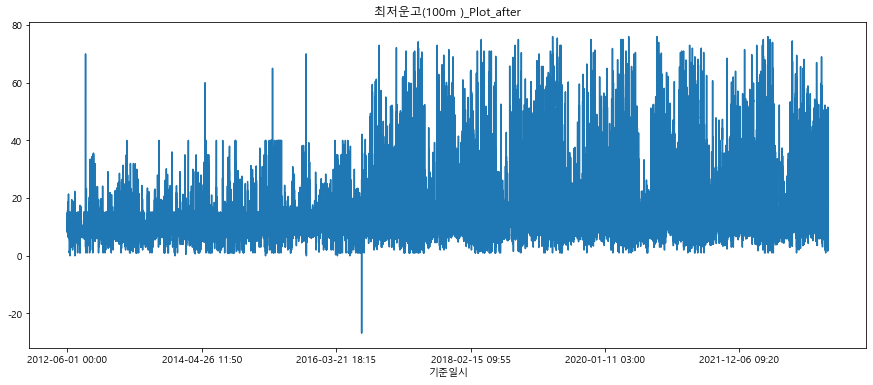

 74%|███████████████████████████████████████████████                 | 25/34 [00:15<00:06,  1.49it/s]

결측치 비율(%) :  0.0



시정(10m)       시정(10m)
count  98137.000000  1.132411e+06
mean    1674.317731  1.682037e+03
std      567.739271  5.647115e+02
min        3.000000  3.000000e+00
25%     1291.195652  1.298958e+03
50%     1684.255319  1.698582e+03
75%     2026.757895  2.032086e+03
max     4139.136842  4.139137e+03

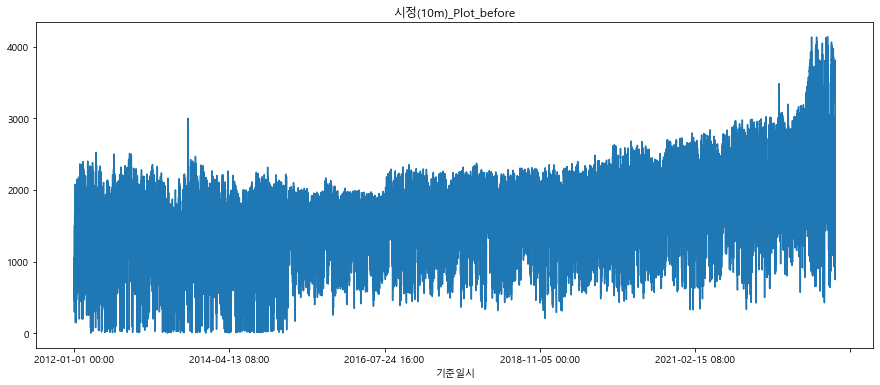

결측치 비율(%) :  0.0



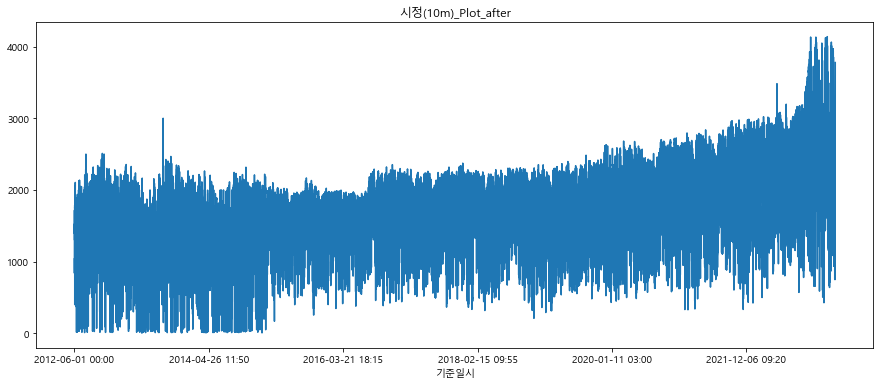

 76%|████████████████████████████████████████████████▉               | 26/34 [00:16<00:05,  1.53it/s]

결측치 비율(%) :  0.0



지면상태(지면상태코드)  지면상태(지면상태코드)
count  98137.000000  1.132411e+06
mean       1.415061  1.410701e+00
std        0.505498  3.971849e-01
min        0.000000  0.000000e+00
25%        1.415061  1.415061e+00
50%        1.415061  1.415061e+00
75%        1.415061  1.415061e+00
max       14.000000  1.400000e+01

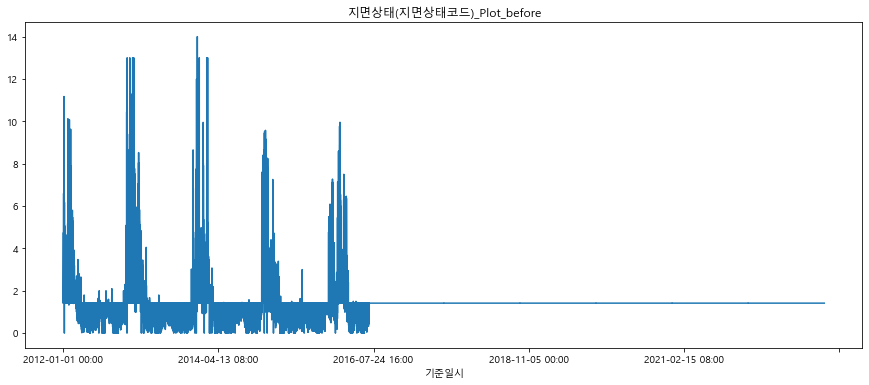

결측치 비율(%) :  0.0



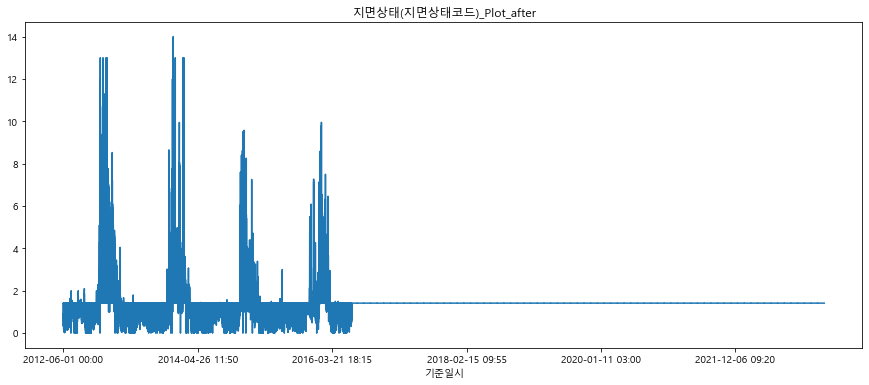

 79%|██████████████████████████████████████████████████▊             | 27/34 [00:17<00:04,  1.56it/s]

결측치 비율(%) :  0.0



현상번호(국내식)     현상번호(국내식)
count  9.813700e+04  1.132411e+06
mean   4.451491e+06  4.573904e+06
std    6.137405e+08  5.119691e+08
min    0.000000e+00  0.000000e+00
25%    1.975000e+01  3.283333e+01
50%    3.554444e+02  4.301015e+02
75%    1.719917e+03  1.058852e+04
max    1.454340e+11  1.454340e+11

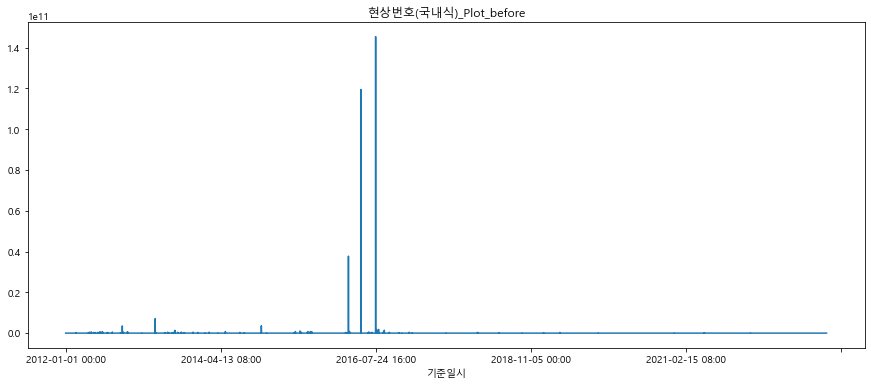

결측치 비율(%) :  0.0



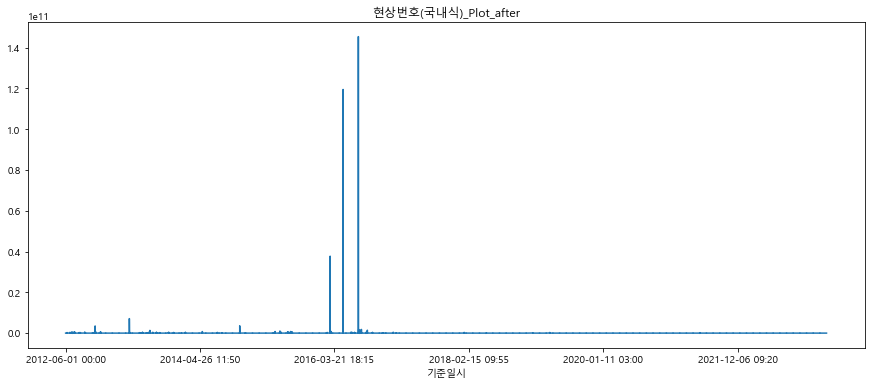

 82%|████████████████████████████████████████████████████▋           | 28/34 [00:18<00:05,  1.07it/s]

결측치 비율(%) :  0.0



지면온도(°C)      지면온도(°C)
count  98137.000000  1.132411e+06
mean      15.040603  1.528135e+01
std       12.118345  1.208038e+01
min       -9.335106 -9.335106e+00
25%        4.391579  4.679787e+00
50%       14.791579  1.522943e+01
75%       24.070652  2.425129e+01
max       58.633684  5.863368e+01

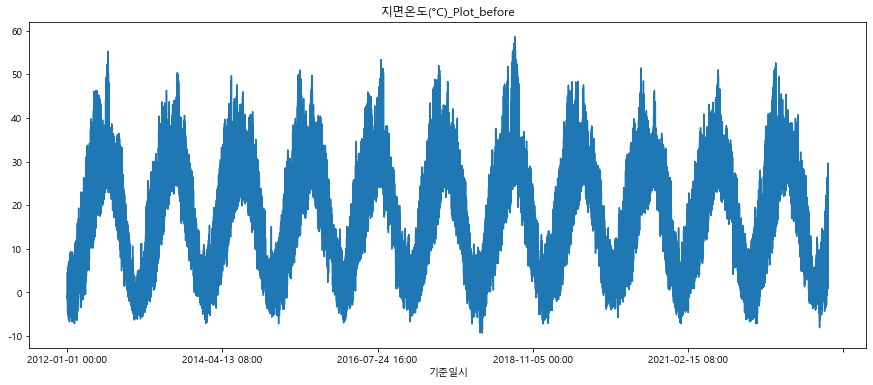

결측치 비율(%) :  0.0



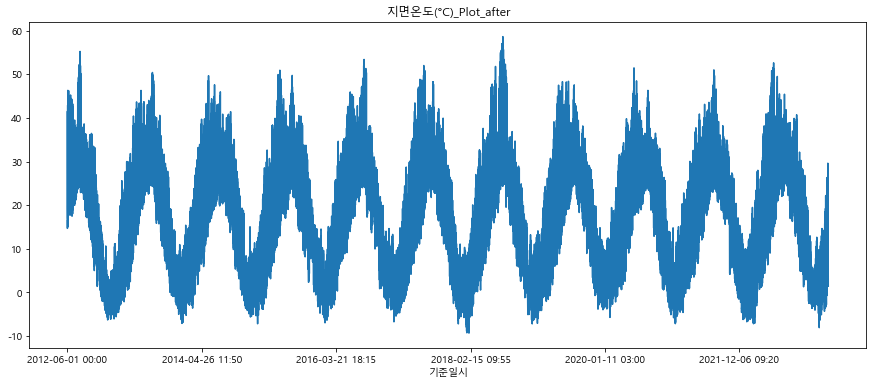

 85%|██████████████████████████████████████████████████████▌         | 29/34 [00:19<00:04,  1.18it/s]

결측치 비율(%) :  0.0



지면온도 QC플래그    지면온도 QC플래그
count  98137.000000  1.132411e+06
mean       0.534663  5.553131e-01
std        1.746226  1.743987e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.534663  5.346631e-01
max        9.000000  9.000000e+00

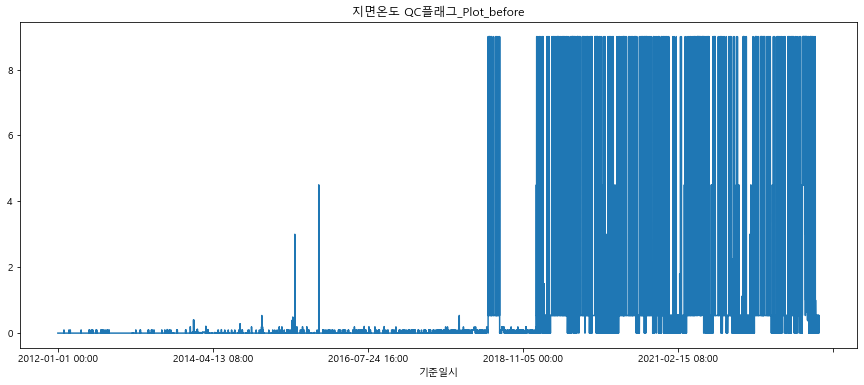

결측치 비율(%) :  0.0



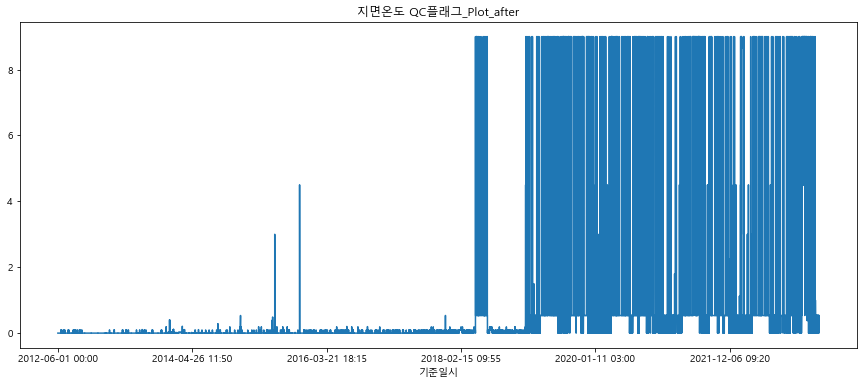

 88%|████████████████████████████████████████████████████████▍       | 30/34 [00:19<00:03,  1.30it/s]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count  98137.000000  1.132411e+06
mean      15.047269  1.529971e+01
std        9.920525  9.888436e+00
min       -3.807143 -3.807143e+00
25%        5.500000  5.808642e+00
50%       15.434375  1.581474e+01
75%       23.760714  2.394904e+01
max       39.817857  3.981786e+01

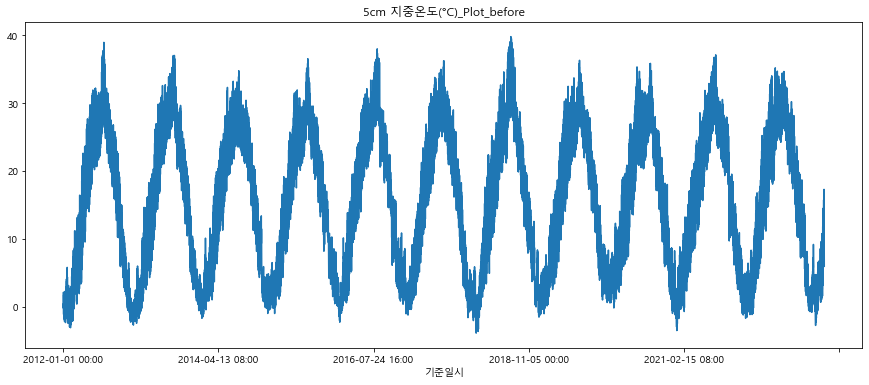

결측치 비율(%) :  0.0



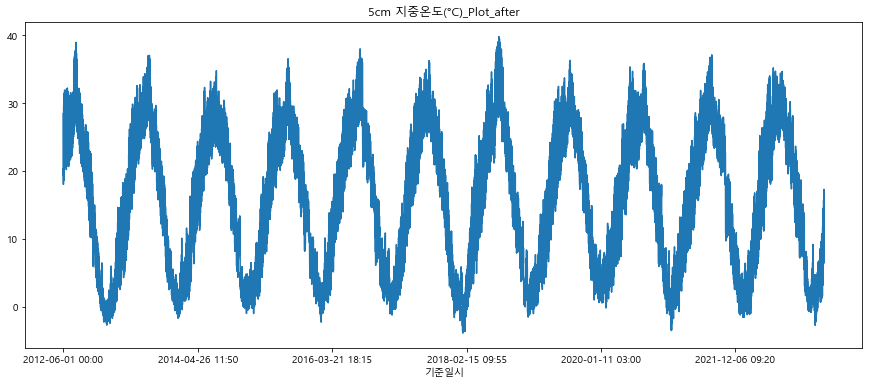

 91%|██████████████████████████████████████████████████████████▎     | 31/34 [00:20<00:02,  1.41it/s]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count   98137.000000   1.132411e+06
mean       15.023566   1.527687e+01
std         9.584733   9.552105e+00
min        -2.381481  -2.381481e+00
25%         5.711111   5.996296e+00
50%        15.437037   1.582738e+01
75%        23.662500   2.384491e+01
max        36.889286   3.688929e+01

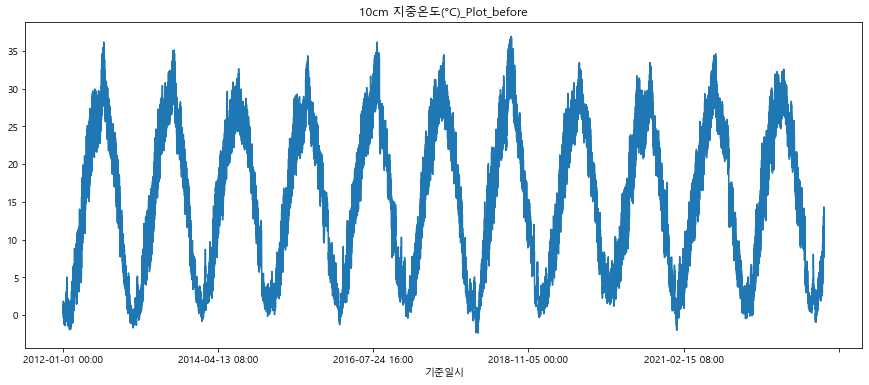

결측치 비율(%) :  0.0



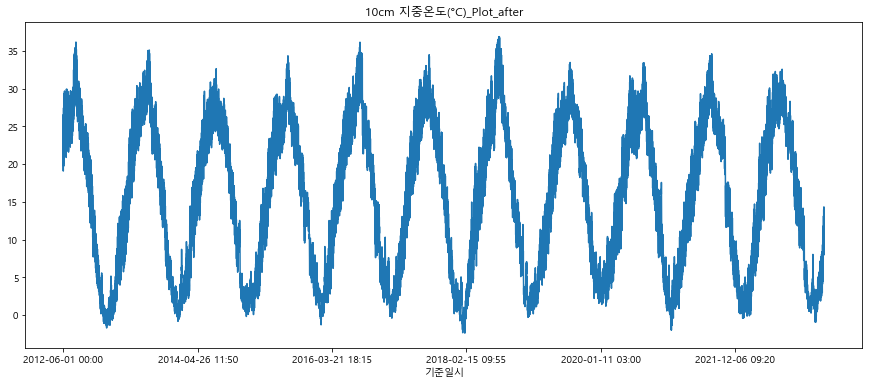

 94%|████████████████████████████████████████████████████████████▏   | 32/34 [00:21<00:01,  1.47it/s]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count   98137.000000   1.132411e+06
mean       15.168991   1.542984e+01
std         9.136890   9.102428e+00
min        -0.811111  -8.111111e-01
25%         6.214286   6.508333e+00
50%        15.538462   1.592887e+01
75%        23.632143   2.379848e+01
max        34.110714   3.411071e+01

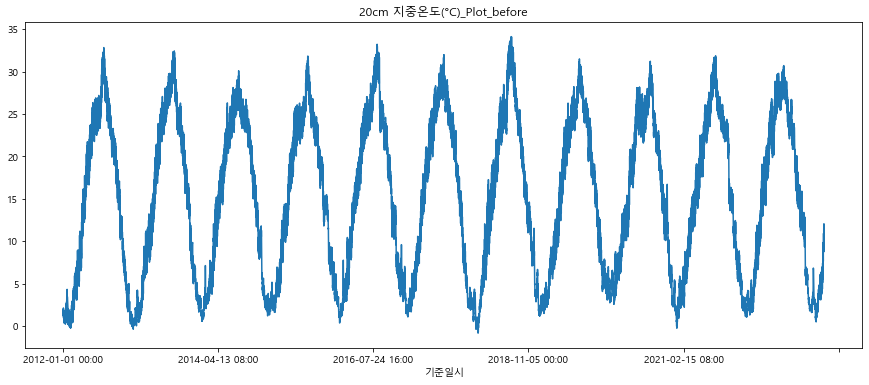

결측치 비율(%) :  0.0



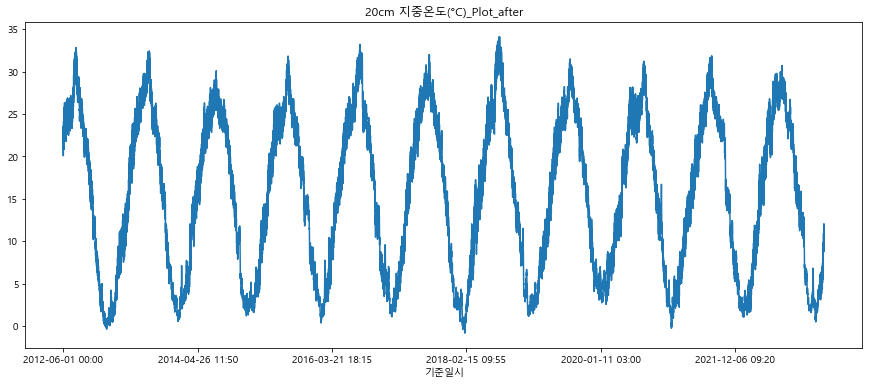

 97%|██████████████████████████████████████████████████████████████  | 33/34 [00:21<00:00,  1.50it/s]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count   98137.000000   1.132411e+06
mean       15.226097   1.548843e+01
std         8.775796   8.739673e+00
min         0.272000   2.720000e-01
25%         6.571429   6.874359e+00
50%        15.653571   1.602054e+01
75%        23.453125   2.361538e+01
max        32.275000   3.227500e+01

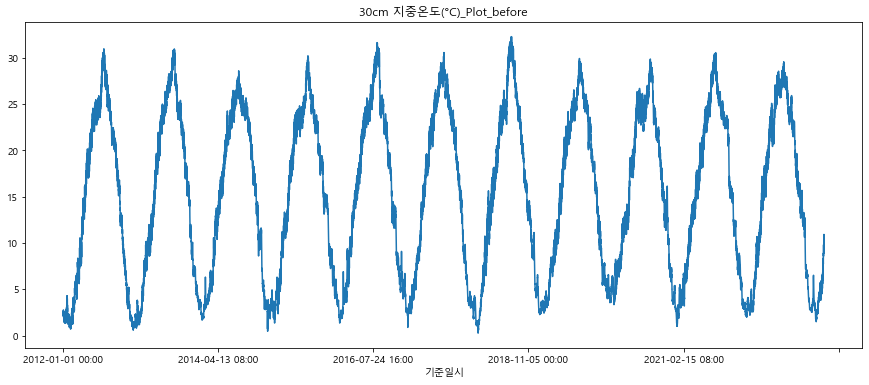

결측치 비율(%) :  0.0



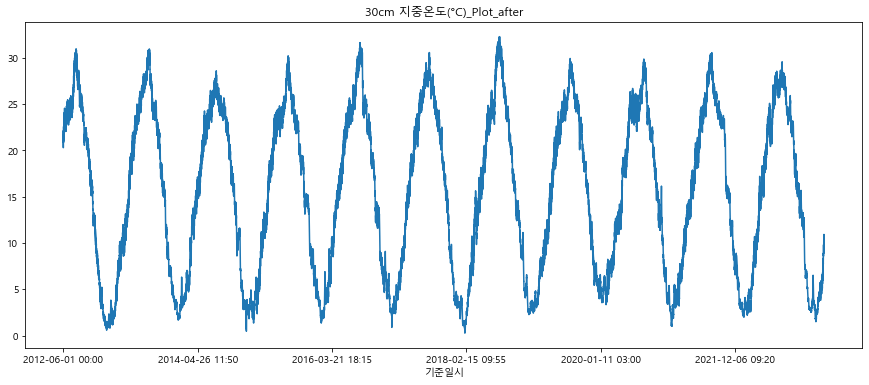

100%|████████████████████████████████████████████████████████████████| 34/34 [00:22<00:00,  1.52it/s]

결측치 비율(%) :  0.0



In [97]:
compare_describe(time_fill, df)

In [99]:
import seaborn as sns

<Axes: xlabel='기온(°C)', ylabel='Density'>

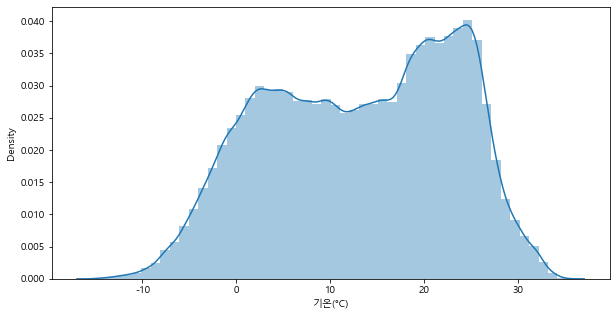

In [105]:
plt.figure(figsize=(10, 5))
sns.distplot(df['기온(°C)'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [152]:
def confirm_dist(df, df2):
    for i in tqdm(df.columns):   
        
        # distplot
        plt.figure(figsize=(10, 5))
        sns.distplot(df[i], label='Before Normalization')
        sns.distplot(df2[i], label='After Normalization')
        plt.title('Comparison of Normalized Data')
        plt.legend()
        plt.show()

<Axes: xlabel='기온(°C)', ylabel='Density'>

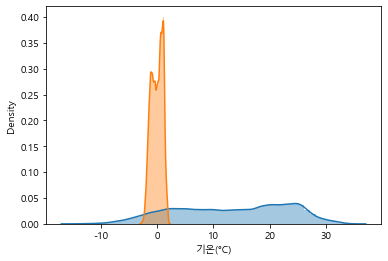

In [157]:
sns.distplot(a['기온(°C)'], label='Before Normalization')
sns.distplot(b['기온(°C)'], label='After Normalization')

In [180]:
c = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index).copy()

In [182]:
c.index.value_counts()

2012-06-01 00:00    1
2019-08-07 14:30    1
2019-08-07 15:00    1
2019-08-07 14:55    1
2019-08-07 14:50    1
                   ..
2016-01-03 12:55    1
2016-01-03 13:00    1
2016-01-03 13:05    1
2016-01-03 13:10    1
2023-03-12 23:55    1
Name: 기준일시, Length: 1132411, dtype: int64

  0%|                                                                         | 0/34 [00:00<?, ?it/s]

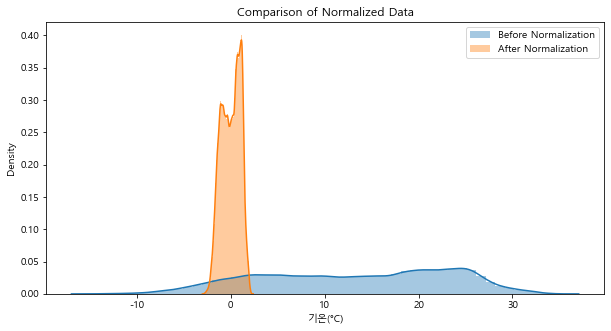

  3%|█▉                                                               | 1/34 [00:10<05:45, 10.47s/it]

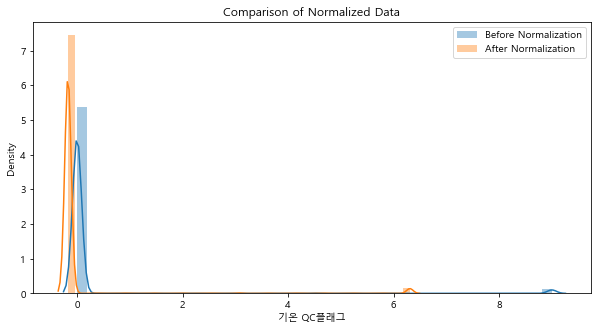

  6%|███▊                                                             | 2/34 [00:25<07:09, 13.43s/it]

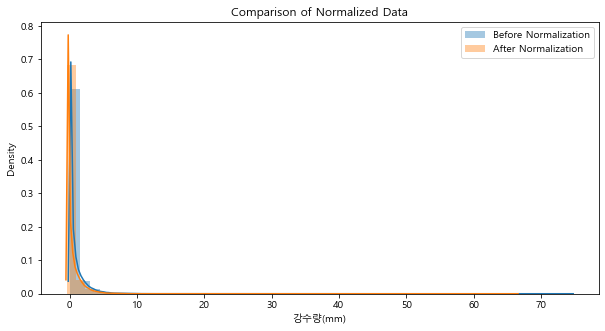

  9%|█████▋                                                           | 3/34 [00:45<08:27, 16.38s/it]

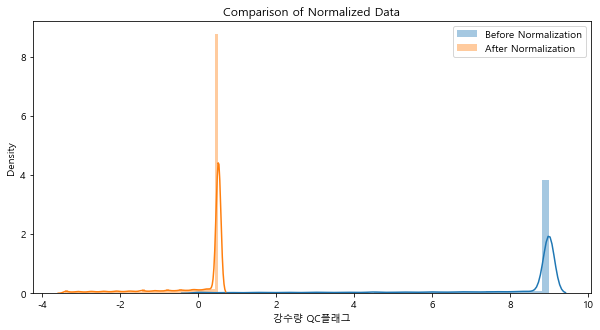

 12%|███████▋                                                         | 4/34 [00:57<07:21, 14.70s/it]

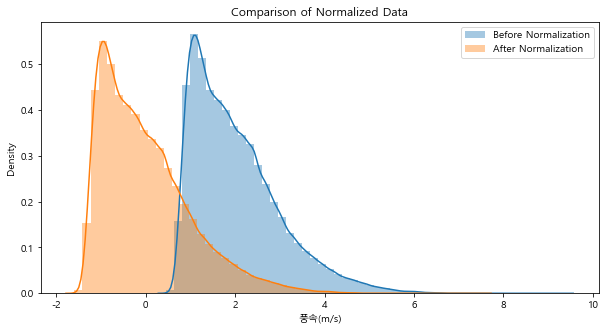

 15%|█████████▌                                                       | 5/34 [01:13<07:10, 14.84s/it]

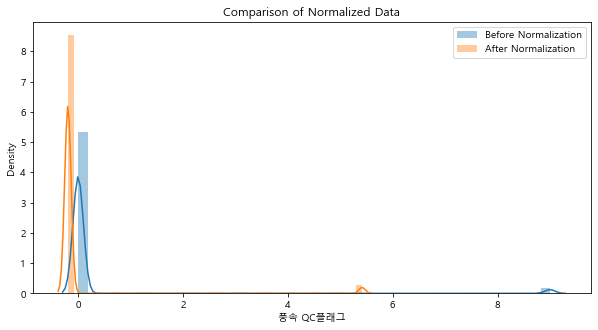

 18%|███████████▍                                                     | 6/34 [01:28<07:00, 15.01s/it]

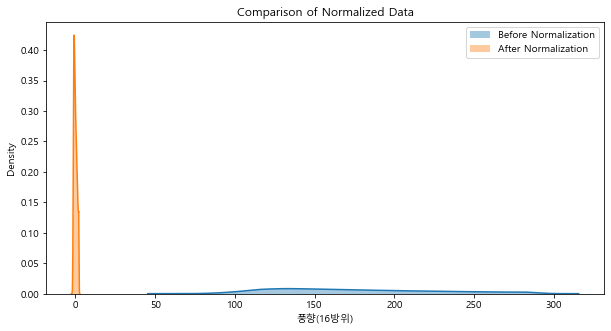

 21%|█████████████▍                                                   | 7/34 [01:38<06:03, 13.45s/it]

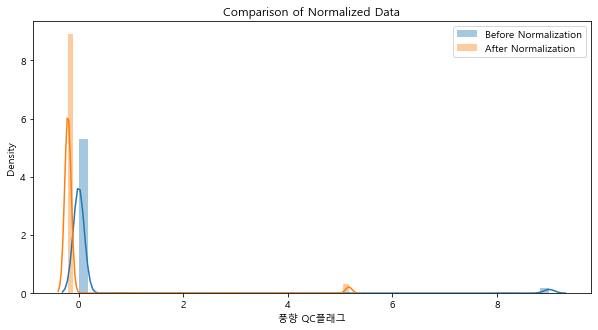

 24%|███████████████▎                                                 | 8/34 [01:53<06:03, 13.99s/it]

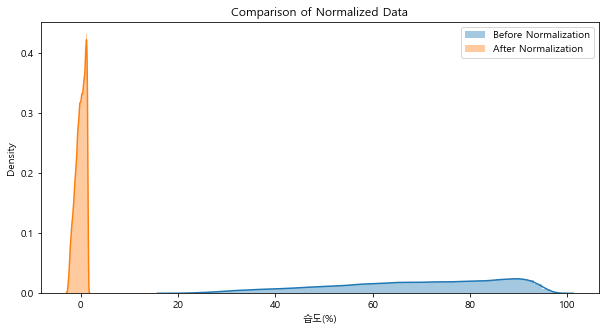

 26%|█████████████████▏                                               | 9/34 [02:04<05:21, 12.85s/it]

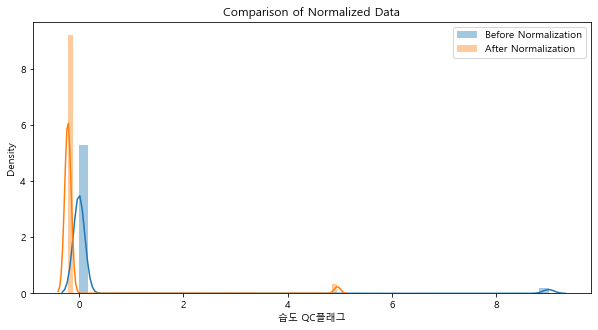

 29%|██████████████████▊                                             | 10/34 [02:18<05:22, 13.42s/it]

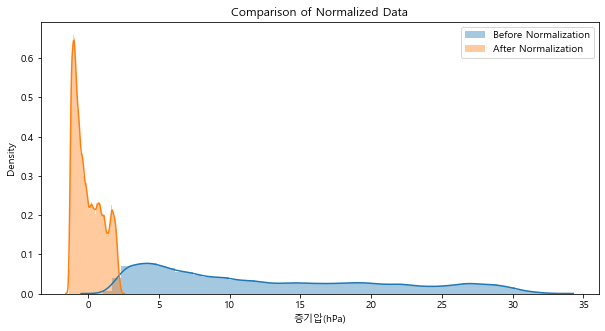

 32%|████████████████████▋                                           | 11/34 [02:28<04:41, 12.25s/it]

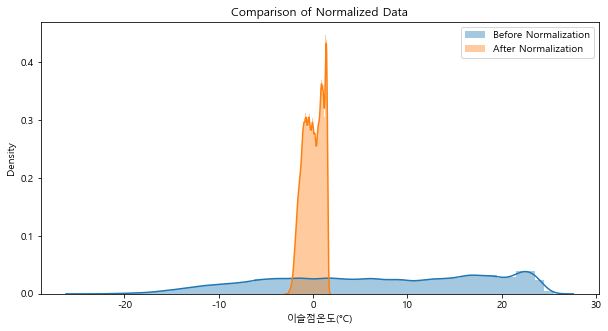

 35%|██████████████████████▌                                         | 12/34 [02:38<04:16, 11.64s/it]

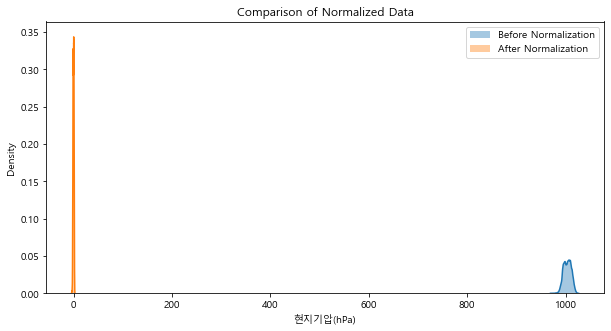

 38%|████████████████████████▍                                       | 13/34 [02:51<04:13, 12.05s/it]

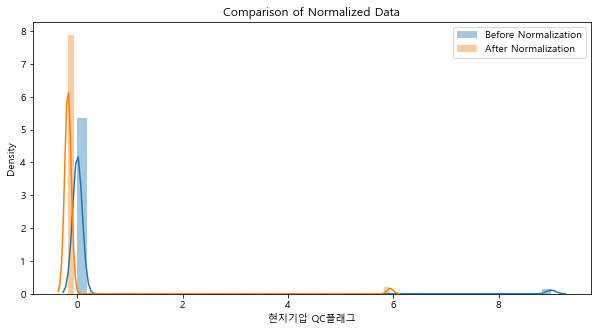

 41%|██████████████████████████▎                                     | 14/34 [03:07<04:22, 13.14s/it]

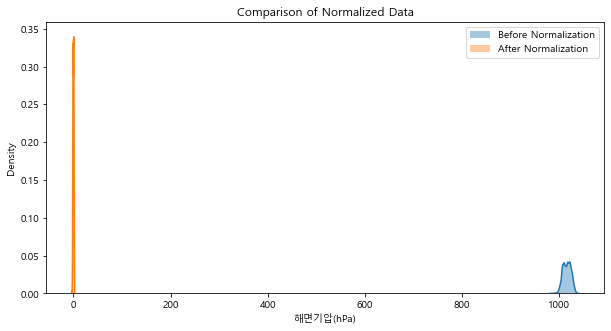

 44%|████████████████████████████▏                                   | 15/34 [03:20<04:07, 13.03s/it]

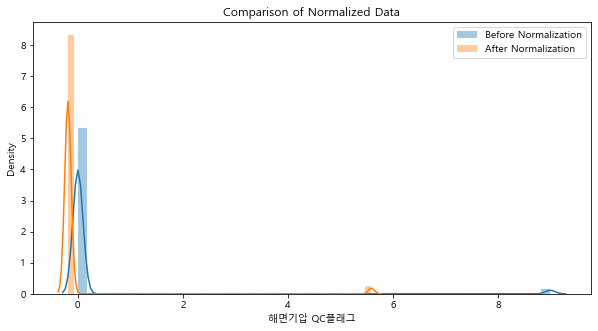

 47%|██████████████████████████████                                  | 16/34 [03:36<04:10, 13.90s/it]

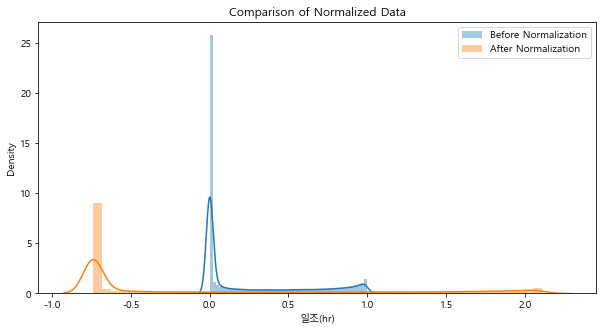

 50%|████████████████████████████████                                | 17/34 [03:45<03:32, 12.52s/it]

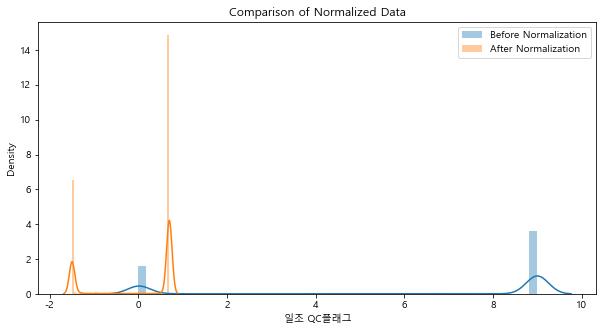

 53%|█████████████████████████████████▉                              | 18/34 [03:53<02:59, 11.20s/it]

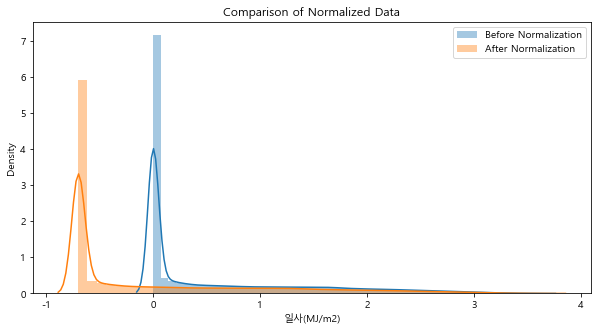

 56%|███████████████████████████████████▊                            | 19/34 [04:05<02:52, 11.49s/it]

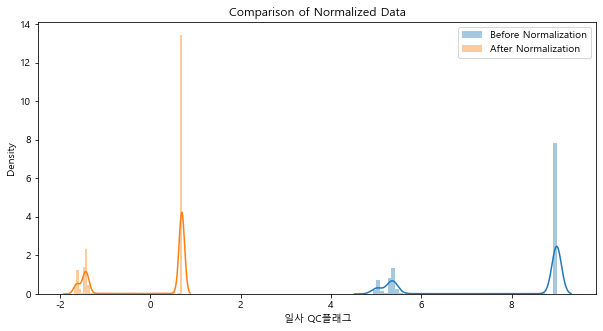

 59%|█████████████████████████████████████▋                          | 20/34 [04:13<02:27, 10.53s/it]

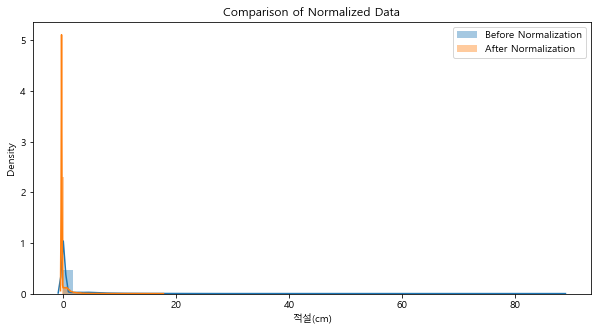

 62%|███████████████████████████████████████▌                        | 21/34 [04:32<02:48, 12.97s/it]

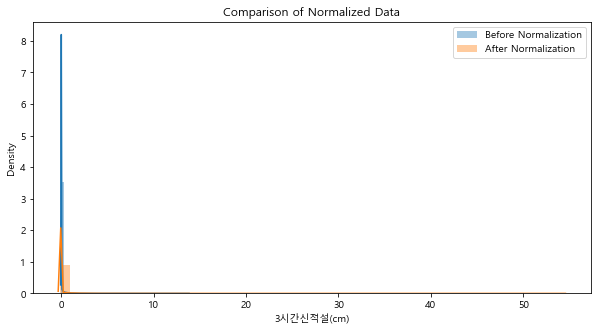

 65%|█████████████████████████████████████████▍                      | 22/34 [04:53<03:05, 15.47s/it]

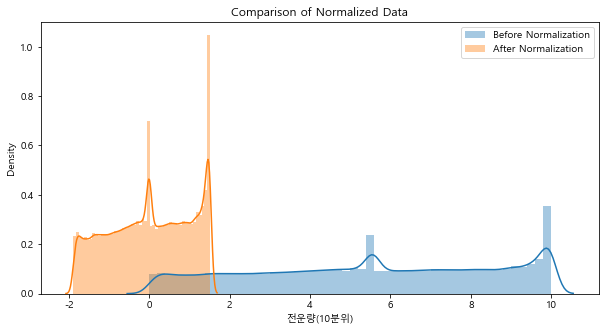

 68%|███████████████████████████████████████████▎                    | 23/34 [05:02<02:28, 13.51s/it]

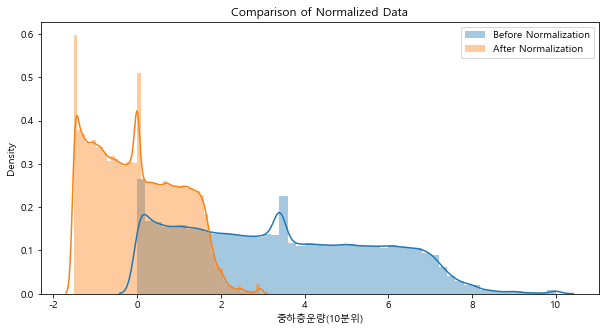

 71%|█████████████████████████████████████████████▏                  | 24/34 [05:13<02:06, 12.61s/it]

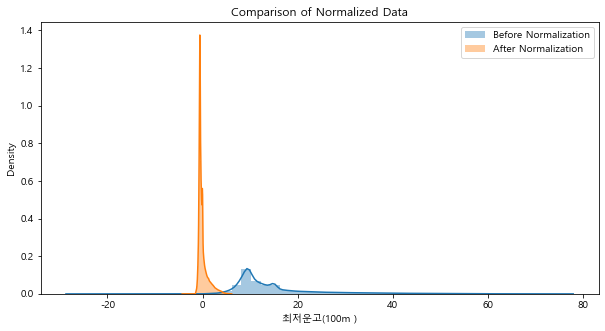

 74%|███████████████████████████████████████████████                 | 25/34 [05:28<02:00, 13.43s/it]

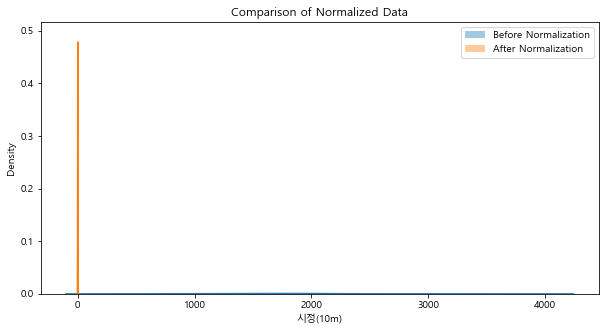

 76%|████████████████████████████████████████████████▉               | 26/34 [05:41<01:46, 13.33s/it]

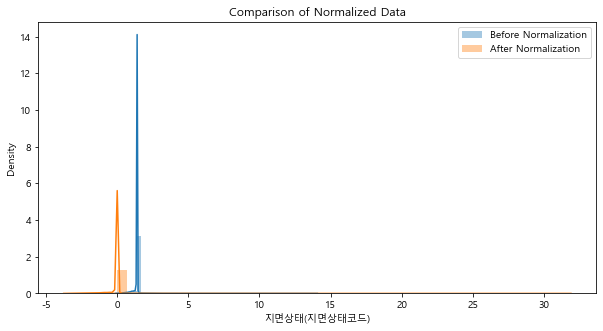

 79%|██████████████████████████████████████████████████▊             | 27/34 [06:01<01:45, 15.13s/it]

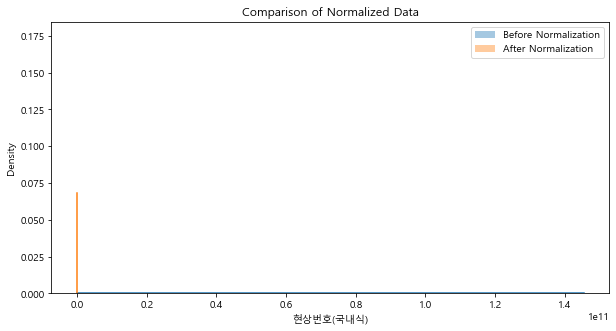

 82%|████████████████████████████████████████████████████▋           | 28/34 [06:21<01:39, 16.65s/it]

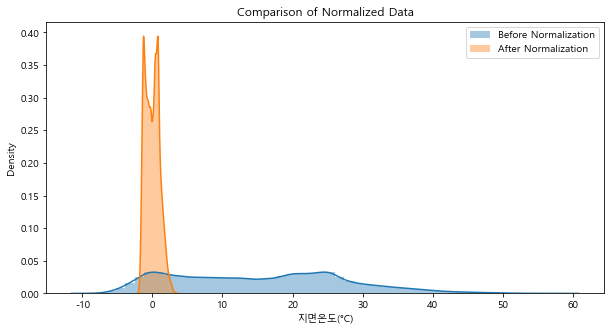

 85%|██████████████████████████████████████████████████████▌         | 29/34 [06:33<01:15, 15.18s/it]

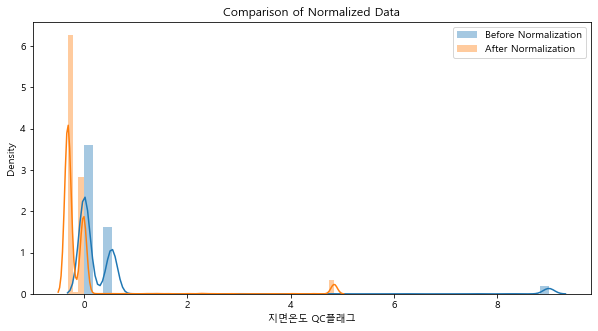

 88%|████████████████████████████████████████████████████████▍       | 30/34 [06:47<00:59, 14.88s/it]

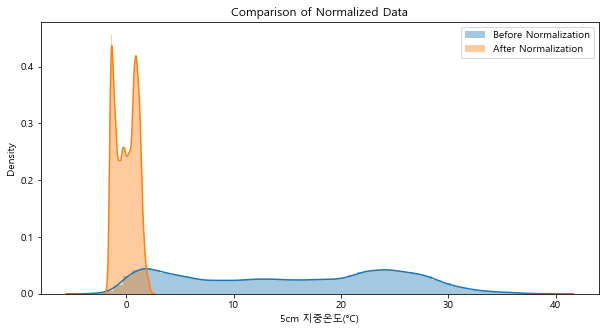

 91%|██████████████████████████████████████████████████████████▎     | 31/34 [06:57<00:40, 13.39s/it]

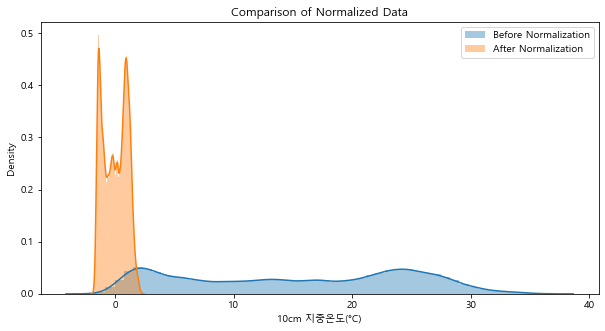

 94%|████████████████████████████████████████████████████████████▏   | 32/34 [07:06<00:24, 12.29s/it]

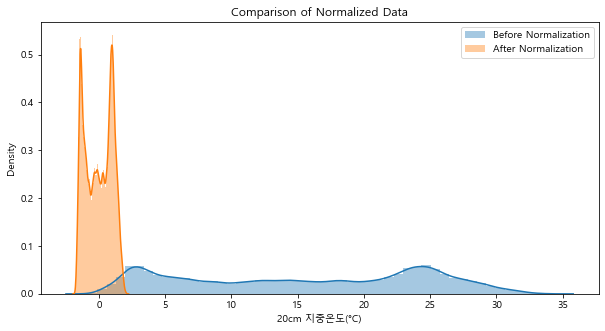

 97%|██████████████████████████████████████████████████████████████  | 33/34 [07:16<00:11, 11.43s/it]

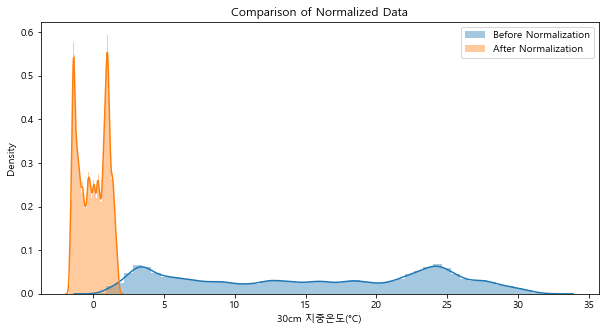

100%|████████████████████████████████████████████████████████████████| 34/34 [07:25<00:00, 13.11s/it]


In [153]:
a = df.drop('현재수요(MW)', axis=1)
b = pd.DataFrame(scaler.fit_transform(a), columns=a.columns).copy()

confirm_dist(a, b)

In [144]:
# a.iloc[:,:10]
len(a.columns)

34

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


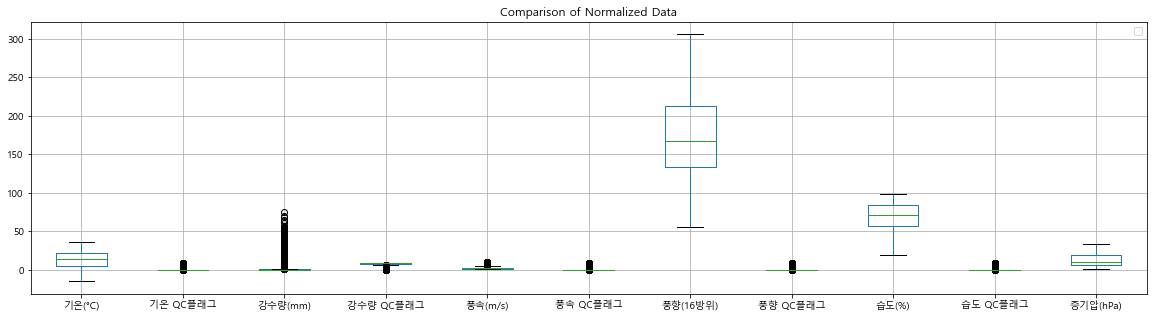

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


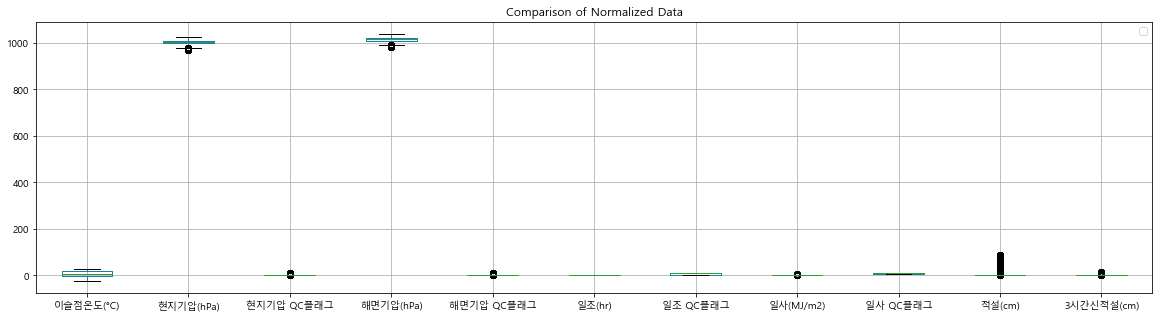

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


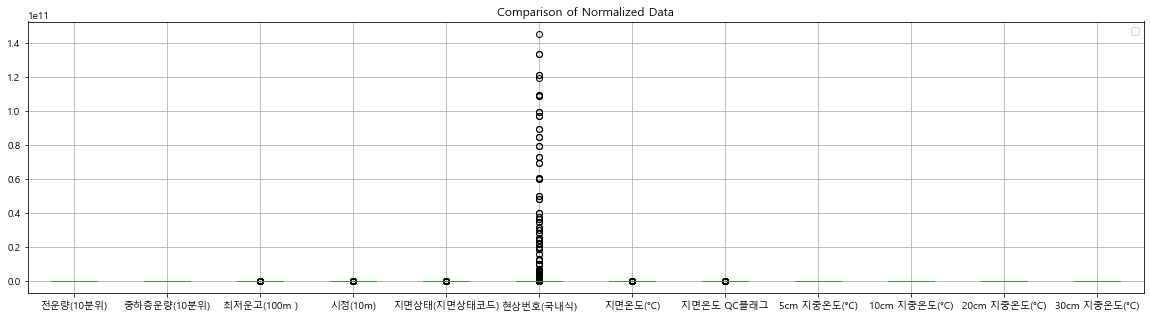

In [146]:

plt.figure(figsize=(20, 5))
# plt.boxplot(a.columns, labels=['Before Normalization', 'After Normalization'])
display(a.iloc[:,:11].boxplot())
plt.title('Comparison of Normalized Data')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
# plt.boxplot(a.columns, labels=['Before Normalization', 'After Normalization'])
display(a.iloc[:,11:22].boxplot())
plt.title('Comparison of Normalized Data')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
# plt.boxplot(a.columns, labels=['Before Normalization', 'After Normalization'])
display(a.iloc[:,22:].boxplot())
plt.title('Comparison of Normalized Data')
plt.legend()
plt.show()

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


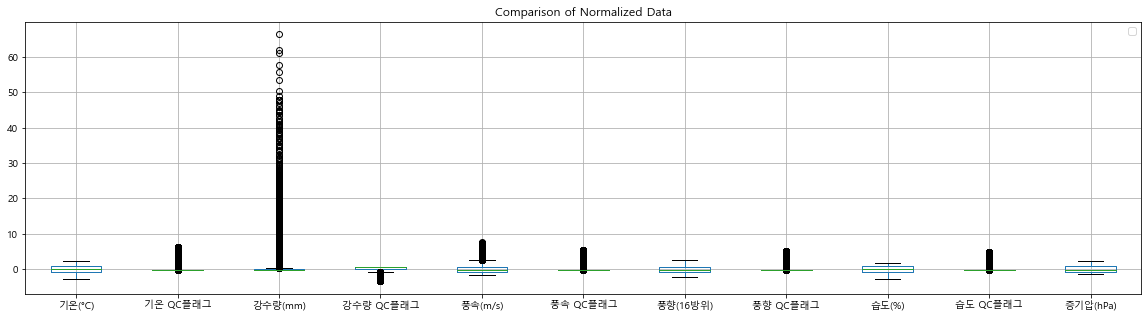

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


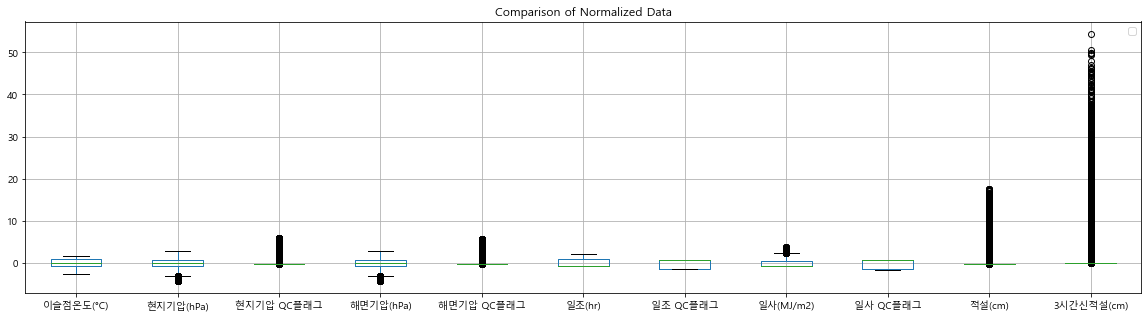

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


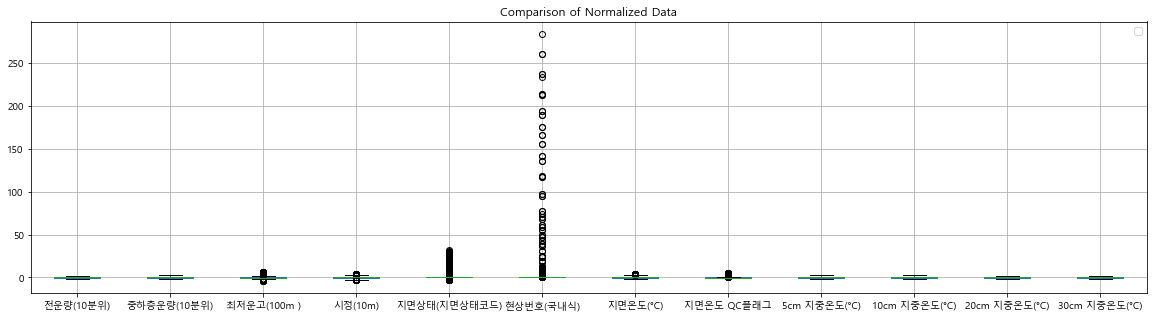

In [151]:

plt.figure(figsize=(20, 5))
# plt.boxplot(a.columns, labels=['Before Normalization', 'After Normalization'])
display(b.iloc[:,:11].boxplot())
plt.title('Comparison of Normalized Data')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
# plt.boxplot(a.columns, labels=['Before Normalization', 'After Normalization'])
display(b.iloc[:,11:22].boxplot())
plt.title('Comparison of Normalized Data')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
# plt.boxplot(a.columns, labels=['Before Normalization', 'After Normalization'])
display(b.iloc[:,22:].boxplot())
plt.title('Comparison of Normalized Data')
plt.legend()
plt.show()

### 선형 보간

In [ ]:
# 선형 보간을 활용해 결측치를 처리한 결과 확인

time_linear_interpolate = time.copy()

time_linear_interpolate = time_linear_interpolate.interpolate()

compare_describe(time, time_linear_interpolate)


### ARIMA

In [ ]:
# 결측치를 ARIMA 모델을 활용하여 채우는 함수

import statsmodels.api as sm

def fill_missing_values_arima(data):
    for column in tqdm(data.columns):
        # 결측치가 있는 인덱스 확인
        missing_indices = data[data[column].isnull()].index

        # ARIMA 모델에 입력할 데이터 생성
        values = data[column].values
        filled_values = values.copy()

        for index in missing_indices:
            # 결측치 이전의 관측값 인덱스 범위
            start_index = max(index - 5, 0)
            end_index = index

            # 결측치 이전의 관측값 데이터 추출
            history = values[start_index:end_index]

            # ARIMA 모델 학습 및 예측
            model = sm.tsa.ARIMA(history, order=(1, 0, 0))
            model_fit = model.fit()
            predicted_value = model_fit.forecast()[0]

            # 예측된 값을 결측치에 대입
            filled_values[index] = predicted_value

        # 결측치가 채워진 시계열 데이터 반환
        filled_data = data.copy()
        filled_data[column] = filled_values
        
    return filled_data


In [ ]:
# 결측치를 ARIMA 모델을 활용하여 채우기

time_arima_fill = time.copy()
time_arima_fill['강수량(mm)'].fillna(0, inplace=True)
time_arima_fill['적설(cm)'].fillna(0, inplace=True)

time_arima_fill.index = pd.to_datetime(time_arima_fill.index)
time_arima_fill.reset_index(inplace=True)

time_arima_fill = fill_missing_values_arima(time_arima_fill)

In [ ]:
compare_describe(time_fill, time_arima_fill.set_index('기준일시'))

### LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

In [ ]:
# GPU 환경 설정

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:

def fill_missing_values_lstm(df):
    for column in tqdm(df.columns):
        missing_indexes = df[df[column].isnull()].index
        
        for idx in missing_indexes:
            # LSTM 모델 학습 데이터 준비
            X_train = df.loc[:idx-1, column].values
            y_train = df.loc[1:idx, column].values

            # LSTM 모델 구성
            model = Sequential()
            model.add(LSTM(10, input_shape=(1, 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')

            # LSTM 모델 학습
            X_train = X_train.reshape((X_train.shape[0], 1, 1))
            model.fit(X_train, y_train, epochs=100, verbose=0)

            # 결측치 예측
            X_test = np.array([[df.loc[idx-1, column]]])
            X_test = X_test.reshape((1, 1, 1))
            y_pred = model.predict(X_test)

            # 결측치 채우기
            df.loc[idx, column] = y_pred[0][0]
        
    return df


In [ ]:
time_lstm_fill = time.copy()
time_lstm_fill['강수량(mm)'].fillna(0, inplace=True)
time_lstm_fill['적설(cm)'].fillna(0, inplace=True)

time_lstm_fill.index = pd.to_datetime(time_lstm_fill.index)
time_lstm_fill.reset_index(inplace=True)

time_lstm_fill = fill_missing_values_lstm(time_lstm_fill)

In [ ]:
display(time_arima_fill)
display(missing_per(time_arima_fill).style.applymap(highlight_cells))

In [ ]:
value_confirm(time_arima_fill)

# Data Concat

In [ ]:
merged_df = pd.merge(elec, time_fill, on='기준일시', how='left')

In [ ]:
display(missing_per(merged_df).style.applymap(highlight_cells))

In [ ]:
# 선형 보간으로 결측치 채우기

merged_linear_interpolate = merged_df.copy()

merged_linear_interpolate = merged_linear_interpolate.interpolate()

compare_describe(merged_df, merged_linear_interpolate)

In [ ]:
merged_lstm_fill = merged_df.copy()

merged_lstm_fill.index = pd.to_datetime(merged_lstm_fill.index)
merged_lstm_fill.reset_index(inplace=True)

merged_lstm_fill = fill_missing_values_lstm(merged_lstm_fill)

In [ ]:
display(missing_per(merged_linear_interpolate).style.applymap(highlight_cells))

In [ ]:
# 첫 번째 컬럼 맨 뒤로

df = merged_linear_interpolate.copy()

columns = df.columns.tolist()  # 열 이름을 리스트로 변환
columns.append(columns.pop(0))  # 첫 번째 열 이름을 맨 뒤로 이동
df = df.reindex(columns=columns)  # 열 순서 재조정

In [ ]:
df

In [ ]:
df.to_csv('ver1.csv')

# ML 용 test data 만들기

In [ ]:
lgbm_test = pd.read_csv(path + '/lgbm_test_data.csv', sep=',', index_col=0,  encoding='cp949') 
test = pd.read_csv(path + '/test_data.csv', sep=',', index_col=0)

In [ ]:
lgbm_test = lgbm_test.set_index(['일시'])
lgbm_test.drop(['지점명', '운형(운형약어)'], axis=1, inplace=True)
lgbm_test = lgbm_test.rename_axis('기준일시')
# lgbm_test = lgbm_test.reset_index().groupby('기준일시').mean()

In [ ]:
lgbm_test.to_csv('ML_test_data.csv')

In [ ]:
lgbm_test

In [ ]:
# 결측치를 ARIMA 모델을 활용하여 채우기

lgbm_test_fill = lgbm_test.copy()
lgbm_test_fill['강수량(mm)'].fillna(0, inplace=True)
lgbm_test_fill['적설(cm)'].fillna(0, inplace=True)

lgbm_test_fill.index = pd.to_datetime(lgbm_test_fill.index)
lgbm_test_fill.reset_index(inplace=True)

lgbm_test_fill = fill_missing_values_arima(lgbm_test_fill)

In [ ]:
compare_describe(lgbm_test, lgbm_test_fill.set_index('기준일시'))

In [ ]:
test.index = pd.to_datetime(test.index)

In [ ]:
# 최종 5분 데이터로 만들기

lgbm_test_merge = pd.merge(test, lgbm_test_fill, on='기준일시', how='left')
lgbm_test_merge.set_index('기준일시', inplace=True)

In [ ]:
# 시간별로 있는 데이터를 선형 보간 방법으로 5분 데이터 채우기

ML_merged_linear_interpolate = lgbm_test_merge.copy()

ML_merged_linear_interpolate = ML_merged_linear_interpolate.interpolate()

compare_describe(lgbm_test_merge, ML_merged_linear_interpolate)

In [ ]:
ML_merged_linear_interpolate

In [ ]:
df = ML_merged_linear_interpolate.copy()

columns = df.columns.tolist()  # 열 이름을 리스트로 변환
columns.append(columns.pop(0))  # 첫 번째 열 이름을 맨 뒤로 이동
df = df.reindex(columns=columns)  # 열 순서 재조정

In [ ]:
df = df.rename(columns={'현재수요(MW)' : 'pred'})
df['pred'] = 0
df

In [ ]:
df.to_csv('lgbm_test_v1.csv')

In [ ]:
time.dropna()

# Baseline

## VAR

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [ ]:
ml_test = pd.read_csv(path + '/ML_test_data.csv', sep=',', index_col=0)
test = pd.read_csv(path + '/test_data.csv', sep=',', index_col=0)

In [ ]:
time_drop = ['기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
            '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그',
            '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '3시간신적설(cm)',
            '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)',
            '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도 QC플래그']

time_drop2 = ['기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
            '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그',
            '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그',
              '3시간신적설(cm)','지면상태(지면상태코드)', '현상번호(국내식)']

select = ['기온(°C)']

In [ ]:
time.columns

# 전력량만 예측 (비교 기준점)

https://colab.research.google.com/drive/1dCtKyvVeeedi5zJdVlO858ERc8o7xkYq#scrollTo=UZU0-1s-pso_

In [3]:
path = 'G:/내 드라이브/취업/Contest/2307_PublicData/data'

In [4]:
def result_graph(actual, predicted):
    
    MAPE = np.mean(np.abs((actual - predicted) / actual)) * 100

    # MAPE 계산
    mape = [abs((a - p) / a) * 100 for a, p in zip(actual, predicted)]
    
    print('MAPE : ', MAPE)

    # 그래프 크기 설정
    fig = plt.figure(figsize=(8, 4))

    # 그래프 그리기
    plt.plot(mape)
    plt.xlabel('Data Point')
    plt.ylabel('MAPE (%)')
    plt.title('MAPE Ratio')
    plt.show()
    
    fig = plt.figure(figsize=(8, 4))
    plt.plot(actual, label='actual')
    plt.plot(predicted, label='pred')
    plt.title('Actual & Predict')
    plt.legend()
    plt.show()

#시간 변수와 요일 변수
def minute(x):
    return x.minute
def weekday(x):
    return x.weekday()
def quarter(x):
    return x.quarter

In [8]:
time = pd.read_csv('D:/ground_time_9246057.csv', sep=',', index_col=0)
# day = pd.read_csv(path + '/groud_day_4089.csv', sep=',', index_col=0)
ml_test = pd.read_csv(path + '/ML_test_data.csv', sep=',', index_col=0) # 추가 변수
test_y = pd.read_csv(path + '/test_data.csv', sep=',', index_col=0) # test y
elec = pd.read_csv(path + '/5minute_demand_y_(12.06~).csv', sep=',', index_col=0) # 종속 변수, 전력 사용량

In [10]:
time

기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  풍속 QC플래그  \
기준일시                                                                        
2012-01-01 00:00    -0.5       0.0      NaN        NaN      0.9       0.0   
2012-01-01 01:00     0.3       0.0      NaN        NaN      1.2       0.0   
2012-01-01 02:00     0.3       0.0      NaN        NaN      1.4       0.0   
2012-01-01 03:00     0.5       0.0      NaN        NaN      1.5       0.0   
2012-01-01 04:00     0.3       0.0      NaN        NaN      1.5       0.0   
...                  ...       ...      ...        ...      ...       ...   
2023-03-12 20:00     6.1       NaN      NaN        9.0      3.8       NaN   
2023-03-12 21:00     4.9       NaN      NaN        9.0      4.4       NaN   
2023-03-12 22:00     3.8       NaN      NaN        9.0      6.4       NaN   
2023-03-12 23:00     3.4       NaN      NaN        9.0      5.4       NaN   
2023-03-13 00:00     3.1       NaN      NaN        9.0      6.1       NaN   

                  풍향(16방위)  풍향 QC플래그  습도(%)  습도 QC플래그  ...  최저운고(100m )  \
기준일시                                                   ...                
2012-01-01 00:00      50.0       0.0   57.0       0.0  ...         10.0   
2012-01-01 01:00     290.0       0.0   54.0       0.0  ...          NaN   
2012-01-01 02:00     320.0       0.0   53.0       0.0  ...          NaN   
2012-01-01 03:00     290.0       0.0   52.0       0.0  ...          9.0   
2012-01-01 04:00     290.0       0.0   51.0       0.0  ...          9.0   
...                    ...       ...    ...       ...  ...          ...   
2023-03-12 20:00     290.0       NaN   47.0       NaN  ...         41.0   
2023-03-12 21:00     290.0       NaN   50.0       NaN  ...         66.0   
2023-03-12 22:00     290.0       NaN   49.0       NaN  ...          NaN   
2023-03-12 23:00     320.0       NaN   47.0       NaN  ...          NaN   
2023-03-13 00:00     320.0       NaN   39.0       NaN  ...          NaN   

                  시정(10m)  지면상태(지면상태코드)  현상번호(국내식)  지면온도(°C)  지면온도 QC플래그  \
기준일시                                                                       
2012-01-01 00:00   1500.0           NaN        NaN      -2.3         0.0   
2012-01-01 01:00      NaN           NaN        NaN      -2.5         0.0   
2012-01-01 02:00      NaN           NaN        NaN      -2.6         0.0   
2012-01-01 03:00   1200.0          13.0        NaN      -2.5         0.0   
2012-01-01 04:00   1200.0           NaN        NaN      -2.8         0.0   
...                   ...           ...        ...       ...         ...   
2023-03-12 20:00   2000.0           NaN        NaN       5.5         NaN   
2023-03-12 21:00   2000.0           NaN        NaN       3.9         NaN   
2023-03-12 22:00   2000.0           NaN        NaN       2.0         NaN   
2023-03-12 23:00   2000.0           NaN        NaN       1.2         NaN   
2023-03-13 00:00   2000.0           NaN        NaN       0.5         NaN   

                  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
기준일시                                                                         
2012-01-01 00:00           NaN            NaN            NaN            NaN  
2012-01-01 01:00           NaN            NaN            NaN            NaN  
2012-01-01 02:00           NaN            NaN            NaN            NaN  
2012-01-01 03:00           NaN            NaN            NaN            NaN  
2012-01-01 04:00           NaN            NaN            NaN            NaN  
...                        ...            ...            ...            ...  
2023-03-12 20:00           NaN            NaN            NaN            NaN  
2023-03-12 21:00           NaN            NaN            NaN            NaN  
2023-03-12 22:00           NaN            NaN            NaN            NaN  
2023-03-12 23:00           NaN            NaN            NaN            NaN  
2023-03-13 00:00           NaN            NaN            NaN            NaN  

[9246057 rows x 35 columns]

In [9]:
ml_test.columns

Index(['기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그',
       '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)',
       '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)',
       '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [ ]:
print(missing_per(time))
print(missing_per(ml_test))

In [ ]:
# 결측치 90% 이상 drop

drop = ['적설(cm)','강수량(mm)', '3시간신적설(cm)','지면상태(지면상태코드)', '운형(운형약어)'
        '현상번호(국내식)', '기온 QC플래그','강수량 QC플래그','풍속 QC플래그', '풍향 QC플래그',  '습도 QC플래그', 
        '현지기압 QC플래그', '해면기압 QC플래그', '일조 QC플래그', '일사 QC플래그']


time.drop(columns = drop, inplace=True)
ml_test.drop(columns = drop, inplace=True)

In [ ]:
print(time.mean())
print(ml_test.mean())

In [ ]:
# 기상 정보 null -> mean, no group 

# train
time_train = time.fillna(time.mean()).copy()
# 기존 데이터랑 합하기
time_train = pd.merge(time_train, elec, left_index=True, right_index=True, how='right')
time_train = time_train.fillna(time_train.mean())

In [ ]:
# test
time_test = ml_test.fillna(ml_test.mean()).copy()
# 기존 데이터랑 합하기
time_test = pd.merge(time_test, test_y, left_index=True, right_index=True, how='right')
time_test = time_test.fillna(time_test.mean())

In [ ]:
# 기상 정보 null -> mean, group 

# train
time_train = time.fillna(time.mean()).copy()
# 기존 데이터랑 합하기
time_train = pd.merge(time_train, elec, left_index=True, right_index=True, how='right')
time_train = time_train.fillna(time_train.mean())
# groupby
time_train = time_train.reset_index().groupby('기준일시').mean()


# test
time_test = ml_test.fillna(ml_test.mean()).copy()
# 기존 데이터랑 합하기
time_test = pd.merge(time_test, test_y, left_index=True, right_index=True, how='right')
time_test = time_test.fillna(time_test.mean())
time_test = time_test.reset_index().groupby('기준일시').mean()

In [ ]:
ss = ml_test.reset_index().groupby('기준일시').mean()
# ss = ss.fillna(ss.mean())
ss

In [ ]:
ss.columns

In [ ]:
missing_per(ss)

In [ ]:
ss

In [ ]:
# 기상 정보 null -> mean, no group 



In [ ]:
# 기상 정보 null -> mean, group 



In [ ]:
time_train

In [ ]:
X = time_train.drop('현재수요(MW)', axis=1)
y = time_train['현재수요(MW)']

X_test = time_test.drop('현재수요(MW)', axis=1)
y_test = time_test['현재수요(MW)']

In [111]:
# 표준화 정규화 input data

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler2 = MinMaxScaler()

# Normalize the DataFrame
X = pd.DataFrame(scaler2.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler2.fit_transform(X_test), columns=X_test.columns)


NameError: name 'X' is not defined

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      shuffle = False,
                                                      random_state=48)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

----

In [174]:
c

기온(°C)  기온 QC플래그   강수량(mm)  강수량 QC플래그   풍속(m/s)  풍속 QC플래그  \
0        0.318288 -0.172923  0.121935   0.166481 -0.844366 -0.195341   
1        0.314019 -0.172923  0.094324  -0.037508 -0.852077 -0.195341   
2        0.309749 -0.172923  0.066713  -0.241496 -0.859789 -0.195341   
3        0.305479 -0.172923  0.039102  -0.445484 -0.867500 -0.195341   
4        0.301210 -0.172923  0.011491  -0.649473 -0.875212 -0.195341   
...           ...       ...       ...        ...       ...       ...   
1132406 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132407 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132408 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132409 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   
1132410 -1.116932 -0.172923 -0.370586   0.523460  3.211701 -0.195341   

         풍향(16방위)  풍향 QC플래그     습도(%)  습도 QC플래그  ...   시정(10m)  지면상태(지면상태코드)  \
0       -0.388510 -0.205686  0.883714 -0.212316  ... -1.139143      0.010977   
1       -0.397213 -0.205686  0.892229 -0.212316  ... -1.085834      0.010977   
2       -0.405917 -0.205686  0.900743 -0.212316  ... -1.032525      0.010977   
3       -0.414620 -0.205686  0.909258 -0.212316  ... -0.979216      0.010977   
4       -0.423324 -0.205686  0.917773 -0.212316  ... -0.925907      0.010977   
...           ...       ...       ...       ...  ...       ...           ...   
1132406  2.104013 -0.205686 -1.255407 -0.212316  ...  3.710757      0.010977   
1132407  2.104013 -0.205686 -1.255407 -0.212316  ...  3.710757      0.010977   
1132408  2.104013 -0.205686 -1.255407 -0.212316  ...  3.710757      0.010977   
1132409  2.104013 -0.205686 -1.255407 -0.212316  ...  3.710757      0.010977   
1132410  2.104013 -0.205686 -1.255407 -0.212316  ...  3.710757      0.010977   

         현상번호(국내식)  지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  \
0        -0.008807  0.105774   -0.318416      0.516099       0.636771   
1        -0.008817  0.102065   -0.318416      0.511306       0.632682   
2        -0.008828  0.098356   -0.318416      0.506513       0.628593   
3        -0.008839  0.094647   -0.318416      0.501720       0.624503   
4        -0.008849  0.090939   -0.318416      0.496927       0.620414   
...            ...       ...         ...           ...            ...   
1132406  -0.008934 -1.148298   -0.011841     -0.883971      -0.753144   
1132407  -0.008934 -1.148298   -0.011841     -0.883971      -0.753144   
1132408  -0.008934 -1.148298   -0.011841     -0.883971      -0.753144   
1132409  -0.008934 -1.148298   -0.011841     -0.883971      -0.753144   
1132410  -0.008934 -1.148298   -0.011841     -0.883971      -0.753144   

         20cm 지중온도(°C)  30cm 지중온도(°C)  현재수요(MW)  
0             0.726953       0.705727 -1.237277  
1             0.724178       0.704714 -1.282463  
2             0.721403       0.703701 -1.254132  
3             0.718628       0.702688 -1.248419  
4             0.715853       0.701675 -1.293044  
...                ...            ...       ...  
1132406      -0.650320      -0.641405 -0.235517  
1132407      -0.650320      -0.641405 -0.250587  
1132408      -0.650320      -0.641405 -0.295443  
1132409      -0.650320      -0.641405 -0.323700  
1132410      -0.650320      -0.641405 -0.389160  

[1132411 rows x 35 columns]

In [ ]:
# 5분 단위

elec.reset_index(inplace=True)
elec['기준일시'] = pd.to_datetime(elec['기준일시'])
elec = elec.dropna()
elec = elec.set_index('기준일시')

In [ ]:
# 1시간 단위 (5분 단위 -> 1시간 평균)

elec.reset_index(inplace=True)
elec['기준일시'] = pd.to_datetime(elec['기준일시'])
elec = elec.set_index('기준일시')
elec = elec.resample('1H').mean()
elec = elec.dropna()

test_y.reset_index(inplace=True)
test_y['기준일시'] = pd.to_datetime(test_y['기준일시'])
test_y = test_y.set_index('기준일시')
test_y = test_y.resample('1H').mean()
test_y = test_y.dropna()

In [ ]:
# 1시간 단위 + 선형 보간 (5분)
# elec, test_y

## y
elec.reset_index(inplace=True)
elec['기준일시'] = pd.to_datetime(elec['기준일시'])
elec['현재수요(MW)'] = elec['현재수요(MW)'].interpolate(method='values')
elec = elec.set_index('기준일시')

In [184]:
# 1시간 단위 + 선형 보간 (5분)
# elec, test_y

## y
elec.reset_index(inplace=True)
elec['기준일시'] = pd.to_datetime(elec['기준일시'])
elec['현재수요(MW)'] = elec['현재수요(MW)'].interpolate(method='values')
elec = elec.set_index('기준일시')

## test
test_y.reset_index(inplace=True)
test_y['기준일시'] = pd.to_datetime(test_y['기준일시'])
test_y = test_y.set_index('기준일시')
test_y = test_y.resample('1H').mean()

start_date = '2023-03-13 00:00:00'
end_date = '2023-03-19 23:55:00'

index = pd.date_range(start=start_date, end=end_date, freq='5min')
sample = pd.DataFrame(index=index, columns=['sample'])
# sample.rename(columns = {'index' : '기준일시'}, inplace=True)
sample.index.name = '기준일시'
test_y = pd.merge(sample, test_y, left_index=True, right_index=True, how='left').drop(columns = 'sample')
test_y = test_y.interpolate(method='values')

In [ ]:
# train time series 변경

train = elec.reset_index().copy()
train['minute'] = train['기준일시'].apply(lambda x : minute(x))
train['weekday'] = train['기준일시'].apply(lambda x : weekday(x))
train['quarter'] = train['기준일시'].apply(lambda x : quarter(x))
train.drop('기준일시', axis=1, inplace=True)


# test time series 변경

test = test_y.reset_index().copy()
test['기준일시'] = pd.to_datetime(test['기준일시'])
test['minute'] = test['기준일시'].apply(lambda x : minute(x))
test['weekday'] = test['기준일시'].apply(lambda x : weekday(x))
test['quarter'] = test['기준일시'].apply(lambda x : quarter(x))
test.drop('기준일시', axis=1, inplace=True)

In [178]:
a

기온(°C)  기온 QC플래그   강수량(mm)  강수량 QC플래그   풍속(m/s)  \
기준일시                                                                   
2012-06-01 00:00  16.387097       0.0  0.550000   8.181818  1.196774   
2012-06-01 00:05  16.344534       0.0  0.519167   7.714286  1.189247   
2012-06-01 00:10  16.301971       0.0  0.488333   7.246753  1.181720   
2012-06-01 00:15  16.259409       0.0  0.457500   6.779221  1.174194   
2012-06-01 00:20  16.216846       0.0  0.426667   6.311688  1.166667   
...                     ...       ...       ...        ...       ...   
2023-03-12 23:35   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:40   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:45   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:50   2.080000       0.0  0.000000   9.000000  5.155789   
2023-03-12 23:55   2.080000       0.0  0.000000   9.000000  5.155789   

                  풍속 QC플래그    풍향(16방위)  풍향 QC플래그      습도(%)  습도 QC플래그  ...  \
기준일시                                                                   ...   
2012-06-01 00:00       0.0  155.376344       0.0  84.494624       0.0  ...   
2012-06-01 00:05       0.0  154.928315       0.0  84.643369       0.0  ...   
2012-06-01 00:10       0.0  154.480287       0.0  84.792115       0.0  ...   
2012-06-01 00:15       0.0  154.032258       0.0  84.940860       0.0  ...   
2012-06-01 00:20       0.0  153.584229       0.0  85.089606       0.0  ...   
...                    ...         ...       ...        ...       ...  ...   
2023-03-12 23:35       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:40       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:45       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:50       0.0  283.684211       0.0  47.126316       0.0  ...   
2023-03-12 23:55       0.0  283.684211       0.0  47.126316       0.0  ...   

                  최저운고(100m )      시정(10m)  지면상태(지면상태코드)     현상번호(국내식)  \
기준일시                                                                     
2012-06-01 00:00     8.866667  1038.750000      1.415061  65019.818182   
2012-06-01 00:05     8.836111  1068.854167      1.415061  59634.059524   
2012-06-01 00:10     8.805556  1098.958333      1.415061  54248.300866   
2012-06-01 00:15     8.775000  1129.062500      1.415061  48862.542208   
2012-06-01 00:20     8.744444  1159.166667      1.415061  43476.783550   
...                       ...          ...           ...           ...   
2023-03-12 23:35    16.971429  3777.542553      1.415061      3.666667   
2023-03-12 23:40    16.971429  3777.542553      1.415061      3.666667   
2023-03-12 23:45    16.971429  3777.542553      1.415061      3.666667   
2023-03-12 23:50    16.971429  3777.542553      1.415061      3.666667   
2023-03-12 23:55    16.971429  3777.542553      1.415061      3.666667   

                   지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  \
기준일시                                                                   
2012-06-01 00:00  16.559140    0.000000     20.403125      21.359375   
2012-06-01 00:05  16.514337    0.000000     20.355729      21.320312   
2012-06-01 00:10  16.469534    0.000000     20.308333      21.281250   
2012-06-01 00:15  16.424731    0.000000     20.260938      21.242188   
2012-06-01 00:20  16.379928    0.000000     20.213542      21.203125   
...                     ...         ...           ...            ...   
2023-03-12 23:35   1.409474    0.534663      6.558621       8.082759   
2023-03-12 23:40   1.409474    0.534663      6.558621       8.082759   
2023-03-12 23:45   1.409474    0.534663      6.558621       8.082759   
2023-03-12 23:50   1.409474    0.534663      6.558621       8.082759   
2023-03-12 23:55   1.409474    0.534663      6.558621       8.082759   

                  20cm 지중온도(°C)  30cm 지중온도(°C)  
기준일시                                            
2012-06-01 00:00      22.046875      21.656250  
2012-06-01 00:05      

In [ ]:
X = c.drop('현재수요(MW)', axis=1)
y = c['현재수요(MW)']

X_test = test.drop('현재수요(MW)', axis=1)
y_test = test['현재수요(MW)']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=48)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, y_train)

In [ ]:
X_test

In [ ]:
pred = lr.predict(X_test)
pred

In [ ]:
result_graph(y_test, pred)

----

## lgbm

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer  # loss function 커스터마이징


In [ ]:
# 파라미터 설정, 모델생성 함수
def get_best_params(model, params):
    grid_model = GridSearchCV(
        model,
        param_grid = params,  # 파라미터
        cv = 5,  # Kfold : 5
        scoring= SMAPE)  #loss function

    grid_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_valid, y_valid)], verbose=100)
    scr = grid_model.best_score_
    print(f'{model.__class__.__name__} 최적 score 값 {scr}')
    return grid_model.best_estimator_

def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred)))  # *2 , *100은 상수이므로 생략
SMAPE = make_scorer(smape, greater_is_better=False)  # smape 값이 작아져야하므로 False


In [ ]:
params = {'n_estimators' : [30, 100, 200, 500],
          'learning_rate' : [0.01, 0.1],
          'objective' : ['regression'],
          'boosting_type' : ['gbdt'],
          'max_depth' : [1, 3, 5], # 나무의 깊이
          'subsample' : [0.5, 1]
         }

In [ ]:
params_f = {'n_estimators' : 200,
          'learning_rate' : 0.01,
          'objective' : 'regression',
          'boosting_type' : 'gbdt',
          'max_depth' : 5, # 나무의 깊이
          'subsample' : 0.5}

In [ ]:
model = LGBMRegressor(**params_f)

-----

In [ ]:
# best model grid search

best_lgbm = get_best_params(model, params_f)
best_lgbm

In [ ]:
pred = best_lgbm.predict(X_test)

---

In [ ]:
lgb_fit = model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=100)

In [ ]:
pred = lgb_fit.predict(X_test)
pred

In [ ]:
print(y_test.shape)
print(pred.shape)

In [ ]:
result_graph(y_test, pred)

## xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 10,
    'metric': ['mae', 'mse'],
    'verbose': -1,
}

In [ ]:
xgb_reg = XGBRegressor(**params)

xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=300, verbose=False)

In [ ]:
pred = xgb_reg.predict(X_test)

In [ ]:
result_graph(y_test, pred)

## ARIMA

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_train

In [ ]:
# auto arima

model = ARIMA(elec, order=(2,0,2))
# model = pm.auto_arima(y_train, 
#                       max_p=3, p = 2, 
#                       d = 0, 
#                       max_q=3, q = 2, 
#                       seasonal = True, 
#                       trace = True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=False)

In [ ]:
# 학습

model_fit = model.fit()

In [ ]:
# 예측

forecast = model_fit.predict(1, 2016) # 5분 2016 # 1시간 168
pred = forecast.values

In [ ]:
# y_test = confirm_pred['현재수요(MW)']
# pred = confirm_pred['pred']

result_graph(y_test, pred)

----

In [ ]:
# 예측값과 실제값 비교
# y값만 있기 때문에 5분 단위

start_date = '2023-03-13 00:00:00'
end_date = '2023-03-19 23:55:00'

index = pd.date_range(start=start_date, end=end_date, freq='5min')
pred_df = pd.DataFrame(pred, index = index, columns=['pred'])

test.index = pd.to_datetime(test.index)
confirm_pred = pd.merge(test, pred_df, left_index=True, right_index=True, how='left')
confirm_pred

In [ ]:
y_test = confirm_pred['현재수요(MW)']
y_pred = confirm_pred['pred']

result_graph(y_test, y_pred)

In [ ]:
model_fit(y_pred)
# y_pred.append()

# 모델 저장

In [ ]:
# model 저장

import joblib
joblib.dump(best_lgbm, './lgbm.pkl')

In [ ]:
loaded_model = joblib.load('./arima.pkl')

# 가설 검증

모든 가설의 비교 대상은 과거 전력량 데이터로만 실시간 예측을 했을 때 이다

1. 기상청 데이터 중 지상에서 관측된 데이터를 활용해 예측한다면 유의미한 결과가 나올 것이다
    - 전력 사용량만 예측하는 단변량과 수집한 데이터를 통합해 모델링
2. 지상관측데이터 중 일상 생활에 영향을 주는 기상 데이터는 전력 사용량 예측에 도움이 될 것이다
    - 기온, 강수량, 적설 등

## 1번

In [ ]:
time = time[['기온(°C)']]
# time.reset_index(inplace=True)
time = time.groupby('기준일시')['기온(°C)'].mean().reset_index()
time.set_index('기준일시', inplace=True)
time

In [ ]:
merged_y = pd.merge(elec, time, on='기준일시', how='right')
merged_y.dropna(inplace=True)
merged_y

In [ ]:
train_data = merged_y.copy()

# Fit the VAR model
model = VAR(train_data)
model_fit = model.fit()

# Make predictions
lag_order = model_fit.k_ar

pred = []
for i in model_fit.forecast(train_data.values[-lag_order:], steps=144):
    pred.append(i[0])

In [ ]:
pred

In [ ]:
# 예측값과 실제값 비교

start_date = '2023-03-13 00:00:00'
end_date = '2023-03-19 23:00:00'

index = pd.date_range(start=start_date, end=end_date, freq='H')
pred_df = pd.DataFrame(pred, index = index, columns=['pred'])

In [ ]:
# 5분단위로 측정된 y값을 1시간 단위로 예측한 df와 합쳐서 MAPE 확인
# 5분 단위인 2016개를, 1시간 단위인 144개로 merge 해서 비교

test.index = pd.to_datetime(test.index)
confirm_pred = pd.merge(test, pred_df, left_index=True, right_index=True, how='right')
confirm_pred

In [ ]:
y_test = confirm_pred['현재수요(MW)']
y_pred = confirm_pred['pred']

result_graph(y_test, y_pred)

In [ ]:
result_graph(y_test, y_pred)

In [ ]:
time.drop(columns = time_drop2, axis=1, inplace=True)
time.drop(columns = ['운형(운형약어)'], inplace=True)
time['강수량(mm)'].fillna(0, inplace=True)
time['적설(cm)'].fillna(0, inplace=True)
time.dropna(inplace=True)

test.drop(columns = time_drop2, axis=1, inplace=True)